# Start of Analysis

## Create dataframe from experimental data collected 
(dialogue, narrator,asking direct politeness scenarios)

Define dictionary which takes in intensifier-predicate pair and returns the scenario for it
define sets for intensifier and predicate

In [1]:
import json
# for dialogue scenario
with open('data4.json', 'r') as file:
    data = json.load(file)
inten_pred_to_scenario = dict()
for scenario in data["scenarios"]:
    inten_pred_to_scenario[(scenario["intensifier"],scenario["predicate"])] = scenario["scenario context"]

# for narrator scenario
with open('narratorData.json', 'r') as file:
    data = json.load(file)
inten_pred_to_nar_scenario = dict()
for scenario in data["scenarios"]:
    inten_pred_to_nar_scenario[(scenario["intensifier"],scenario["predicate"])] = scenario["scenario context"]

with open("directData.json", 'r') as file:
    data = json.load(file)
inten_pred_to_direct = dict()
for scenario in data["scenarios"]:
    inten_pred_to_direct[(scenario["intensifier"],scenario["predicate"])] = scenario["scenario context"]

# collect data for each intensifier
intensifiers = ['slightly', 'kind of', 'quite', 'very', 'extremely']
predicates = ["exhausted","boring","difficult","concerned","understandable","impressive", "helpful"]

Import necessary extensions for creating dataframes

In [8]:
import os
import json
import pandas as pd

Make dataframe for dialogue scenario

In [1]:
def find_slide_pair(data, pred, inten,inten_pred_to_scenario):
    # returns slide where the stimuli correspond to the scenario with intensifier, predicate pair, and the control version of the slide
    # this only works if the stimuli matches the data4.js file
    scenario = inten_pred_to_scenario[(inten,pred)]
    slide_with = None
    slide_without = None
    for slide in data:
        if slide['trial_type'] == 'html-slider-response':
            if slide['stimulus'].find(scenario) != -1 and slide_with is None:
                slide_with = slide
            elif slide['stimulus'].find(scenario.replace(inten,"")) != -1:
                slide_without = slide
            if inten == "very" and pred == "concerned" and slide['stimulus'].find("It\'s making me  concerned about how you're handling everything.")!=-1:
                # print(slide['stimulus'],"\nvery concerned\n",scenario.replace(inten,""))
                slide_without = slide
    if slide_without is None:
        print(inten,pred)
    return (slide_with, slide_without)

def make_pandas_df(path_to_folder,country,inten_pred_to_scenario):
    # take each UK and US folder and create a pandas dataframe with columns person_id, country, intensifier, predicate, response w/ intensifier, response w/o intensifier, difference
    data_frame = []
    for file in os.listdir(path_to_folder):
        if file.endswith('.json'):
            with open(f"{path_to_folder}\\"+file) as g:
                personid = file[8:-5]
                data = json.load(g)
                # print(find_slide_pair(data, "concerned", "very"))
                print(len(data))
                if len(data)<70:
                    # don't count
                    print(f"skipping {personid}")
                    continue
                    # print(len(data))
                for pred in predicates:
                    for inten in intensifiers:
                        slide_with, slide_without = find_slide_pair(data, pred, inten,inten_pred_to_scenario)
                        if slide_with is not None and slide_without is not None:
                            if pred == "impressive" and inten == "kind of":
                                data_frame.append([personid,country,inten,pred,slide_with['response'],slide_with['rt'],"no",slide_with['response']-slide_without['response']])
                                data_frame.append([personid,country,inten,pred,slide_without['response'],slide_without['rt'],"no",None])
                            else:
                                data_frame.append([personid,country,inten,pred,slide_with['response'],slide_with['rt'],"yes",slide_with['response']-slide_without['response']])
                                data_frame.append([personid,country,inten,pred,slide_without['response'],slide_without['rt'],"no",None])

    return pd.DataFrame(data_frame, columns = ['person_id', 'country', 'intensifier', 'predicate', 'response', 'rt','has intensifier?', 'difference'])

# UK_df = make_pandas_df("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\MEng\\UK_Oct23","UK",inten_pred_to_scenario)
# US_df = make_pandas_df("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\MEng\\US_Oct23","US",inten_pred_to_scenario)


In [180]:
import os
import json
import pandas as pd
def find_pair(data, scenario):
    first_slide = None
    second_slide = None
    for slide in data:
        if slide['trial_type'] == 'html-slider-response':
            if slide['stimulus'].find(scenario) != -1:
                if first_slide is None:
                    first_slide = slide
                else:
                    second_slide = slide
    if len(first_slide['stimulus'])<len(second_slide['stimulus']):
        first_slide,second_slide = second_slide,first_slide
        # split stimulus into words
    first = first_slide['stimulus'].split()
    second = second_slide['stimulus'].split()
    
    index = 0
    while first[index] == second[index]:
        index+=1
    inten = first[index]
    if inten == 'impressive':
        print(first_slide['stimulus'])
    if inten == 'a':
        inten = 'a little'
    return (first_slide, second_slide,inten)

def make_new_pddf(path,country,inten_pred_pair_list):
    data_frame = []
    for file in os.listdir(path):
        if file.endswith('.json'):
            with open(f"{path}\\"+file) as g:
                personid = file[8:-5]
                data = json.load(g)
                # print(find_slide_pair(data, "concerned", "very"))
                if len(data)<97:
                    # don't count
                    print(f"skipping {personid}")
                    continue
                    # print(len(data))
                for scenario in scenario_set:
                    pred = scenario[-1]
                    scenario = scenario[0]
                    slide_with, slide_without, inten= find_pair(data, scenario)
                # for pred in predicates:
                #     for inten in intensifiers:
                #         slide_with, slide_without = find_slide_pair(data, pred, inten,inten_pred_to_scenario)
                #         if slide_with is not None and slide_without is not None:
                #             if pred == "impressive" and inten == "kind of":
                    data_frame.append([personid,country,inten,pred,scenario,slide_with['response'],slide_with['rt'],"yes",slide_with['response']-slide_without['response']])
                    data_frame.append([personid,country,inten,pred,scenario,slide_without['response'],slide_without['rt'],"no",None])
                #             else:
                #                 data_frame.append([personid,country,inten,pred,slide_with['response'],slide_with['rt'],"yes",slide_with['response']-slide_without['response']])
                #                 data_frame.append([personid,country,inten,pred,slide_without['response'],slide_without['rt'],"no",None])
    return pd.DataFrame(data_frame, columns = ['person_id', 'country', 'intensifier', 'predicate','scenario' ,'response', 'rt','has intensifier?', 'difference'])

In [181]:
new_UK_df[new_UK_df['intensifier'] == 'impressive'] 

person_id country intensifier   predicate  response  \
1060  67269f439696d166fbb74e09      UK  impressive  impressive        85   
1061  67269f439696d166fbb74e09      UK  impressive  impressive       100   
1104  67269f439696d166fbb74e09      UK  impressive  impressive        85   
1105  67269f439696d166fbb74e09      UK  impressive  impressive       100   
1154  6770900b577afd6c2e78ba26      UK  impressive  impressive        60   
1155  6770900b577afd6c2e78ba26      UK  impressive  impressive        70   
1198  6770900b577afd6c2e78ba26      UK  impressive  impressive        60   
1199  6770900b577afd6c2e78ba26      UK  impressive  impressive        70   
1248  677a797fcca3e291b75022f5      UK  impressive  impressive        87   
1249  677a797fcca3e291b75022f5      UK  impressive  impressive        82   
1292  677a797fcca3e291b75022f5      UK  impressive  impressive        87   
1293  677a797fcca3e291b75022f5      UK  impressive  impressive        82   

         rt has intensifier?  difference  
1060   7673              yes       -15.0  
1061  15977               no         NaN  
1104   7673              yes       -15.0  
1105  15977               no         NaN  
1154  11926              yes       -10.0  
1155   9406               no         NaN  
1198  11926              yes       -10.0  
1199   9406               no         NaN  
1248   4973              yes         5.0  
1249  31462               no         NaN  
1292   4973              yes         5.0  
1293  31462               no         NaN

In [182]:
new_UK_df = make_new_pddf("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\jspsych_tutorial_960\\resultsAndAnalyses\\raw_results_additional_modifiers\\intensifier_UK","UK",['a'])
new_US_df = make_new_pddf("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\jspsych_tutorial_960\\resultsAndAnalyses\\raw_results_additional_modifiers\\intensifier_US","US",['a'])

skipping 5b97f2375612b30001acc4c9
skipping 5c4afb7234ee9300011cbbfc
skipping 5ea320452d77060f49a6de2c
skipping 5f1bdb63a6090e409f79005d
skipping 6527e0f4b5c04af3248b116e
<p class="stimulus">David shows his friend Emma a model airplane he built from scratch.<br>Emma: "Wow, David! The level of detail on this is impressive."</p><p class="scale">On a scale from "minimally impressive" to "maximally impressive", how impressive is Emma?</p>
<p class="stimulus">David shows his friend Emma a model airplane he built from scratch.<br>Emma: "Wow, David! The level of detail on this is impressive."</p><p class="scale">On a scale from "minimally impressive" to "maximally impressive", how impressive is Emma?</p>
<p class="stimulus">David shows his friend Emma a model airplane he built from scratch.<br>Emma: "Wow, David! The level of detail on this is impressive."</p><p class="scale">On a scale from "minimally impressive" to "maximally impressive", how impressive is Emma?</p>
<p class="stimulus">David 

In [ ]:
# add a column of intensifier score which is 0 if intensnfier is "a little" and 1 if it is anything else
score = {'impressive':0,'a little':-3,'fairly':-2,'rather':-0.5,'really':1,'deeply':1.5,'totally':2,'utterly':2}
new_UK_df['intensifier_score'] = new_UK_df['intensifier'].apply(lambda x: score[x])
new_US_df['intensifier_score'] = new_US_df['intensifier'].apply(lambda x: score[x])

In [226]:
new_UK_df

person_id country intensifier       predicate  \
0     5b5504e902660200017948c3      UK      deeply  understandable   
1     5b5504e902660200017948c3      UK      deeply  understandable   
2     5b5504e902660200017948c3      UK      rather         helpful   
3     5b5504e902660200017948c3      UK      rather         helpful   
4     5b5504e902660200017948c3      UK      rather          boring   
...                        ...     ...         ...             ...   
1405  67860774acf7592ed65861bb      UK     totally          boring   
1406  67860774acf7592ed65861bb      UK      rather          boring   
1407  67860774acf7592ed65861bb      UK      rather          boring   
1408  67860774acf7592ed65861bb      UK     totally       concerned   
1409  67860774acf7592ed65861bb      UK     totally       concerned   

                                               scenario  response     rt  \
0     Emma apologizes for missing a virtual meeting ...        80   6982   
1     Emma apologizes for missing a virtual meeting ...        53  13307   
2     During a group project, Alex helps Jessica by ...        38   4789   
3     During a group project, Alex helps Jessica by ...        53   4318   
4     Emma attends a virtual conference on data anal...        81   4594   
...                                                 ...       ...    ...   
1405  Jake attends a mandatory corporate training se...        82  16857   
1406  John attends a lecture on a topic that doesn't...       100  20236   
1407  John attends a lecture on a topic that doesn't...        99  61780   
1408  Anna notices her friend, Jake, coughing freque...       100  12710   
1409  Anna notices her friend, Jake, coughing freque...        71  12268   

     has intensifier?  difference  intensifier_score  
0                 yes        27.0                1.5  
1                  no         NaN                1.5  
2                 yes       -15.0               -0.5  
3                  no         NaN               -0.5  
4                 yes        -9.0               -0.5  
...               ...         ...                ...  
1405               no         NaN                2.0  
1406              yes         1.0               -0.5  
1407               no         NaN               -0.5  
1408              yes        29.0                2.0  
1409               no         NaN                2.0  

[1410 rows x 10 columns]

In [ ]:
# make new_df only have has intensifier? == yes
new_UK = new_UK_df[new_UK_df['has intensifier?'] == 'yes']
new_US = new_US_df[new_US_df['has intensifier?'] == 'yes']
# concatenate the two dataframes
new_countries = pd.concat([new_UK,new_US],keys = ['UK','US'])
new_countries = new_countries[new_countries['intensifier']!='impressive']


Text(0.5, 1.0, 'UK results Jan 15')

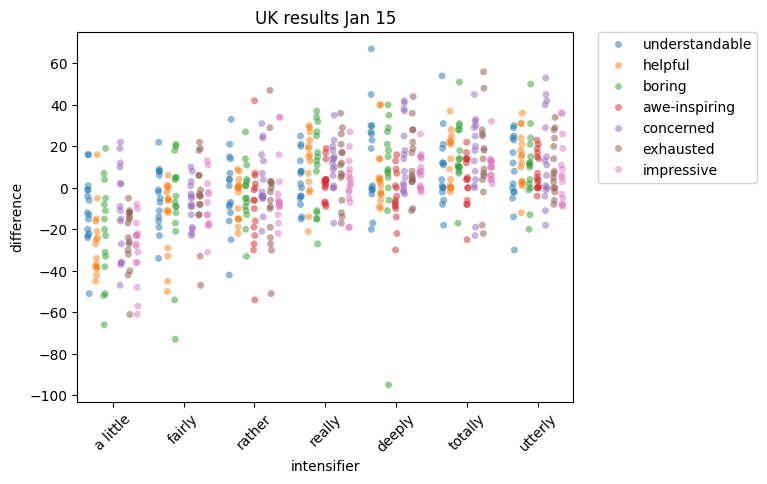

In [402]:
# scatter plot where x is intensifier and y is difference
import seaborn as sns
import matplotlib.pyplot as plt
def get_violin_plot(UK_df,US_df,hue = "country"):
    combined_df = pd.concat([UK_df,US_df])
    df = combined_df[combined_df['has intensifier?']=="yes"]
    df = df[df['intensifier']!='impressive']
    # sns.violinplot(data=df, x="intensifier", y="difference", hue=hue,
    #             split=True, inner="quart", fill=False)
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.show()
    sns.violinplot(data=df, x="intensifier", y="difference", hue=hue,
                split=True, inner="quart", fill=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # rotate x labels
    plt.xticks(rotation=45)
    plt.show()
    # combined_df[(combined_df['predicate'] == "concerned") & (combined_df['intensifier'] == "very")]
    # combined_df[(combined_df['predicate'] == "impressive") & (combined_df['intensifier'] == "kind of")] # I forgot to put kind of here
    # plot stripplot with legend outside graph
    sns.stripplot(data=df, x="intensifier", y="difference", hue=hue, dodge=True, alpha=.5, zorder=1)
    plt.xticks(rotation=45)
    # # plot legend outside graph
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.show()
    # sns.stripplot(data=df, x="predicate", y="Z-Score Difference", hue=hue, dodge=True, alpha=.25, zorder=1)
    # # plot legend outside graph
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # # make width between different hue closer
    # plt.show()
# add column 'country' to new_UK and new_US
# new_UK['country'] = 'UK'
# new_US['country'] = 'US'
# get_violin_plot(new_UK,new_US, "country")

sns.stripplot(data=new_UK, x="intensifier", y="difference", hue='predicate', dodge=True, alpha=.5, order =  ['a little','fairly','rather','really','deeply','totally','utterly'])
# move legend outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
# title is UK results Jan 15
plt.title("UK results Jan 15")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'a little'),
  Text(1, 0, 'fairly'),
  Text(2, 0, 'rather'),
  Text(3, 0, 'really'),
  Text(4, 0, 'deeply'),
  Text(5, 0, 'totally'),
  Text(6, 0, 'utterly')])

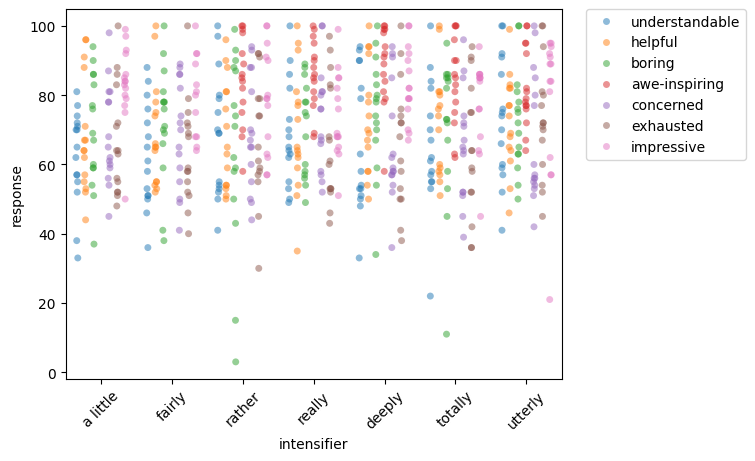

In [325]:

sns.stripplot(data=new_UK_df[new_UK_df['has intensifier?']=='no'], x="intensifier", y="response", hue='predicate', dodge=True, alpha=.5, order =  ['a little','fairly','rather','really','deeply','totally','utterly'])
# move legend outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

In [ ]:
# get mean of response for each personid
UK_mean = new_UK_df.groupby('person_id').agg({'response':'mean','rt':'mean'})
US_mean = new_US_df.groupby('person_id').agg({'response':'mean','rt':'mean'})
# US_mean = new_US_df.groupby('person_id').agg('mean')
print(UK_mean)
print(US_mean)


                           response            rt
person_id                                        
5b5504e902660200017948c3  72.680851   9605.085106
5c609e77044f100001a4bcc7  62.308511   5964.436170
5cb08c4dffd85d00175c7dca  74.372340   8931.595745
5e54367e80cd0944205b27f9  75.159574  16879.829787
5eb3138319f0500f2004d2e9  80.202128  13198.712766
5f0b55881fba44459a99b5e6  67.638298   5265.712766
62961aa925b591e509da43ae  62.053191   8224.297872
62a7970f8387f3fcc95b106b  67.585106   8546.595745
62c5c654b6766b67b006d783  73.595745  21179.382979
63d6ce129c23bac34f740bf8  63.085106   7282.053191
6667264700a534cc81e000e6  80.329787  26943.936170
67269f439696d166fbb74e09  80.531915  20511.000000
6770900b577afd6c2e78ba26  68.361702  15781.765957
677a797fcca3e291b75022f5  74.148936  15638.691489
67860774acf7592ed65861bb  89.648936  22272.680851
                           response            rt
person_id                                        
603d4174686c57c1ede6d042  68.819149   8996.202128


In [396]:
# plot histogram of response
# sns.histplot(data=new_US_df[new_US_df['person_id'] == '678792a46bda290cf59ef7f9'], x="response")
# sns.FacetGrid(new_US_df, col="person_id", col_wrap=4).map(sns.histplot, "response")
# print(len(new_US_df[new_US_df['person_id'] == '66ce94b7bed6f9c71b28798a'][new_US_df['response'] == 100])/len(new_US_df[new_US_df['person_id'] == '66ce94b7bed6f9c71b28798a']))
filtered_df = new_US_df.loc[(new_US_df['response'] > 95) | (new_US_df['response'] < 5)]
for id in new_US_df['person_id'].unique():
    # print if response has value between 0-4 or 96-100

    print(id, len(filtered_df[filtered_df['person_id'] == id])/len(new_US_df[new_US_df['person_id'] == id]))
end_prop ={}
for id in new_US_df['person_id'].unique():
    end_prop[id] = len(filtered_df[filtered_df['person_id'] == id])/len(new_US_df[new_US_df['person_id'] == id])
print(new_US_df[new_US_df['person_id'] == '67634d2bbeccc4cd9717b940'].to_string())
# restrict new_US_df to people who have end_prop less than 0.8
new_US_df = new_US_df[new_US_df['person_id'].isin([id for id in new_US_df['person_id'].unique() if end_prop[id]<0.8])]
# print ids with end_prop greater than 0.8 for new_UK_df
filtered_UK_df = new_UK_df.loc[(new_UK_df['response'] > 95) | (new_UK_df['response'] < 5)]
end_prop ={}
for id in new_UK_df['person_id'].unique():
    end_prop[id] = len(filtered_UK_df[filtered_UK_df['person_id'] == id])/len(new_UK_df[new_UK_df['person_id'] == id])
# print new_UK_df with id 67860774acf7592ed65861bb
print(new_UK_df[new_UK_df['person_id'] == '67860774acf7592ed65861bb'].to_string())

603d4174686c57c1ede6d042 0.031914893617021274
656e9ee5741090021252e349 0.11702127659574468
65e63cea824f2765ce12928e 0.19148936170212766
664bd6149452520a758d2aab 0.09574468085106383
668f8d7343028ae0faa7a907 0.3617021276595745
66b36ffebf7da42a4d3510d9 0.02127659574468085
6713c3cbb7017fabce8708c3 0.0
67294b8c47ee34b9f582e5f2 0.05319148936170213
674594941eb012501554562c 0.1276595744680851
67574c46aee042bdd454767b 0.0
67634d2bbeccc4cd9717b940 0.5212765957446809
6781233fb3b444c30ed8f10d 0.02127659574468085
6787700b61d137214e7e7810 0.010638297872340425
6787853e88a0f7ae62cf80dc 0.0
678792a46bda290cf59ef7f9 0.010638297872340425
6787e1844be152aab6fc0c29 0.3829787234042553
67880351ef0aebe909e1d7b8 0.0
mnrpmja6yq 0.0425531914893617
                     person_id country intensifier       predicate                                                                                                                                                                                                            

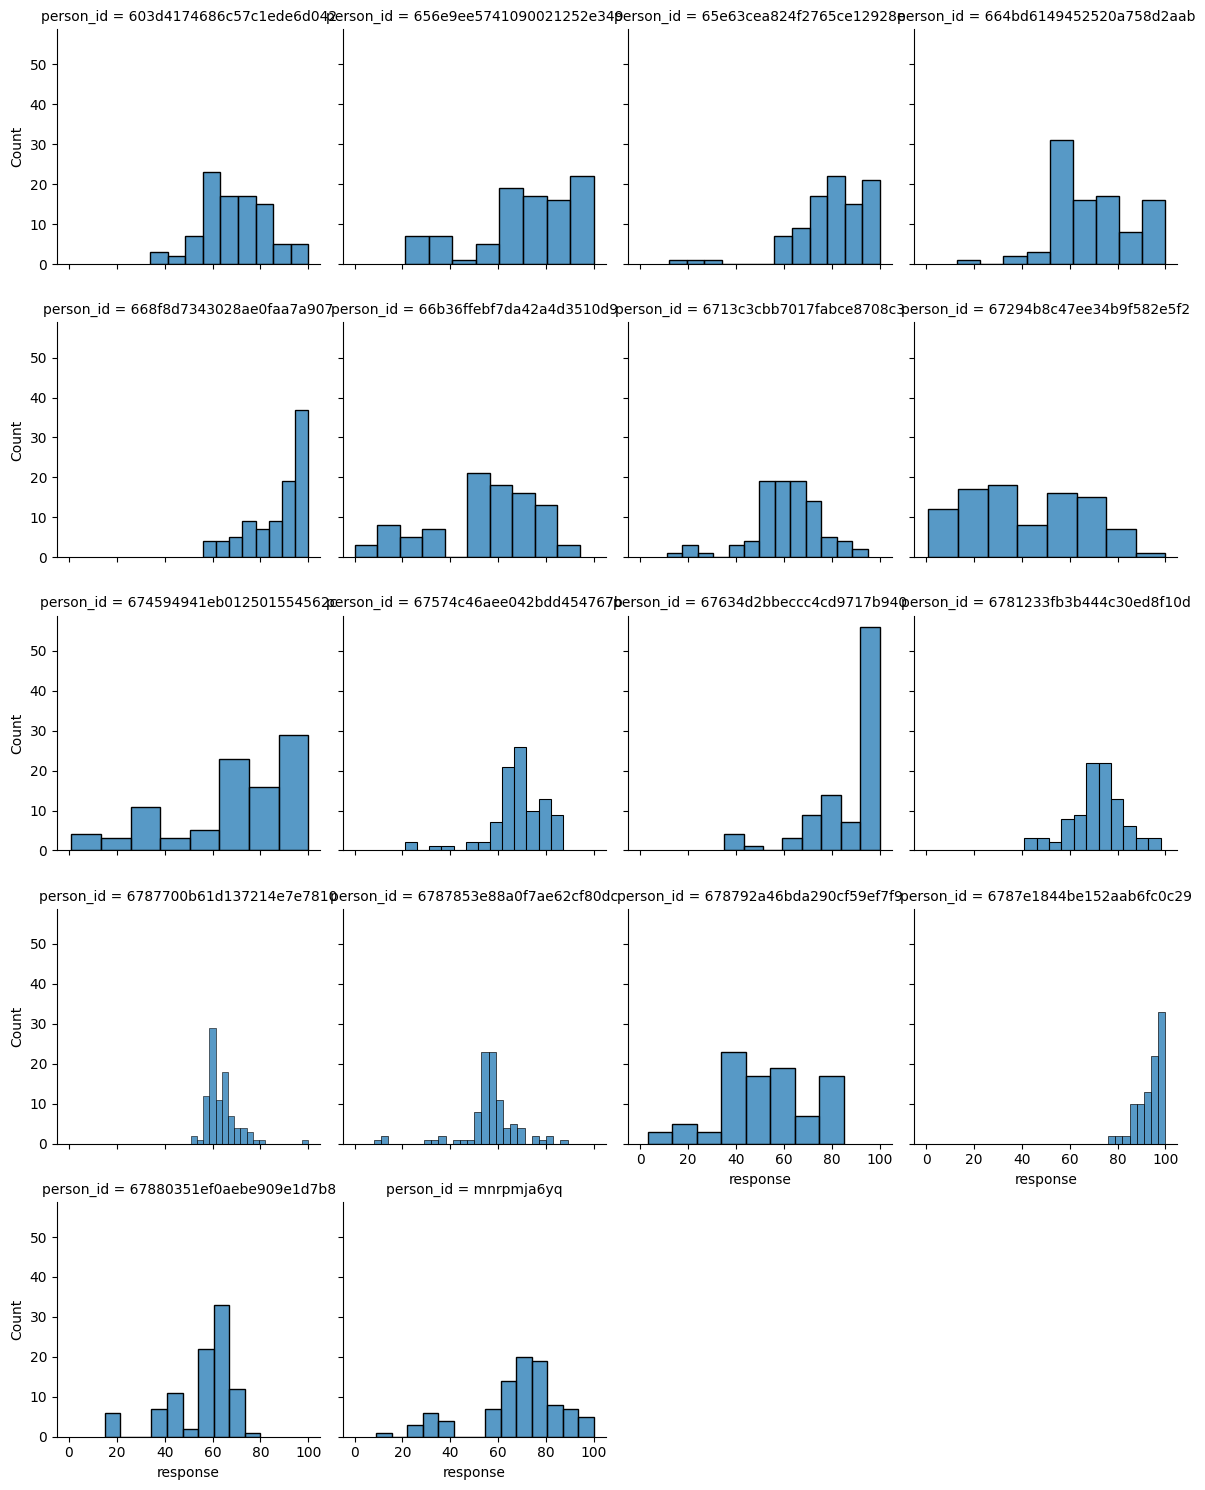

In [400]:
sns.FacetGrid(new_US_df, col="person_id", col_wrap=4).map(sns.histplot, "response")

                 response
predicate                
awe-inspiring   17.727797
boring          21.590593
concerned       19.719744
exhausted       19.532238
helpful         19.834850
impressive      18.015558
understandable  20.595991
                 response
predicate                
awe-inspiring   11.540731
boring          18.533224
concerned       15.950082
exhausted       17.043453
helpful         15.425290
impressive      13.968633
understandable  16.929378


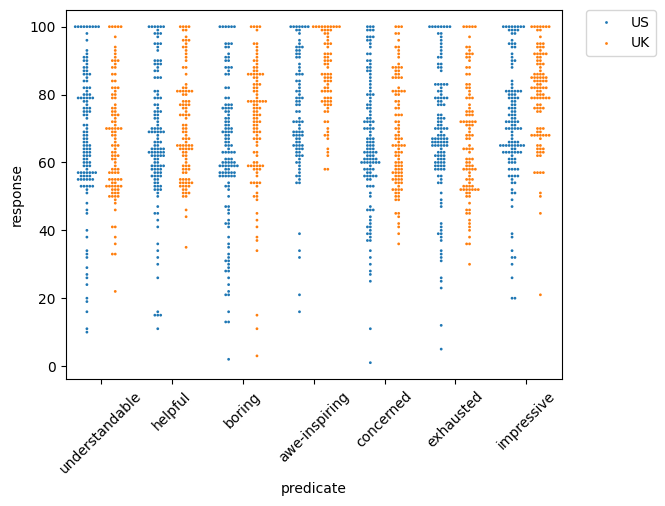

In [407]:

# add column 'country'
new_UK_df['country'] = 'UK'
new_US_df['country'] = 'US'
sns.swarmplot(data=pd.concat([new_US_df[new_US_df['has intensifier?']=='no'],new_UK_df[new_UK_df['has intensifier?']=='no']]), x="predicate", y="response",hue='country', dodge=True,size=2)
# move legend outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)
# check means for each predicate for new_US_df and new_UK_df
# plot means for each predicate for new_US_df and new_UK_df
# sns.barplot(data=pd.concat([new_US_df[new_US_df['has intensifier?']=='no'],new_UK_df[new_UK_df['has intensifier?']=='no']]), x="predicate", y="response",hue='country')

print(new_US_df[new_US_df['has intensifier?']=='no'].groupby('predicate').agg({'response': 'std'}))
print(new_UK_df[new_UK_df['has intensifier?']=='no'].groupby('predicate').agg({'response': 'std'}))
# # print means for US and UK for each predicate
# print(pd.concat(new_US_df[new_US_df['has intensifier?']=='no']).groupby('predicate').agg({'response': 'mean'}))

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'a little'),
  Text(1, 0, 'fairly'),
  Text(2, 0, 'rather'),
  Text(3, 0, 'really'),
  Text(4, 0, 'deeply'),
  Text(5, 0, 'totally'),
  Text(6, 0, 'utterly')])

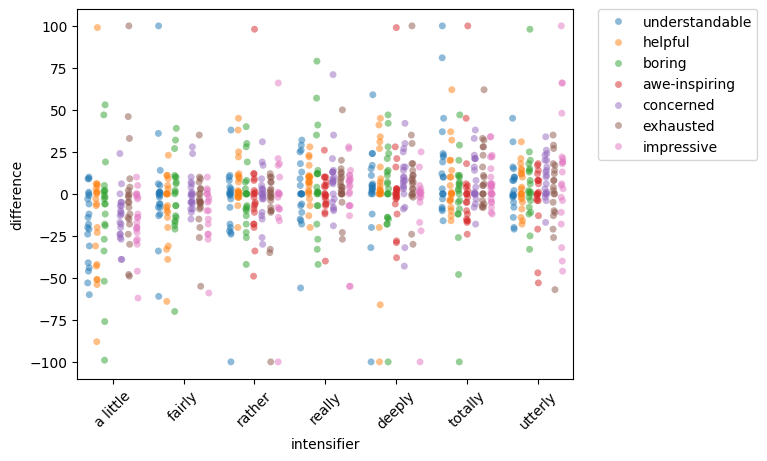

In [ ]:

sns.stripplot(data=new_US, x="intensifier", y="difference", hue='predicate', dodge=True, alpha=.5, order =  ['a little','fairly','rather','really','deeply','totally','utterly'])
# move legend outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

In [ ]:
# group by intensifier, predicate and obtain mean and std of difference
# new_UK.groupby(['intensifier','predicate'])
new_UK = new_UK.groupby(['intensifier','predicate']).agg({'difference':'mean'})
new_US = new_US.groupby(['intensifier','predicate']).agg({'difference':'mean'})
# count unique person_id for new_UK_df and new_US_df
# change df so new_UK does not have multiindex
new_UK = new_UK.reset_index()
# remove index column
new_UK = new_UK.groupby(['intensifier']).agg({'difference':['mean','sem']})
new_US = new_US.reset_index()
new_US = new_US.groupby(['intensifier']).agg({'difference':['mean','sem']})
new_US

difference          
                  mean       sem
intensifier                     
a little    -12.708333  2.372952
deeply        2.682143  1.951745
fairly       -4.289583  2.028902
impressive    1.500000       NaN
rather       -1.858929  1.934890
really        3.831579  1.419827
totally       7.138571  2.405289
utterly       5.057143  1.940282

In [248]:
df = new_UK_df[new_UK_df['has intensifier?'] == 'yes']
df = df[df['predicate']=='concerned']
# print all unique scenarios of df
df = df[df['scenario'] == "Sarah's sister mentions she's been struggling to pay her bills.<br>Sarah: \"I'm "]
df

person_id country intensifier  predicate  \
8     5b5504e902660200017948c3      UK      really  concerned   
102   5c609e77044f100001a4bcc7      UK     totally  concerned   
196   5cb08c4dffd85d00175c7dca      UK      fairly  concerned   
290   5e54367e80cd0944205b27f9      UK      fairly  concerned   
384   5eb3138319f0500f2004d2e9      UK      deeply  concerned   
478   5f0b55881fba44459a99b5e6      UK      rather  concerned   
572   62961aa925b591e509da43ae      UK     totally  concerned   
666   62a7970f8387f3fcc95b106b      UK     utterly  concerned   
760   62c5c654b6766b67b006d783      UK    a little  concerned   
854   63d6ce129c23bac34f740bf8      UK     utterly  concerned   
948   6667264700a534cc81e000e6      UK    a little  concerned   
1042  67269f439696d166fbb74e09      UK      rather  concerned   
1136  6770900b577afd6c2e78ba26      UK    a little  concerned   
1230  677a797fcca3e291b75022f5      UK      fairly  concerned   
1324  67860774acf7592ed65861bb      UK    a little  concerned   

                                               scenario  response     rt  \
8     Sarah's sister mentions she's been struggling ...        71   6790   
102   Sarah's sister mentions she's been struggling ...        63   3983   
196   Sarah's sister mentions she's been struggling ...        66  10128   
290   Sarah's sister mentions she's been struggling ...        87  11837   
384   Sarah's sister mentions she's been struggling ...       100  30120   
478   Sarah's sister mentions she's been struggling ...        71   2536   
572   Sarah's sister mentions she's been struggling ...        69  15484   
666   Sarah's sister mentions she's been struggling ...        95   5547   
760   Sarah's sister mentions she's been struggling ...        84  11261   
854   Sarah's sister mentions she's been struggling ...        93   3930   
948   Sarah's sister mentions she's been struggling ...        74  45614   
1042  Sarah's sister mentions she's been struggling ...        69  14745   
1136  Sarah's sister mentions she's been struggling ...        83  22991   
1230  Sarah's sister mentions she's been struggling ...        28  15182   
1324  Sarah's sister mentions she's been struggling ...       100  22704   

     has intensifier?  difference  intensifier_score  
8                 yes        14.0                1.0  
102               yes         0.0                2.0  
196               yes        -4.0               -2.0  
290               yes         1.0               -2.0  
384               yes        42.0                1.5  
478               yes        16.0               -0.5  
572               yes        30.0                2.0  
666               yes        53.0                2.0  
760               yes        19.0               -3.0  
854               yes        42.0                2.0  
948               yes        12.0               -3.0  
1042              yes         4.0               -0.5  
1136              yes         2.0               -3.0  
1230              yes       -13.0               -2.0  
1324              yes        22.0               -3.0

In [255]:
new_UK[('difference','mean')].keys()

MultiIndex([(  'a little',         'boring'),
            (  'a little',      'concerned'),
            (  'a little',      'exhausted'),
            (  'a little',        'helpful'),
            (  'a little',     'impressive'),
            (  'a little', 'understandable'),
            (    'deeply',  'awe-inspiring'),
            (    'deeply',         'boring'),
            (    'deeply',      'concerned'),
            (    'deeply',      'exhausted'),
            (    'deeply',        'helpful'),
            (    'deeply',     'impressive'),
            (    'deeply', 'understandable'),
            (    'fairly',         'boring'),
            (    'fairly',      'concerned'),
            (    'fairly',      'exhausted'),
            (    'fairly',        'helpful'),
            (    'fairly',     'impressive'),
            (    'fairly', 'understandable'),
            ('impressive',     'impressive'),
            (    'rather',  'awe-inspiring'),
            (    'rather',        

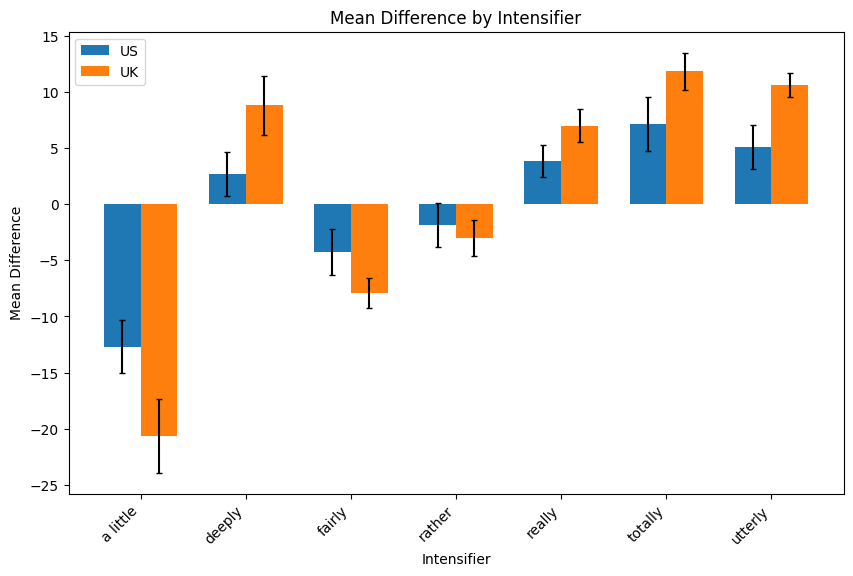

In [ ]:
# plot values next to eachother of each of values in new_US[('difference','mean')].keys()
# so x lables are new_US[('difference','mean')].keys() which are predicate intensifier pairs
# y values are new_US[('difference','mean')].values() and new_UK[('difference','mean')].values()
import matplotlib.pyplot as plt
import numpy as np

keys = list(new_US[('difference','mean')].keys())  # Assuming both have the same keys
# delete entry "impressive from keys
keys.remove(('impressive'))
us_means = [new_US[('difference','mean')][k] for k in keys]
uk_means = [new_UK[('difference','mean')][k] for k in keys]
uk_std = [new_UK[('difference','sem')][k] for k in keys]
us_std = [new_US[('difference','sem')][k] for k in keys]
# uk_inten_val = [new_UK[('intensifier_score','sum')][k] for k in keys]
# us_inten_val = [new_US[('intensifier_score','sum')][k] for k in keys]

# Plotting
# convert range(48) to np array
x = np.array(range(7))  # X positions for bars
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_us = ax.bar(x - width/2, us_means, width, label='US')
bars_uk = ax.bar(x + width/2, uk_means, width, label='UK')
# Add error bars
ax.errorbar(x - width/2, us_means, us_std, fmt='none', ecolor='black', capsize=2)
ax.errorbar(x + width/2, uk_means, uk_std, fmt='none', ecolor='black', capsize=2)
# remove the numbers on bar

# Add labels, title, and legend
ax.set_xlabel('Intensifier')
ax.set_ylabel('Mean Difference')
ax.set_title('Mean Difference by Intensifier')
ax.set_xticks(x)
ax.set_xticklabels([f'{k}' for k in keys], rotation=45, ha='right')

# draw line after each predicate
# for i in [5,12,19,26,33,40]:
#     ax.axvline(x=i-0.5, color='black', linewidth=0.5)
ax.legend()
# add values to each bar
# for i in range(len(us_means)):
#     ax.text(x[i] - width/2, us_means[i], f'{us_inten_val[i]:.0f}', ha='center', va='bottom')
#     ax.text(x[i] + width/2, uk_means[i], f'{uk_inten_val[i]:.0f}', ha='center', va='bottom')
# Show plot
plt.show()


In [225]:
new_UK['difference']['mean']['awe-inspiring']

scenario
Alice sees a performance by a world-renowned ballerina.<br>Alice: "Her movements were so graceful and powerful. It was    -2.600000
David watches a professional surfer ride a massive wave.<br>David: "That was                                              -2.933333
During a safari in Africa, Lily spots a herd of elephants in the wild.<br>Lily: "This is                                   3.266667
Sarah attends a live orchestra performance of Beethoven's Ninth Symphony.<br>Friend: "The power of the music was          -0.466667
Sophie visits a national park known for its majestic mountains and valleys.<br>Sophie: "The landscape here is              4.400000
Name: mean, dtype: float64

In [ ]:
# make a bar graph which compares the means of new_UK and new_US
import matplotlib.pyplot as plt
import numpy as np
# data to plot


Create Narrator dataframe

In [4]:
def find_slide_nar_pair(data, pred, inten,inten_pred_to_scenario):
    # returns slide where the stimuli correspond to the scenario with intensifier, predicate pair, and the control version of the slide
    # this only works if the stimuli matches the data4.js file
    scenario = inten_pred_to_scenario[(inten,pred)]
    slide_with = None
    slide_without = None
    for slide in data:
        if slide['trial_type'] == 'html-slider-response':
            if slide['stimulus'].find(scenario) != -1 and slide_with is None:
                slide_with = slide
            elif slide['stimulus'].find(scenario.replace(inten,"")) != -1:
                slide_without = slide
            if inten == "very" and pred == "concerned" and slide['stimulus'].find("her  concerned")!=-1:
                # print(slide['stimulus'],"\nvery concerned\n",scenario.replace(inten,""))
                slide_without = slide
    if slide_without is None:
        print(inten,pred)
    return (slide_with, slide_without)
def make_pandas_narrator_df(path_to_folder,country,inten_pred_to_scenario):
    # take each UK and US folder and create a pandas dataframe with columns person_id, country, intensifier, predicate, response w/ intensifier, response w/o intensifier, difference
    data_frame = []
    for file in os.listdir(path_to_folder):
        if file.endswith('.json'):
            with open(f"{path_to_folder}\\"+file) as g:
                personid = file[8:-5]
                data = json.load(g)
                if len(data)<70:
                    # don't count
                    continue
                    # print(len(data))
                for pred in predicates:
                    for inten in intensifiers:
                        slide_with, slide_without = find_slide_nar_pair(data, pred, inten,inten_pred_to_scenario)
                        if slide_with is not None and slide_without is not None:
                            # print(inten,pred)
                            data_frame.append([personid,country,inten,pred,slide_with['response'],slide_with['rt'],"yes",slide_with['response']-slide_without['response']])
                            data_frame.append([personid,country,inten,pred,slide_without['response'],slide_without['rt'],"no",None])

    return pd.DataFrame(data_frame, columns = ['person_id', 'country', 'intensifier', 'predicate', 'response', 'rt','has intensifier?', 'difference'])

UK_narrator_df = make_pandas_narrator_df("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\MEng\\narrator_UK_data","UK",inten_pred_to_nar_scenario)
US_narrator_df = make_pandas_narrator_df("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\MEng\\narrator_US_data","US",inten_pred_to_nar_scenario)

very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring
very boring


Create direct politeness dataframe

In [5]:
import os
import json
import pandas as pd

def find_slide_direct_pair(data, pred, inten,inten_pred_to_scenario):
    # returns slide where the stimuli correspond to the scenario with intensifier, predicate pair, and the control version of the slide
    # this only works if the stimuli matches the data4.js file
    scenario = inten_pred_to_scenario[(inten,pred)]
    slide_with = None
    slide_without = None
    for slide in data:
        if slide['trial_type'] == 'html-slider-response':
            if slide['stimulus'].find(scenario) != -1 and slide_with is None:
                slide_with = slide
            elif slide['stimulus'].find(scenario.replace(inten+" "+pred,pred)) != -1:
                slide_without = slide
    if slide_without is None:
        print(inten,pred)
    return (slide_with, slide_without)
def make_pandas_direct_df(path_to_folder,country,inten_pred_to_scenario):
    # take each UK and US folder and create a pandas dataframe with columns person_id, country, intensifier, predicate, response w/ intensifier, response w/o intensifier, difference
    data_frame = []
    for file in os.listdir(path_to_folder):
        if file.endswith('.json'):
            with open(f"{path_to_folder}\\"+file) as g:
                personid = file[8:-5]
                data = json.load(g)
                if len(data)<70:
                    # don't count
                    continue
                    # print(len(data))
                for pred in predicates:
                    for inten in intensifiers:
                        slide_with, slide_without = find_slide_direct_pair(data, pred, inten,inten_pred_to_scenario)
                        if slide_with is not None and slide_without is not None:
                            # print(inten,pred)
                            data_frame.append([personid,country,inten,pred,slide_with['response'],slide_with['rt'],"yes",slide_with['response']-slide_without['response']])
                            data_frame.append([personid,country,inten,pred,slide_without['response'],slide_without['rt'],"no",None])

    return pd.DataFrame(data_frame, columns = ['person_id', 'country', 'intensifier', 'predicate', 'response', 'rt','has intensifier?', 'difference'])

UK_direct_df = make_pandas_direct_df("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\MEng\\UK_direct_politeness","UK",inten_pred_to_direct)
US_direct_df = make_pandas_direct_df("C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\MEng\\US_direct_politeness","US",inten_pred_to_direct)

In [ ]:
# get scenario list
# from newExperiment.js import data
import subprocess
import json

# Run the JavaScript file with Node.js
result = subprocess.run(
    ['node', '-e', 'console.log(JSON.stringify(require("./newExperiment.js")))'],
    capture_output=True,
    text=True
)

# Parse the JSON output to a Python list
data = json.loads(result.stdout)
scenario_set = set()
for scenario in data:
    index = scenario['scenario context'].find(scenario['intensifier']+' ' + scenario['predicate'])
    scenario_set.add((scenario['scenario context'][:index],index,scenario['intensifier'],scenario['predicate']))
print([scenario['predicate'] for scenario in scenario_set if scenario['intensifier']])

{('Emma apologizes for missing a virtual meeting due to internet problems.<br>Emma: "I\'m sorry I couldn\'t join the meeting earlier. My internet went out unexpectedly."<br>Colleague: "That\'s ', 187, 'a little', 'understandable'), ('During a group project, Alex helps Jessica by clarifying some confusing instructions.<br>Jessica: "I appreciate you taking the time to explain that. You\'ve been ', 161, 'totally', 'helpful'), ('Emma attends a virtual conference on data analysis.<br>Colleague: "That keynote speaker had some great insights, don\'t you think?"<br>Emma: "Honestly, I found it ', 162, 'totally', 'boring'), ('Sarah attends a live orchestra performance of Beethoven\'s Ninth Symphony.<br>Friend: "The power of the music was ', 113, 'deeply', 'awe-inspiring'), ('Sarah\'s sister mentions she\'s been struggling to pay her bills.<br>Sarah: "I\'m ', 79, 'fairly', 'concerned'), ('Sarah shares why she got upset during a group discussion.<br>Sarah: "I got defensive because the topic hit cl

Note:
find_slide pair, and make pandas can be one function for the different data direct, narrator and dialogue if the experiment is run correctly with different prompts.

Create columns Z-Score, std, Z-Score Difference, scenario_type,

In [6]:

import scipy.stats as stats
def create_extra_columns(dataframe,scenario_type):
    dataframe['Z-Score'] = dataframe.groupby('person_id')[['response']].transform(lambda x: stats.zscore(x))
    #get standard deviation
    dataframe['std'] = dataframe.groupby('person_id')[['response']].transform('std')
    dataframe['Z-Score Difference'] = dataframe['difference']/dataframe['std']
    # make column scnario_type
    dataframe['scenario_type'] = scenario_type
    # make column combining scenario type and country
    dataframe['scenario_country'] = dataframe['scenario_type'].astype(str) + " " + dataframe['country']
    return dataframe
UK_df = create_extra_columns(UK_df,"dialogue")
US_df = create_extra_columns(US_df,"dialogue")
UK_narrator_df = create_extra_columns(UK_narrator_df,"narrator")
US_narrator_df = create_extra_columns(US_narrator_df,"narrator")
UK_direct_df = create_extra_columns(UK_direct_df,"direct")
US_direct_df = create_extra_columns(US_direct_df,"direct")

In [7]:
# save dataframes as csv
UK_df.to_csv("UK_df.csv")
US_df.to_csv("US_df.csv")
UK_narrator_df.to_csv("UK_narrator_df.csv")
US_narrator_df.to_csv("US_narrator_df.csv")
UK_direct_df.to_csv("UK_direct_df.csv")
US_direct_df.to_csv("US_direct_df.csv")

## Analysis through graphs

Summary statistics

In [44]:
# get mean of difference for each intensifier for the 4 dataframes
# print("US, dialogue version\n",US_df.groupby('intensifier')['difference'].mean())
# print("UK, dialogue version\n",UK_df.groupby('intensifier')['difference'].mean())
# print("US, narrator version\n",US_narrator_df.groupby('intensifier')['difference'].mean())
# print("UK, narrator version\n",UK_narrator_df.groupby('intensifier')['difference'].mean())
print("US, direct version\n",US_direct_df[US_direct_df['has intensifier?']=='yes'].groupby(['predicate','intensifier'])['response'].mean())
# print("UK, direct version\n",US_direct_df.groupby('intensifier')['response'].mean())

US, direct version
 predicate       intensifier
boring          extremely      26.80
                kind of        23.95
                quite          31.95
                slightly       34.90
                very           40.10
concerned       extremely      57.15
                kind of        58.75
                quite          64.80
                slightly       57.20
                very           62.45
difficult       extremely      54.85
                kind of        67.70
                quite          58.15
                slightly       60.00
                very           63.25
exhausted       extremely      70.40
                kind of        61.75
                quite          63.70
                slightly       70.95
                very           61.75
helpful         extremely      82.30
                kind of        58.10
                quite          80.20
                slightly       56.60
                very           81.80
impressive      extremely  

Import necessary libraries

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## plot raw scores

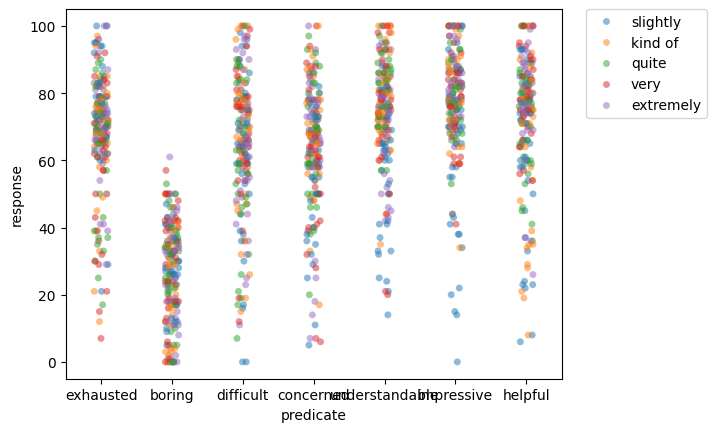

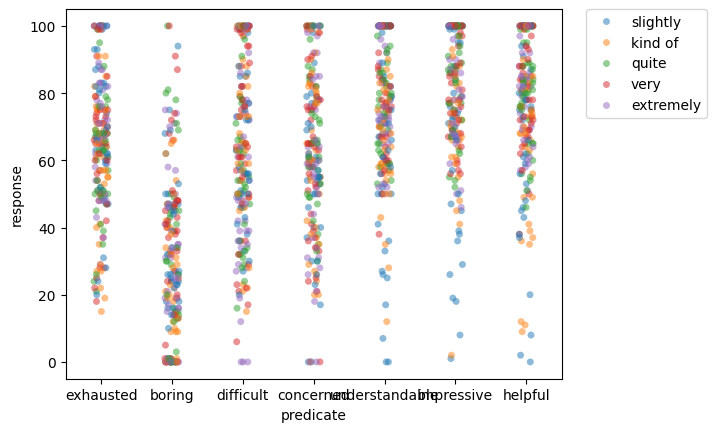

In [ ]:

# plot response scores for each intensifier
#first 10 rows of UK_df

sns.stripplot(data=UK_direct_df, x="predicate", y="response", hue="intensifier",dodge=False, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

sns.stripplot(data=US_direct_df, x="predicate", y="response", hue="intensifier",dodge=False, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




### Barplots: How do mean difference from baselines differ between conditions?

difference direct


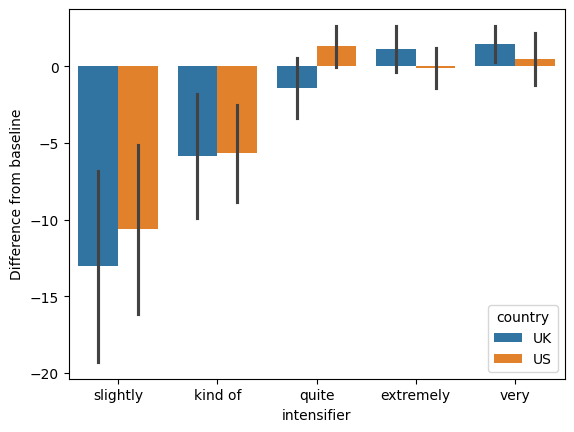

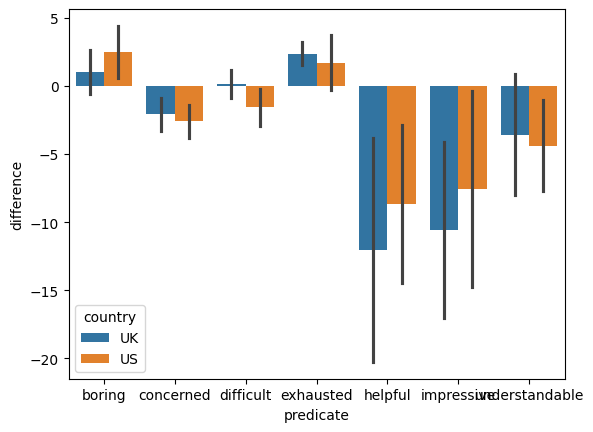

C:\Users\myuhk\AppData\Local\Temp\ipykernel_26084\3126427994.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["slightly\nimpolite","slightly\npolite","kind of\nimpolite","kind of\npolite","quite\nimpolite","quite\npolite","very\nimpolite","very\npolite","extremely\nimpolite","extremely\npolite"])


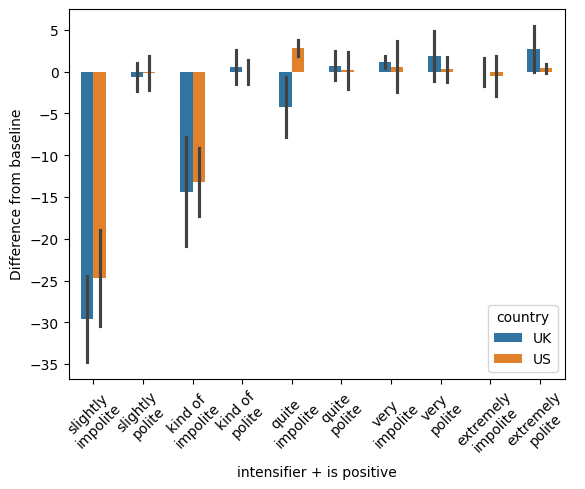

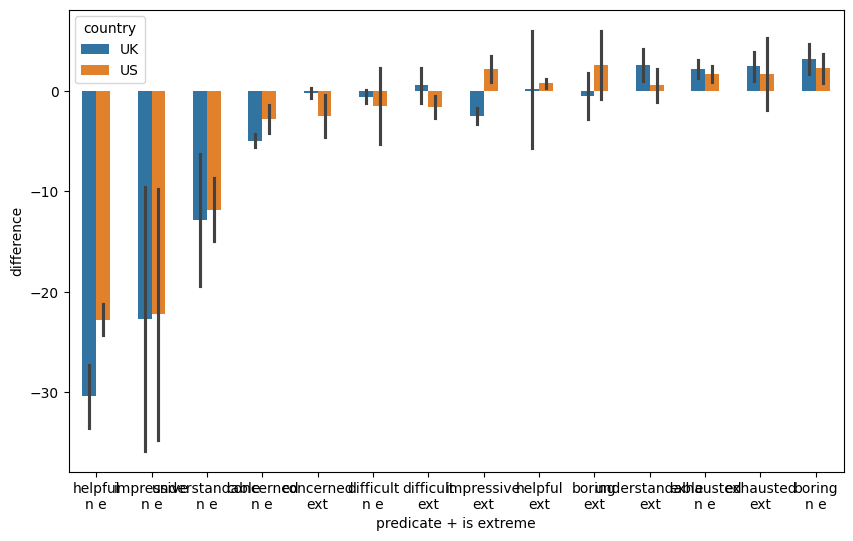

In [29]:
def barplots_z_score(combined_df,hue):
    df = combined_df[combined_df['has intensifier?']=="yes"]
    # collapse df so each row has unique intensifier predicate pair
    # average out everything with the same intensifier, country and preicate# 
    new_df = df.drop(columns=['person_id','response','rt','has intensifier?','std'])
    small_df = new_df.groupby(['intensifier','predicate',"country"]).mean().reset_index()
    # sort by Z-Score Difference
    mean_diff = small_df.groupby('intensifier')['Z-Score Difference'].mean().sort_values()
    small_df = small_df.set_index('intensifier').loc[mean_diff.index].reset_index()
    # plot bar plot where each bar represents the mean of Z-Score Difference for each intensifier
    # error bar represents standard deviation of mean of Z-score difference of each intensifier
    sns.barplot(data=small_df, x="intensifier", y="Z-Score Difference", hue=hue, errorbar="se")
    plt.show()
    sns.barplot(data=small_df, x="predicate", y="Z-Score Difference", hue=hue, errorbar="se")
    plt.show()
    # add is positive column where is positive if predicate is ["helpful, impressive, understandable"] and negative otherwise
    small_df['is positive'] = small_df['predicate'].apply(lambda x: "pos" if x in ["helpful","impressive","understandable"] else "neg")
    # add is extreme if intensifier is ["extremely","very"] and not extreme otherwise
    small_df['is extreme'] = small_df['intensifier'].apply(lambda x: "ext" if x in ["extremely","very",'quite'] else "n e")
    # plot mean of Z-Score Difference for each inteisifer and is positive pair
    small_df['intensifier + is positive'] = small_df['intensifier'] + "\n" + small_df['is positive']
    small_df['predicate + is extreme'] = small_df['predicate'] + "\n" + small_df['is extreme']
    mean_diff = small_df.groupby('intensifier + is positive')['Z-Score Difference'].mean().sort_values()
    small_df = small_df.set_index('intensifier + is positive').loc[mean_diff.index].reset_index()
    # plot bars but leave ample space in between
    sns.barplot(data=small_df, x="intensifier + is positive", y="Z-Score Difference", hue=hue, errorbar="se",width=0.5)
    plt.show()
    mean_diff = small_df.groupby('predicate + is extreme')['Z-Score Difference'].mean().sort_values()
    small_df = small_df.set_index('predicate + is extreme').loc[mean_diff.index].reset_index()
    # plot bars but leave ample space in between
    plt.figure(figsize=(10, 6))
    sns.barplot(data=small_df, x="predicate + is extreme", y="Z-Score Difference", hue=hue, errorbar="se",width=0.5)
    plt.show()
# make the same function but for difference instead of z-score difference
def barplots_difference(combined_df,hue):
    df = combined_df[combined_df['has intensifier?']=="yes"]
    # collapse df so each row has unique intensifier predicate pair
    # average out everything with the same intensifier, country and preicate# 
    # let new_df be df without person_id
    new_df = df.drop(columns=['person_id','response','rt','has intensifier?','std'])
    small_df = new_df.groupby(['intensifier','predicate',"country","scenario_type","scenario_country"]).mean().reset_index()
    # sort by Z-Score Difference
    mean_diff = small_df.groupby('intensifier')['difference'].mean().sort_values()
    small_df = small_df.set_index('intensifier').loc[mean_diff.index].reset_index()
    # plot bar plot where each bar represents the mean of Z-Score Difference for each intensifier
    # error bar represents standard deviation of mean of Z-score difference of each intensifier
    sns.barplot(data=small_df, x="intensifier", y="difference", hue=hue, errorbar="se")
    plt.ylabel("Difference from baseline")
    plt.show()
    sns.barplot(data=small_df, x="predicate", y="difference", hue=hue, errorbar="se")
    plt.show()
    # add is positive column where is positive if predicate is ["helpful, impressive, understandable"] and negative otherwise
    small_df['is positive'] = small_df['predicate'].apply(lambda x: "pos" if x in ["helpful","impressive","understandable"] else "neg")
    # add is extreme if intensifier is ["extremely","very"] and not extreme otherwise
    small_df['is extreme'] = small_df['intensifier'].apply(lambda x: "ext" if x in ["extremely","very",'quite'] else "n e")
    # plot mean of Z-Score Difference for each inteisifer and is positive pair
    small_df['intensifier + is positive'] = small_df['intensifier'] + "\n" + small_df['is positive']
    small_df['predicate + is extreme'] = small_df['predicate'] + "\n" + small_df['is extreme']
    mean_diff = small_df.groupby('intensifier + is positive')['difference'].mean().sort_values()
    # set order so it goes as slightly pos, slightly neg, kind of pos, kind of neg, quite pos, quite neg, very pos, very neg, extremely pos, extremley ne
    small_df = small_df.set_index('intensifier + is positive').loc[mean_diff.index].reset_index()
    # plot bars but leave ample space in between
    ax = sns.barplot(data=small_df, x="intensifier + is positive", y="difference", hue=hue, errorbar="se",width=0.5,order = ["slightly\npos","slightly\nneg","kind of\npos","kind of\nneg","quite\npos","quite\nneg","very\nneg","very\npos","extremely\nneg","extremely\npos"])
    plt.ylabel("Difference from baseline")
    #label each bar with "politeness" or "impoliteness"
    # Set custom x-axis labels
    ax.set_xticklabels(["slightly\nimpolite","slightly\npolite","kind of\nimpolite","kind of\npolite","quite\nimpolite","quite\npolite","very\nimpolite","very\npolite","extremely\nimpolite","extremely\npolite"])
    # rotate
    plt.xticks(rotation=45)
    
    plt.show()
    mean_diff = small_df.groupby('predicate + is extreme')['difference'].mean().sort_values()
    small_df = small_df.set_index('predicate + is extreme').loc[mean_diff.index].reset_index()
    # plot bars but leave ample space in between
    plt.figure(figsize=(10, 6))
    sns.barplot(data=small_df, x="predicate + is extreme", y="difference", hue=hue, errorbar="se",width=0.5)
    plt.show()
# print("z score dialogue")
# barplots_z_score(pd.concat([UK_df,US_df]),"country")
# print("z score narrator")
# barplots_z_score(pd.concat([UK_narrator_df,US_narrator_df]),"country")
# print("difference dialogue")
# barplots_difference(pd.concat([UK_df,US_df]),"country")
# print("difference narrator")
# barplots_difference(pd.concat([UK_narrator_df,US_narrator_df]),"country")
# print("difference dialogue")
print("difference direct")
barplots_difference(pd.concat([UK_direct_df, US_direct_df]),"country")



difference direct


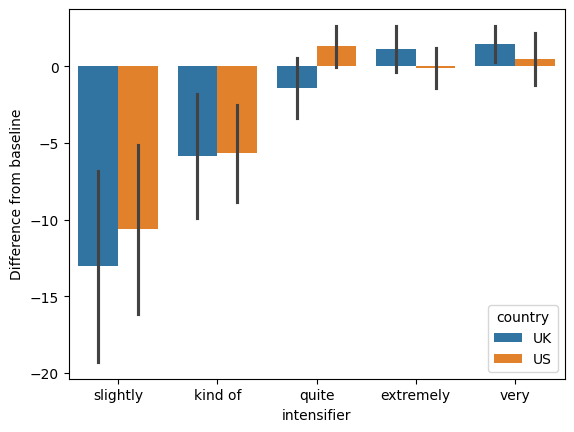

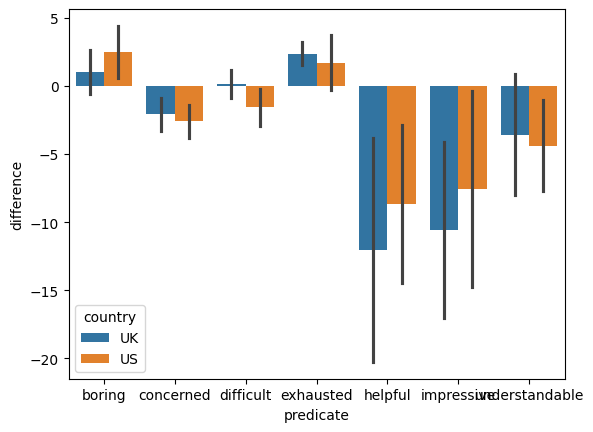

C:\Users\myuhk\AppData\Local\Temp\ipykernel_26084\3126427994.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["slightly\nimpolite","slightly\npolite","kind of\nimpolite","kind of\npolite","quite\nimpolite","quite\npolite","very\nimpolite","very\npolite","extremely\nimpolite","extremely\npolite"])


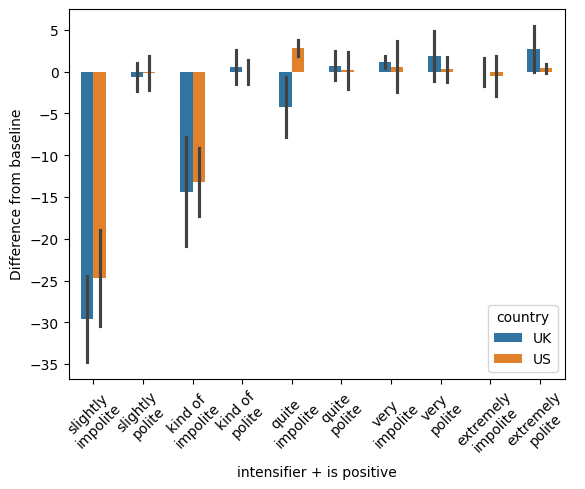

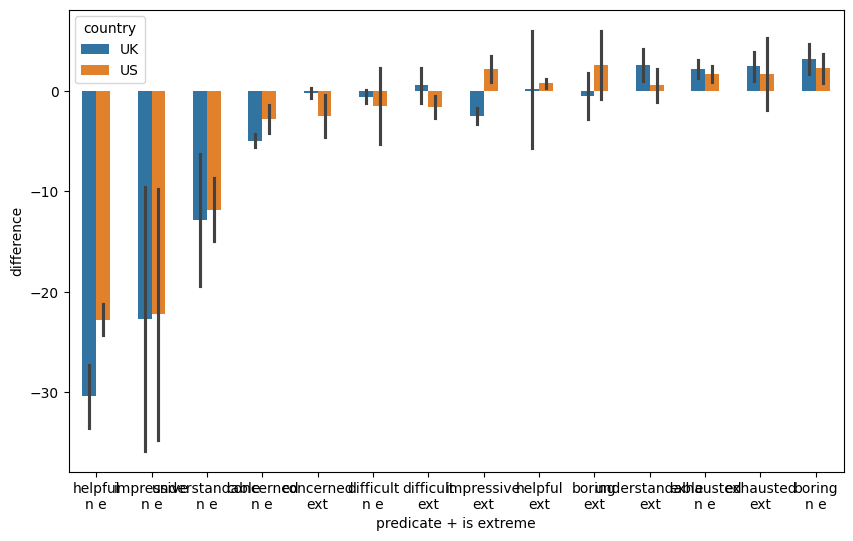

In [ ]:
def barplots_z_score(combined_df,hue):
    df = combined_df[combined_df['has intensifier?']=="yes"]
    # collapse df so each row has unique intensifier predicate pair
    # average out everything with the same intensifier, country and preicate# 
    new_df = df.drop(columns=['person_id','response','rt','has intensifier?','std'])
    small_df = new_df.groupby(['intensifier','predicate',"country"]).mean().reset_index()
    # sort by Z-Score Difference
    mean_diff = small_df.groupby('intensifier')['Z-Score Difference'].mean().sort_values()
    small_df = small_df.set_index('intensifier').loc[mean_diff.index].reset_index()
    # plot bar plot where each bar represents the mean of Z-Score Difference for each intensifier
    # error bar represents standard deviation of mean of Z-score difference of each intensifier
    sns.barplot(data=small_df, x="intensifier", y="Z-Score Difference", hue=hue, errorbar="se")
    plt.show()
    sns.barplot(data=small_df, x="predicate", y="Z-Score Difference", hue=hue, errorbar="se")
    plt.show()
    # add is positive column where is positive if predicate is ["helpful, impressive, understandable"] and negative otherwise
    small_df['is positive'] = small_df['predicate'].apply(lambda x: "pos" if x in ["helpful","impressive","understandable"] else "neg")
    # add is extreme if intensifier is ["extremely","very"] and not extreme otherwise
    small_df['is extreme'] = small_df['intensifier'].apply(lambda x: "ext" if x in ["extremely","very",'quite'] else "n e")
    # plot mean of Z-Score Difference for each inteisifer and is positive pair
    small_df['intensifier + is positive'] = small_df['intensifier'] + "\n" + small_df['is positive']
    small_df['predicate + is extreme'] = small_df['predicate'] + "\n" + small_df['is extreme']
    mean_diff = small_df.groupby('intensifier + is positive')['Z-Score Difference'].mean().sort_values()
    small_df = small_df.set_index('intensifier + is positive').loc[mean_diff.index].reset_index()
    # plot bars but leave ample space in between
    sns.barplot(data=small_df, x="intensifier + is positive", y="Z-Score Difference", hue=hue, errorbar="se",width=0.5)
    plt.show()
    mean_diff = small_df.groupby('predicate + is extreme')['Z-Score Difference'].mean().sort_values()
    small_df = small_df.set_index('predicate + is extreme').loc[mean_diff.index].reset_index()
    # plot bars but leave ample space in between
    plt.figure(figsize=(10, 6))
    sns.barplot(data=small_df, x="predicate + is extreme", y="Z-Score Difference", hue=hue, errorbar="se",width=0.5)
    plt.show()
# make the same function but for difference instead of z-score difference
def barplots_difference(combined_df,hue):
    df = combined_df[combined_df['has intensifier?']=="yes"]
    # collapse df so each row has unique intensifier predicate pair
    # average out everything with the same intensifier, country and preicate# 
    # let new_df be df without person_id
    new_df = df.drop(columns=['person_id','response','rt','has intensifier?','std'])
    small_df = new_df.groupby(['intensifier','predicate',"country","scenario_type","scenario_country"]).mean().reset_index()
    # sort by Z-Score Difference
    mean_diff = small_df.groupby('intensifier')['difference'].mean().sort_values()
    small_df = small_df.set_index('intensifier').loc[mean_diff.index].reset_index()
    # plot bar plot where each bar represents the mean of Z-Score Difference for each intensifier
    # error bar represents standard deviation of mean of Z-score difference of each intensifier
    sns.barplot(data=small_df, x="intensifier", y="difference", hue=hue, errorbar="se")
    plt.ylabel("Difference from baseline")
    plt.show()
    sns.barplot(data=small_df, x="predicate", y="difference", hue=hue, errorbar="se")
    plt.show()
    # add is positive column where is positive if predicate is ["helpful, impressive, understandable"] and negative otherwise
    small_df['is positive'] = small_df['predicate'].apply(lambda x: "pos" if x in ["helpful","impressive","understandable"] else "neg")
    # add is extreme if intensifier is ["extremely","very"] and not extreme otherwise
    small_df['is extreme'] = small_df['intensifier'].apply(lambda x: "ext" if x in ["extremely","very",'quite'] else "n e")
    # plot mean of Z-Score Difference for each inteisifer and is positive pair
    small_df['intensifier + is positive'] = small_df['intensifier'] + "\n" + small_df['is positive']
    small_df['predicate + is extreme'] = small_df['predicate'] + "\n" + small_df['is extreme']
    mean_diff = small_df.groupby('intensifier + is positive')['difference'].mean().sort_values()
    # set order so it goes as slightly pos, slightly neg, kind of pos, kind of neg, quite pos, quite neg, very pos, very neg, extremely pos, extremley ne
    small_df = small_df.set_index('intensifier + is positive').loc[mean_diff.index].reset_index()
    # plot bars but leave ample space in between
    ax = sns.barplot(data=small_df, x="intensifier + is positive", y="difference", hue=hue, errorbar="se",width=0.5,order = ["slightly\npos","slightly\nneg","kind of\npos","kind of\nneg","quite\npos","quite\nneg","very\nneg","very\npos","extremely\nneg","extremely\npos"])
    plt.ylabel("Difference from baseline")
    #label each bar with "politeness" or "impoliteness"
    # Set custom x-axis labels
    ax.set_xticklabels(["slightly\nimpolite","slightly\npolite","kind of\nimpolite","kind of\npolite","quite\nimpolite","quite\npolite","very\nimpolite","very\npolite","extremely\nimpolite","extremely\npolite"])
    # rotate
    plt.xticks(rotation=45)
    
    plt.show()
    mean_diff = small_df.groupby('predicate + is extreme')['difference'].mean().sort_values()
    small_df = small_df.set_index('predicate + is extreme').loc[mean_diff.index].reset_index()
    # plot bars but leave ample space in between
    plt.figure(figsize=(10, 6))
    sns.barplot(data=small_df, x="predicate + is extreme", y="difference", hue=hue, errorbar="se",width=0.5)
    plt.show()
# print("z score dialogue")
# barplots_z_score(pd.concat([UK_df,US_df]),"country")
# print("z score narrator")
# barplots_z_score(pd.concat([UK_narrator_df,US_narrator_df]),"country")
# print("difference dialogue")
# barplots_difference(pd.concat([UK_df,US_df]),"country")
# print("difference narrator")
# barplots_difference(pd.concat([UK_narrator_df,US_narrator_df]),"country")
# print("difference dialogue")
print("difference direct")
barplots_difference(pd.concat([UK_direct_df, US_direct_df]),"country")



UK with different scenario types


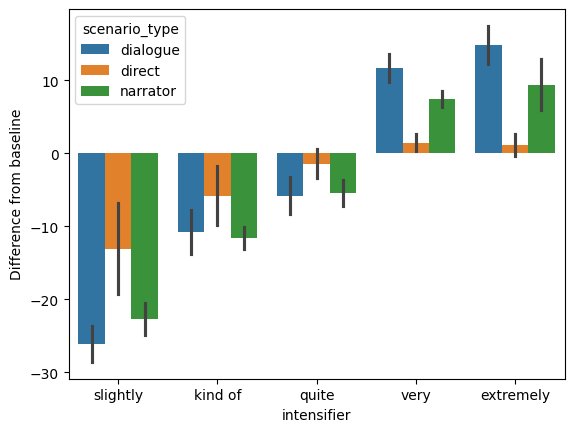

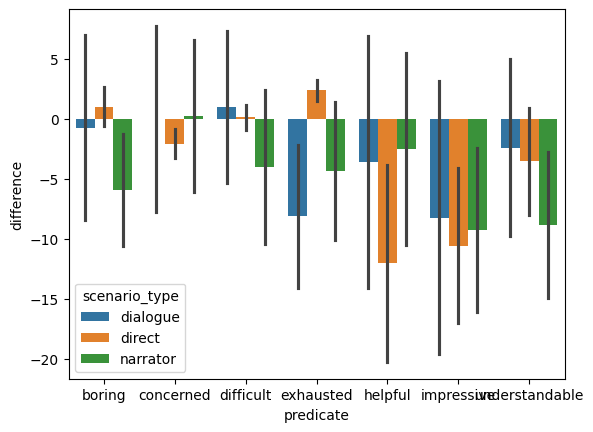

C:\Users\myuhk\AppData\Local\Temp\ipykernel_26084\1946210563.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["slightly\nimpolite","slightly\npolite","kind of\nimpolite","kind of\npolite","quite\nimpolite","quite\npolite","very\nimpolite","very\npolite","extremely\nimpolite","extremely\npolite"])


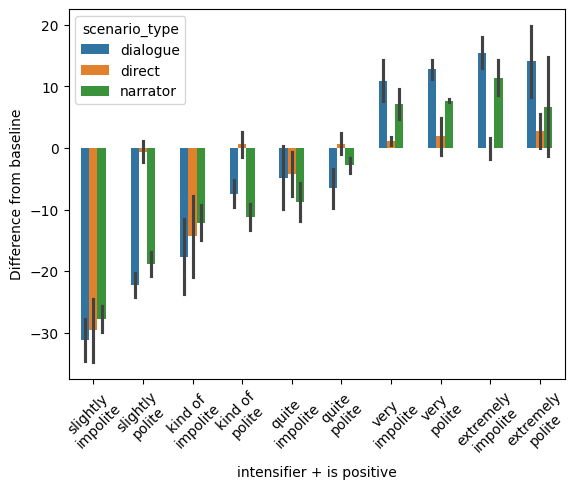

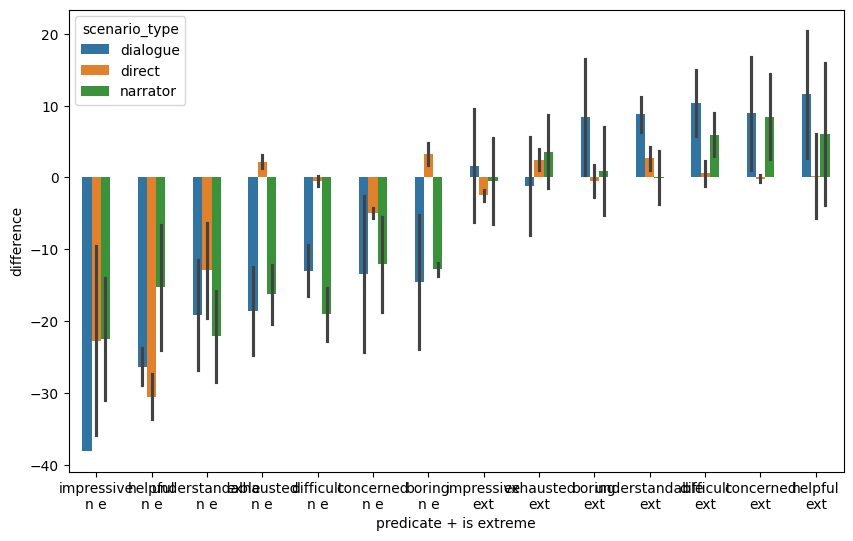

US with different scenario types


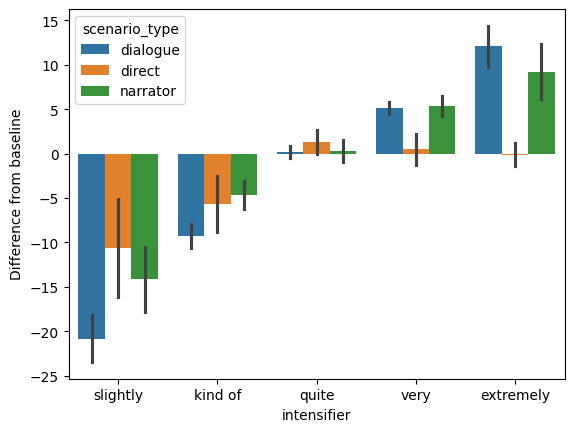

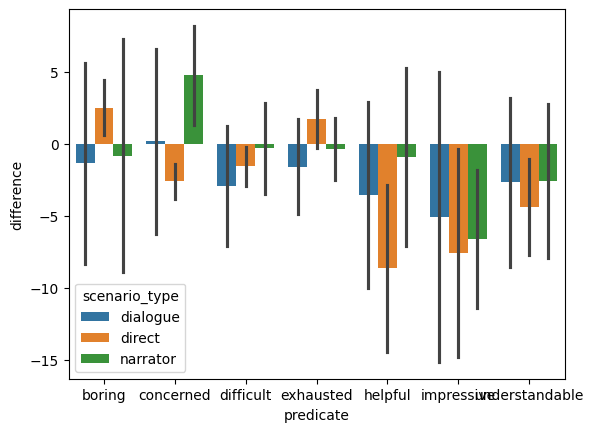

C:\Users\myuhk\AppData\Local\Temp\ipykernel_26084\1946210563.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["slightly\nimpolite","slightly\npolite","kind of\nimpolite","kind of\npolite","quite\nimpolite","quite\npolite","very\nimpolite","very\npolite","extremely\nimpolite","extremely\npolite"])


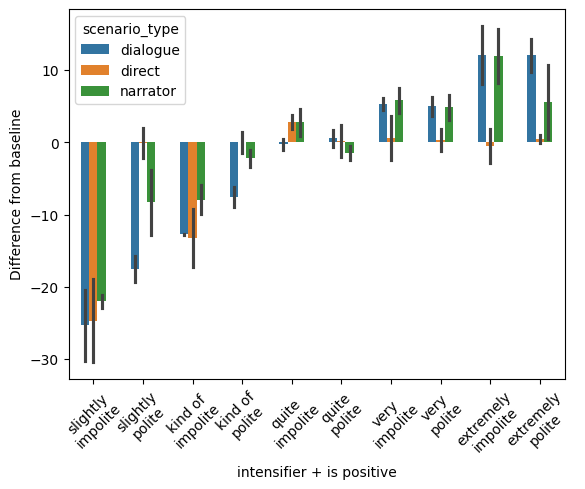

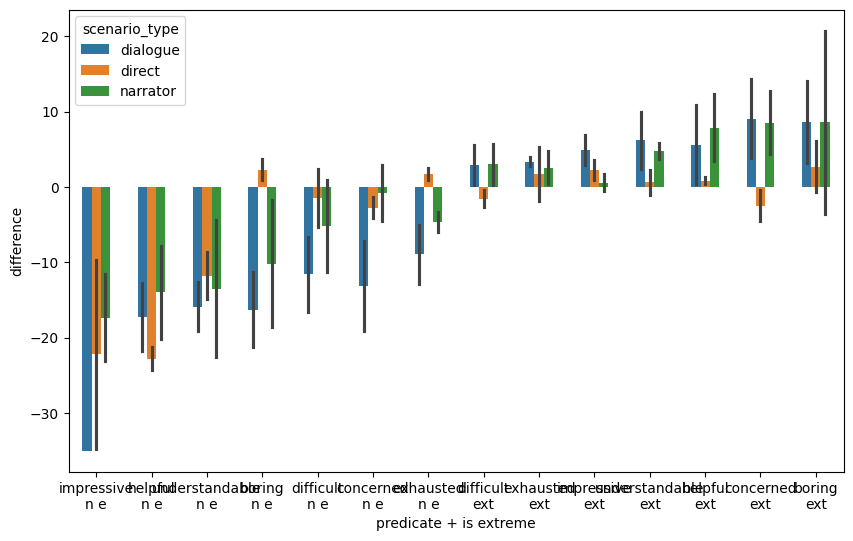

difference dialogue


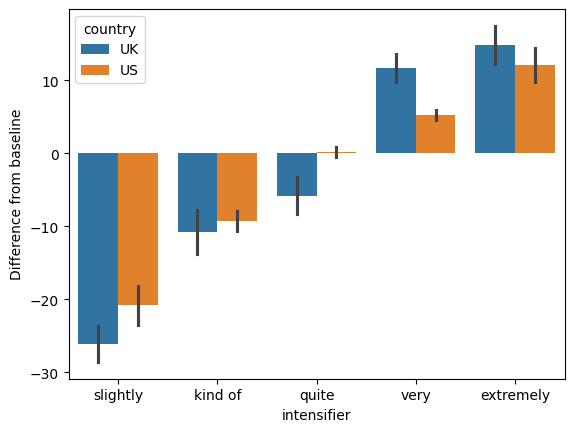

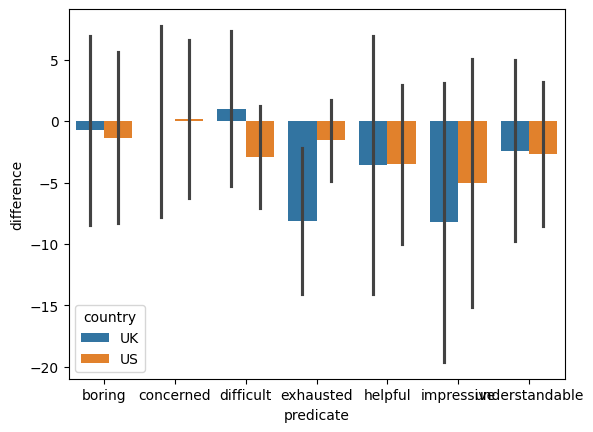

C:\Users\myuhk\AppData\Local\Temp\ipykernel_26084\1946210563.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["slightly\nimpolite","slightly\npolite","kind of\nimpolite","kind of\npolite","quite\nimpolite","quite\npolite","very\nimpolite","very\npolite","extremely\nimpolite","extremely\npolite"])


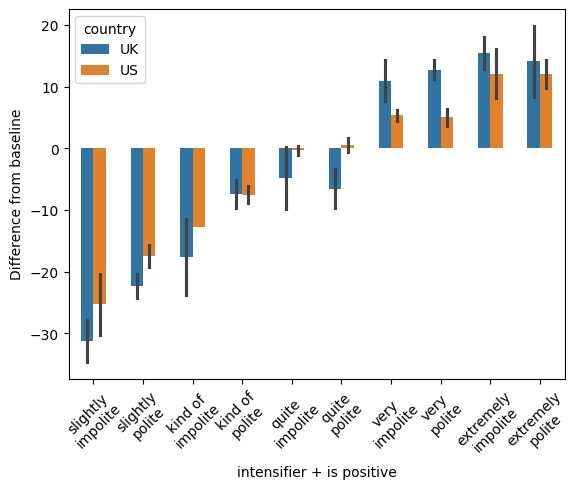

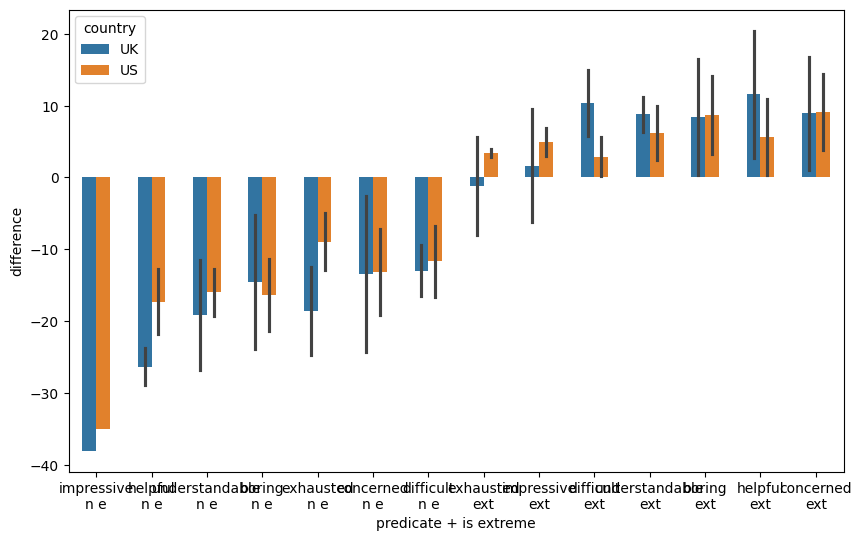

difference narrator


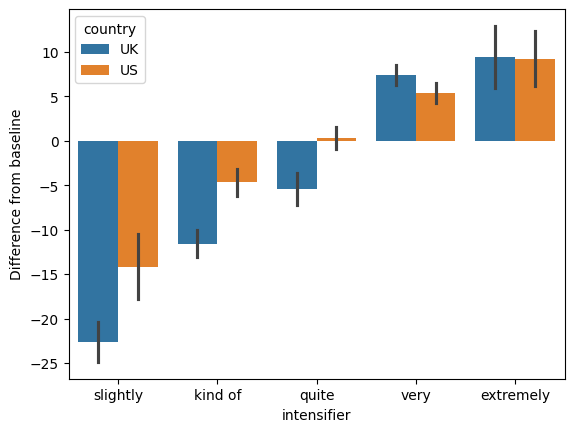

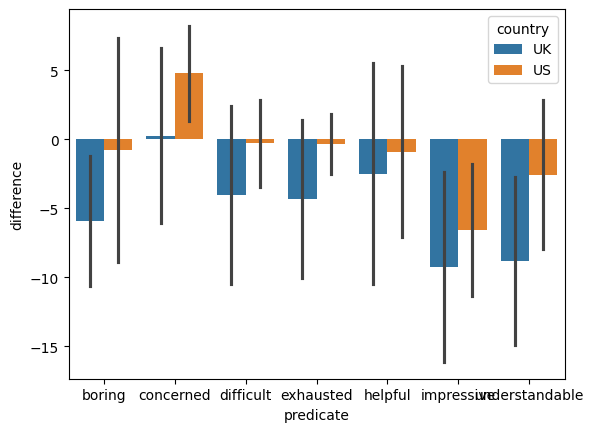

C:\Users\myuhk\AppData\Local\Temp\ipykernel_26084\1946210563.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["slightly\nimpolite","slightly\npolite","kind of\nimpolite","kind of\npolite","quite\nimpolite","quite\npolite","very\nimpolite","very\npolite","extremely\nimpolite","extremely\npolite"])


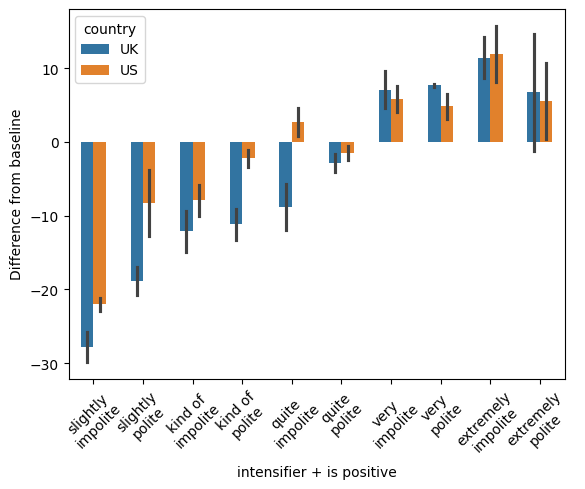

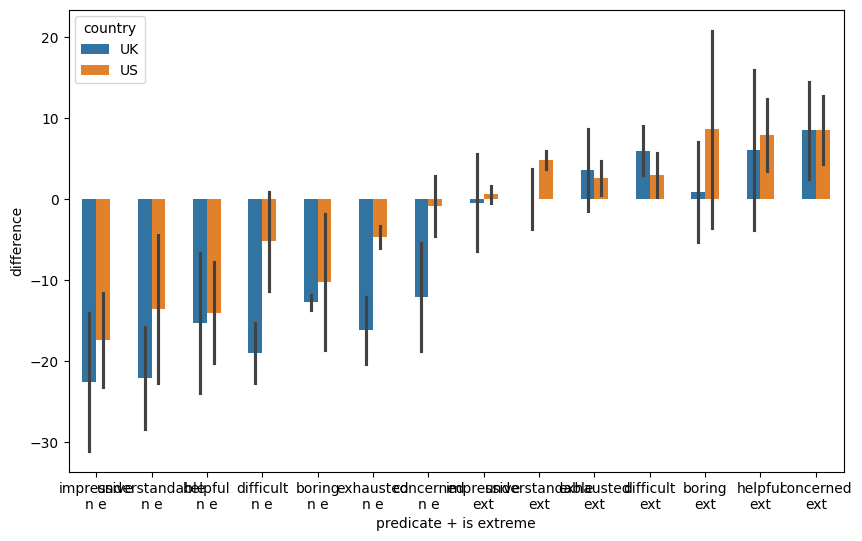

In [ ]:
print("UK with different scenario types")
barplots_difference(pd.concat([UK_df,UK_narrator_df,UK_direct_df]),"scenario_type")
print("UK with narrator vs dialogue")
barplots_difference(pd.concat([UK_df,UK_narrator_df]),"scenario_type")
print("US with different scenario types")
barplots_difference(pd.concat([US_df,US_narrator_df,US_direct_df]),"scenario_type")
print("US with narrator vs dialogue")
barplots_difference(pd.concat([US_df,US_narrator_df]),"scenario_type")
print("difference dialogue")
barplots_difference(pd.concat([UK_df,US_df]),"country")
print("difference narrator")
barplots_difference(pd.concat([UK_narrator_df,US_narrator_df]),"country")

### Strip & Violin Plots: How do means differ across intensifiers, preicates, and countries? 

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt
def get_violin_plot(UK_df,US_df,hue = "country"):
    combined_df = pd.concat([UK_df,US_df])
    df = combined_df[combined_df['has intensifier?']=="yes"]
    sns.violinplot(data=df, x="intensifier", y="Z-Score Difference", hue=hue,
                split=True, inner="quart", fill=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    sns.violinplot(data=df, x="predicate", y="Z-Score Difference", hue=hue,
                split=True, inner="quart", fill=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    # combined_df[(combined_df['predicate'] == "concerned") & (combined_df['intensifier'] == "very")]
    # combined_df[(combined_df['predicate'] == "impressive") & (combined_df['intensifier'] == "kind of")] # I forgot to put kind of here
    # plot stripplot with legend outside graph
    sns.stripplot(data=df, x="intensifier", y="Z-Score Difference", hue=hue, dodge=True, alpha=.25, zorder=1)

    # plot legend outside graph
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    sns.stripplot(data=df, x="predicate", y="Z-Score Difference", hue=hue, dodge=True, alpha=.25, zorder=1)
    # plot legend outside graph
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # make width between different hue closer
    plt.show()

#### Strip plots

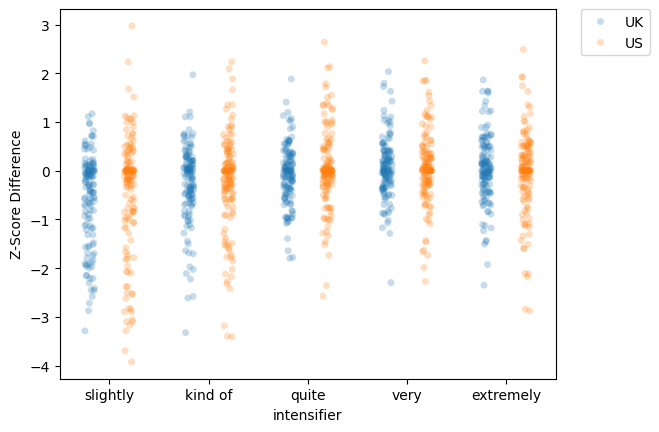

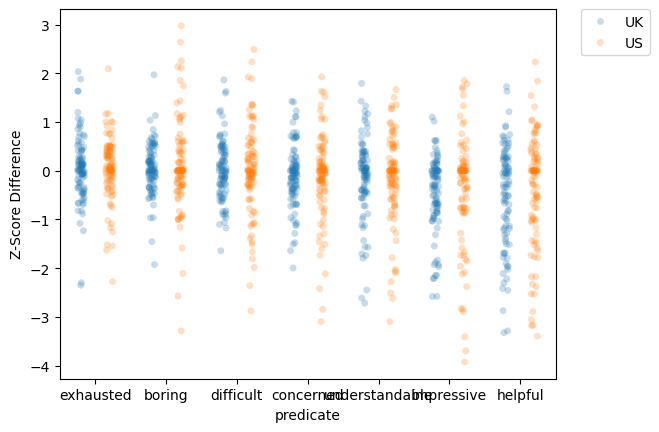

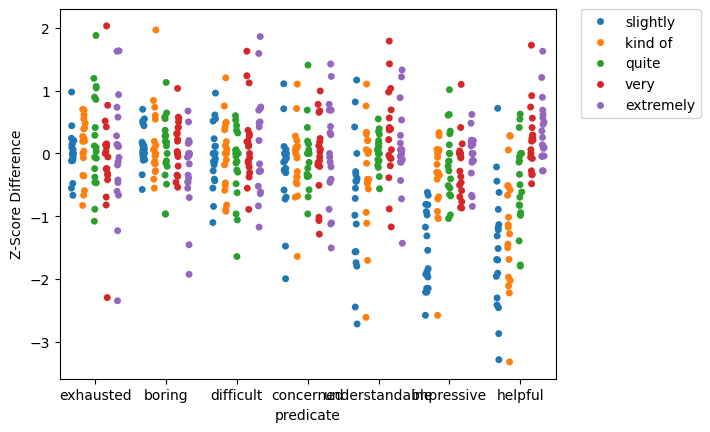

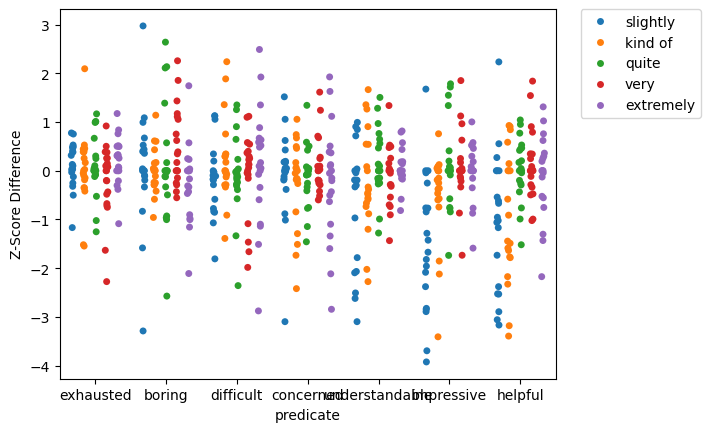

In [70]:
def get_strip_plot(UK_df,US_df,hue = "country"):
    combined_df = pd.concat([UK_df,US_df])
    df = combined_df[combined_df['has intensifier?']=="yes"]
    sns.stripplot(data=df, x="intensifier", y="Z-Score Difference", hue=hue, dodge=True, alpha=.25, zorder=1)
    # plot legend outside graph
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    sns.stripplot(data=df, x="predicate", y="Z-Score Difference", hue=hue, dodge=True, alpha=.25, zorder=1)
    # plot legend outside graph
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # make width between different hue closer
    plt.show()

    sns.stripplot(data=UK_df, x="predicate", y="Z-Score Difference", hue="intensifier",dodge=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    sns.stripplot(data=US_df, x="predicate", y="Z-Score Difference", hue="intensifier",dodge=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
# get_strip_plot(UK_narrator_df,US_narrator_df)
# get_strip_plot(UK_df,US_df)
get_strip_plot(UK_direct_df,US_direct_df)

#### Violin plots

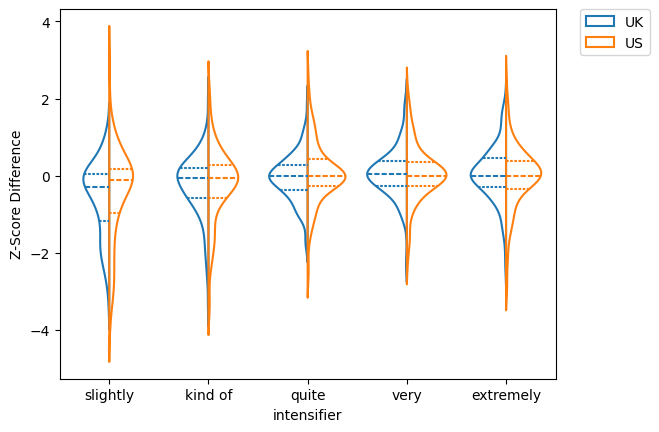

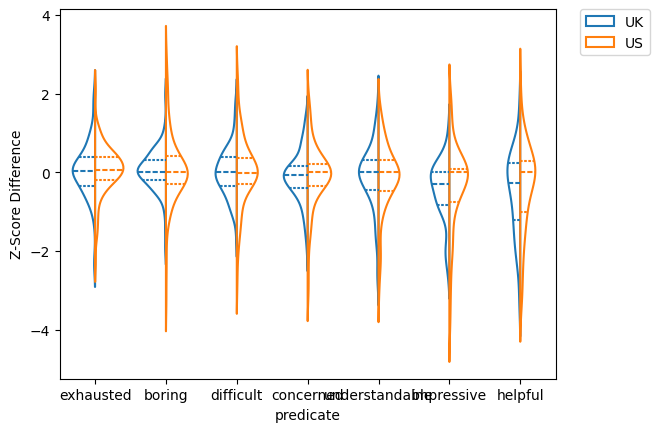

In [71]:
get_violin_plot(UK_direct_df,US_direct_df)

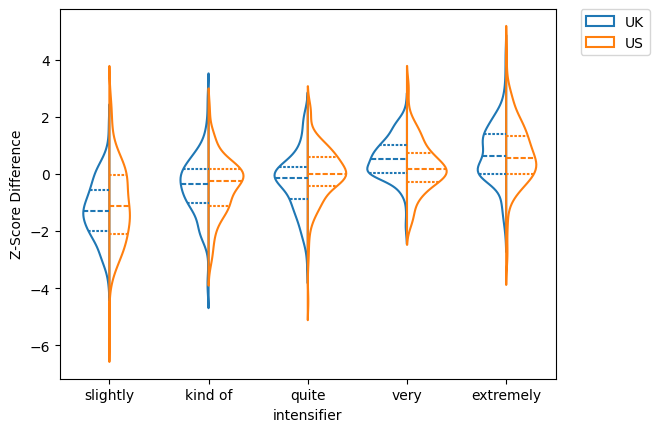

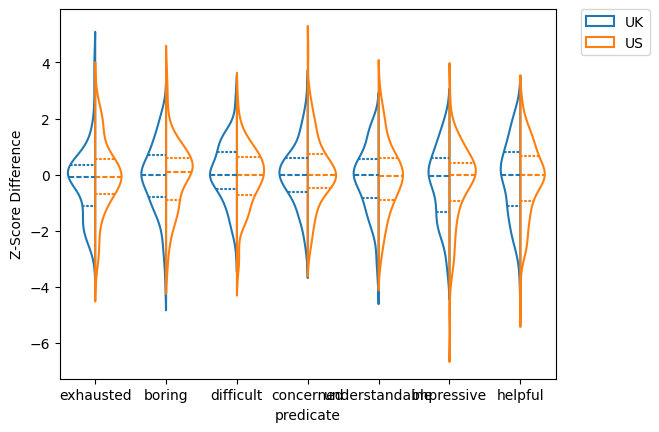

data for narrator version
dialogue vs narrator


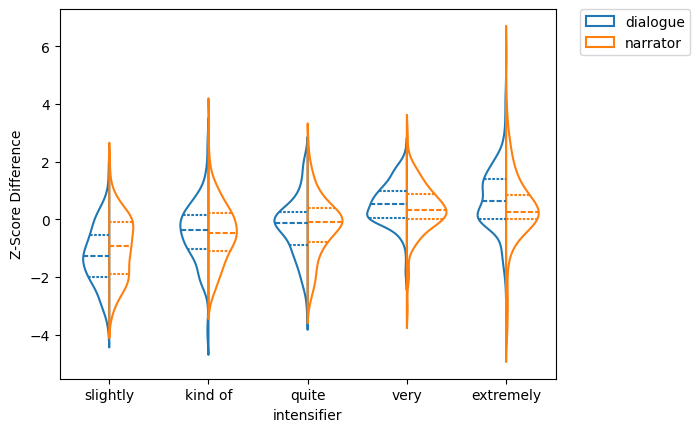

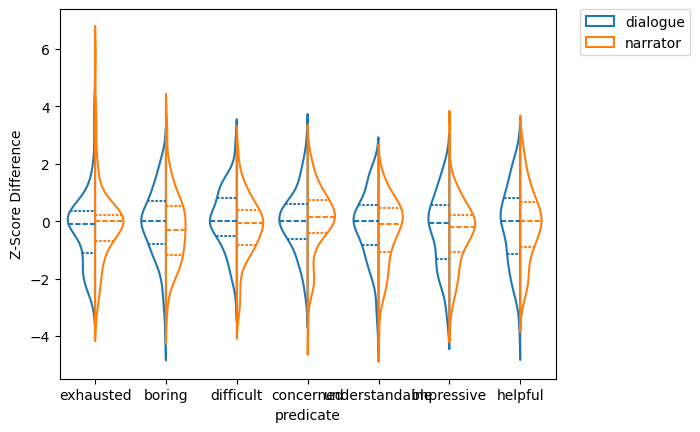

In [ ]:
def get_violin_plot(UK_df,US_df,hue = "country"):
    combined_df = pd.concat([UK_df,US_df])
    df = combined_df[combined_df['has intensifier?']=="yes"]
    sns.violinplot(data=df, x="intensifier", y="Z-Score Difference", hue=hue,
                split=True, inner="quart", fill=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    sns.violinplot(data=df, x="predicate", y="Z-Score Difference", hue=hue,
                split=True, inner="quart", fill=False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    # combined_df[(combined_df['predicate'] == "concerned") & (combined_df['intensifier'] == "very")]
    # combined_df[(combined_df['predicate'] == "impressive") & (combined_df['intensifier'] == "kind of")] # I forgot to put kind of here
    # plot stripplot with legend outside graph

get_violin_plot(UK_df,US_df)
print("data for narrator version")
print("dialogue vs narrator")
get_violin_plot(UK_df,UK_narrator_df,hue="scenario_type")

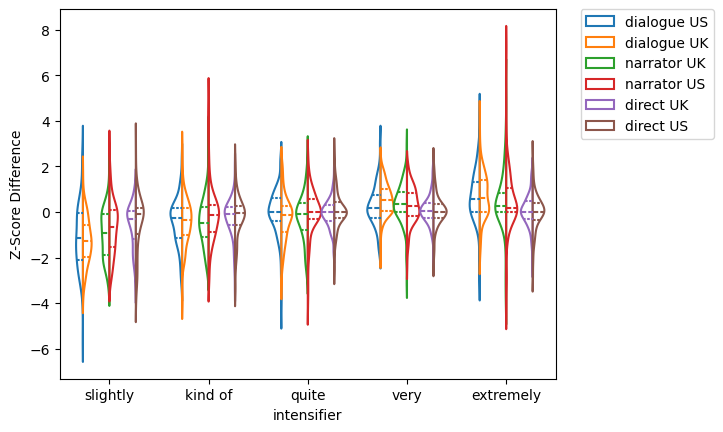

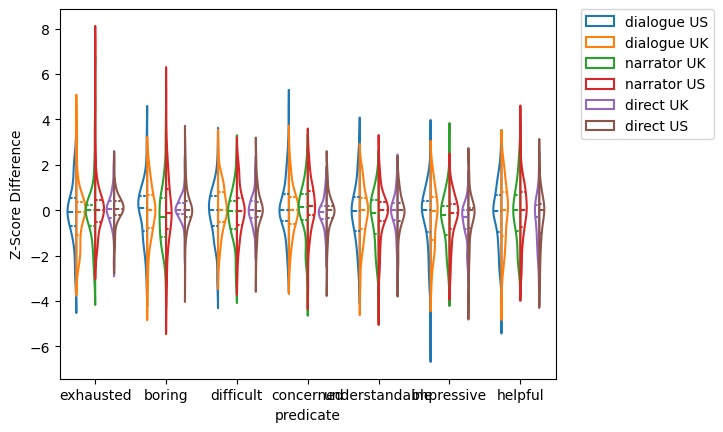

In [60]:
get_violin_plot(US_df,pd.concat([UK_df,UK_narrator_df,US_narrator_df,UK_direct_df,US_direct_df]),hue="scenario_country")

### Ridge Plots: How do distributions between US and UK differ for each pred - intensifier pair?

C:\Users\myuhk\AppData\Local\Temp\ipykernel_25252\1361903812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intensifier + predicate'] = df['intensifier'] + " " + df['predicate']


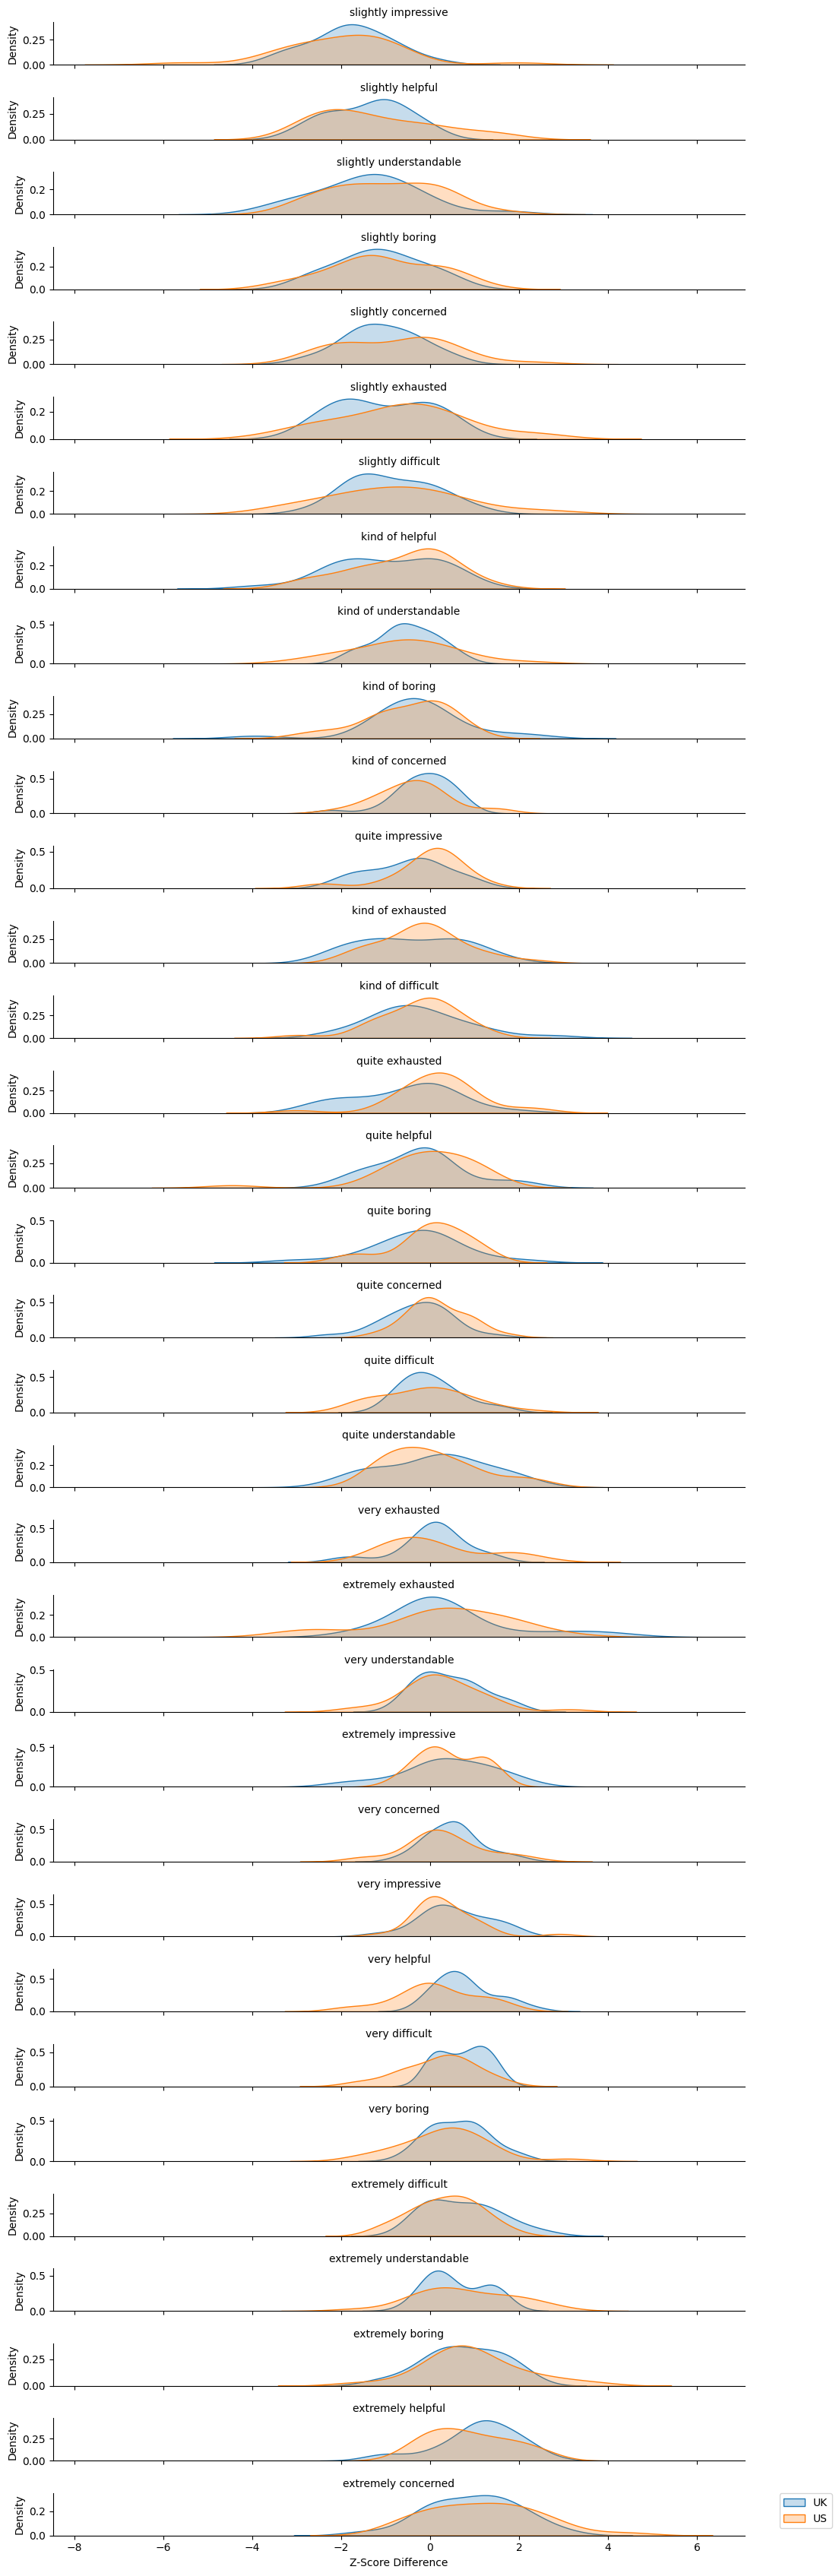

C:\Users\myuhk\AppData\Local\Temp\ipykernel_25252\1361903812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intensifier + predicate'] = df['intensifier'] + " " + df['predicate']


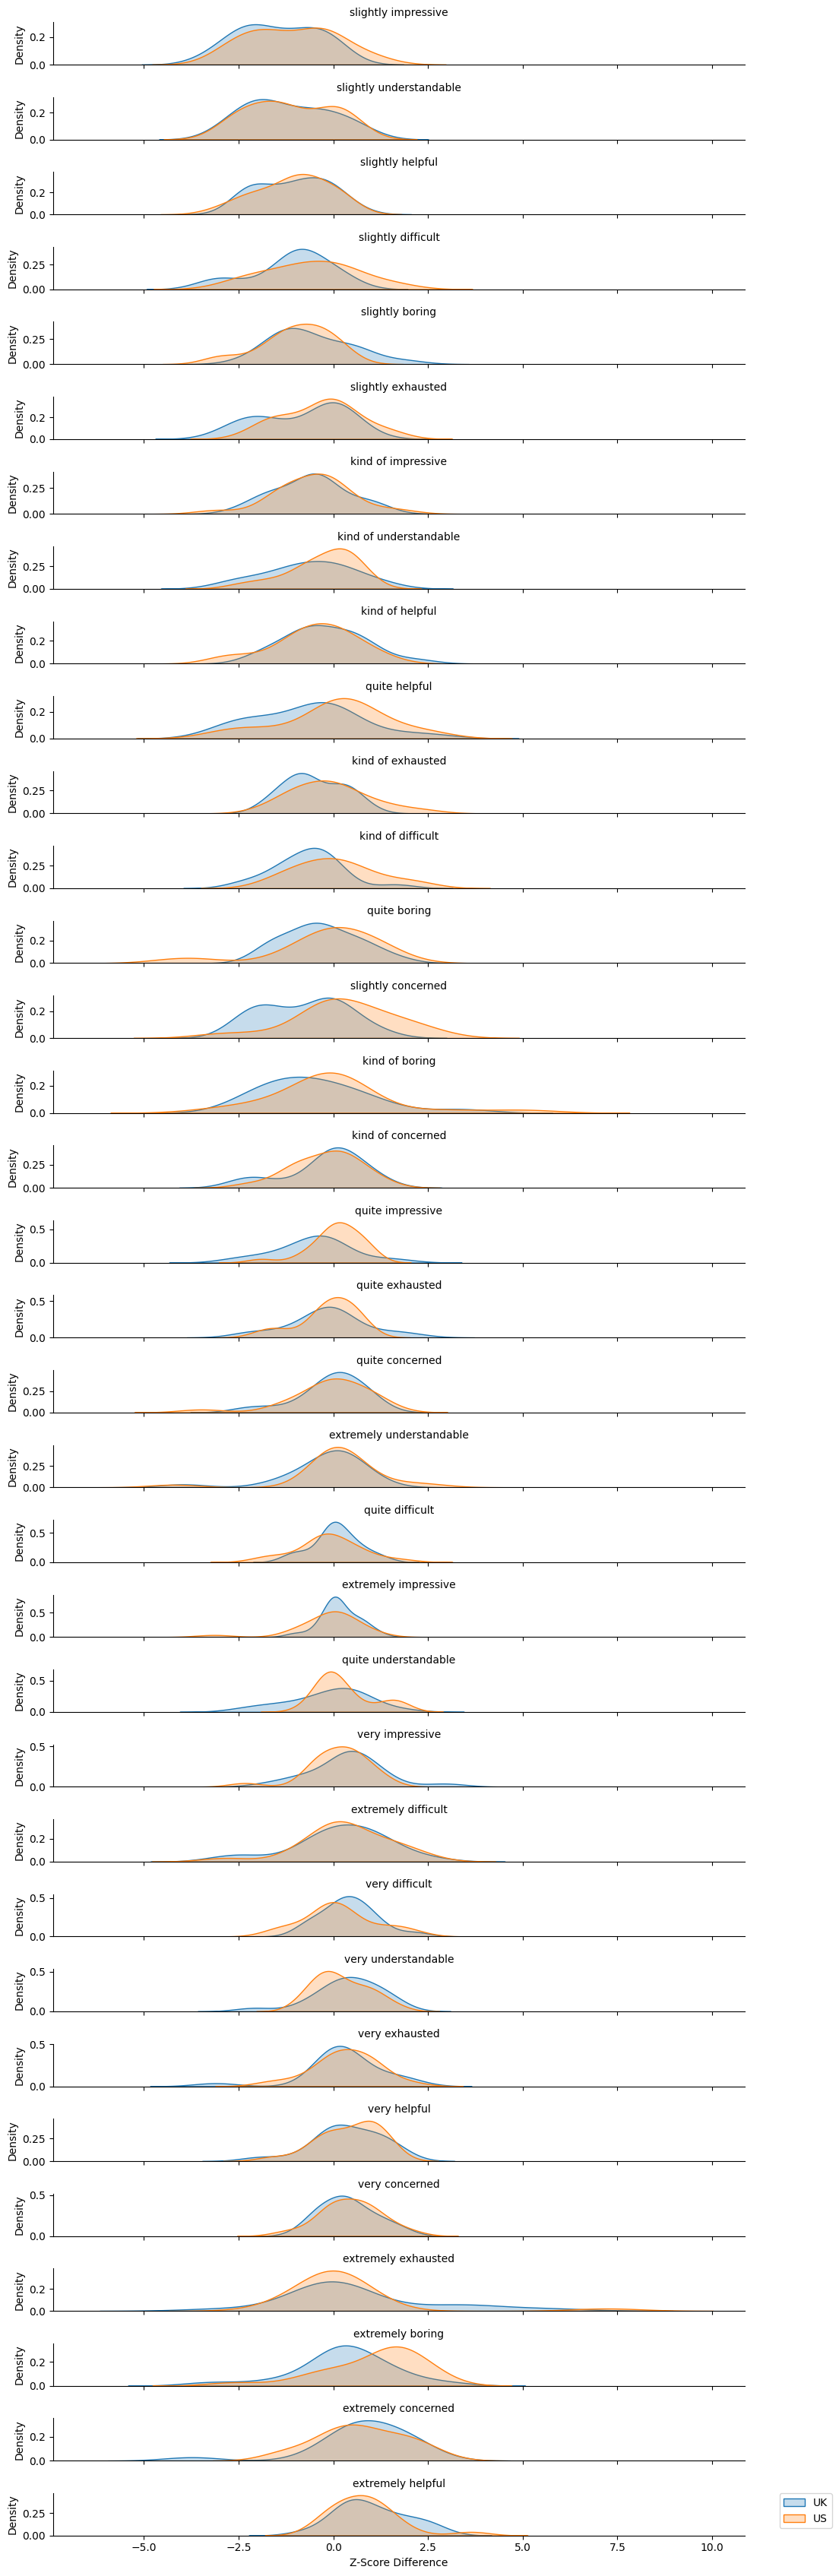

In [67]:
def ridge_plot(combined_df,hue="country",x_axis="Z-Score Difference"):
    df = combined_df[combined_df['has intensifier?']=="yes"]
    df['intensifier + predicate'] = df['intensifier'] + " " + df['predicate']

    # order the rows by the mean of the Z-Score Difference
    mean_diff = df.groupby('intensifier + predicate')[x_axis].mean().sort_values()
    df = df.set_index('intensifier + predicate').loc[mean_diff.index].reset_index()

    g = sns.FacetGrid(df, row="intensifier + predicate", sharex=True, sharey=False, height=1, aspect=10,hue=hue)
    # Map a ridgeplot onto each facet 
    g.map(sns.kdeplot, x_axis, fill=True)

    # Adjust the layout
    g.set_titles("{row_name}") # Optionally customize the title for each facet
    g.set_axis_labels(x_axis) # Customize the axis labels

    # Show plot
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
ridge_plot(pd.concat([UK_df,US_df]))
ridge_plot(pd.concat([UK_narrator_df,US_narrator_df]))


C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\1910062542.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intensifier + predicate'] = df['intensifier'] + " " + df['predicate']


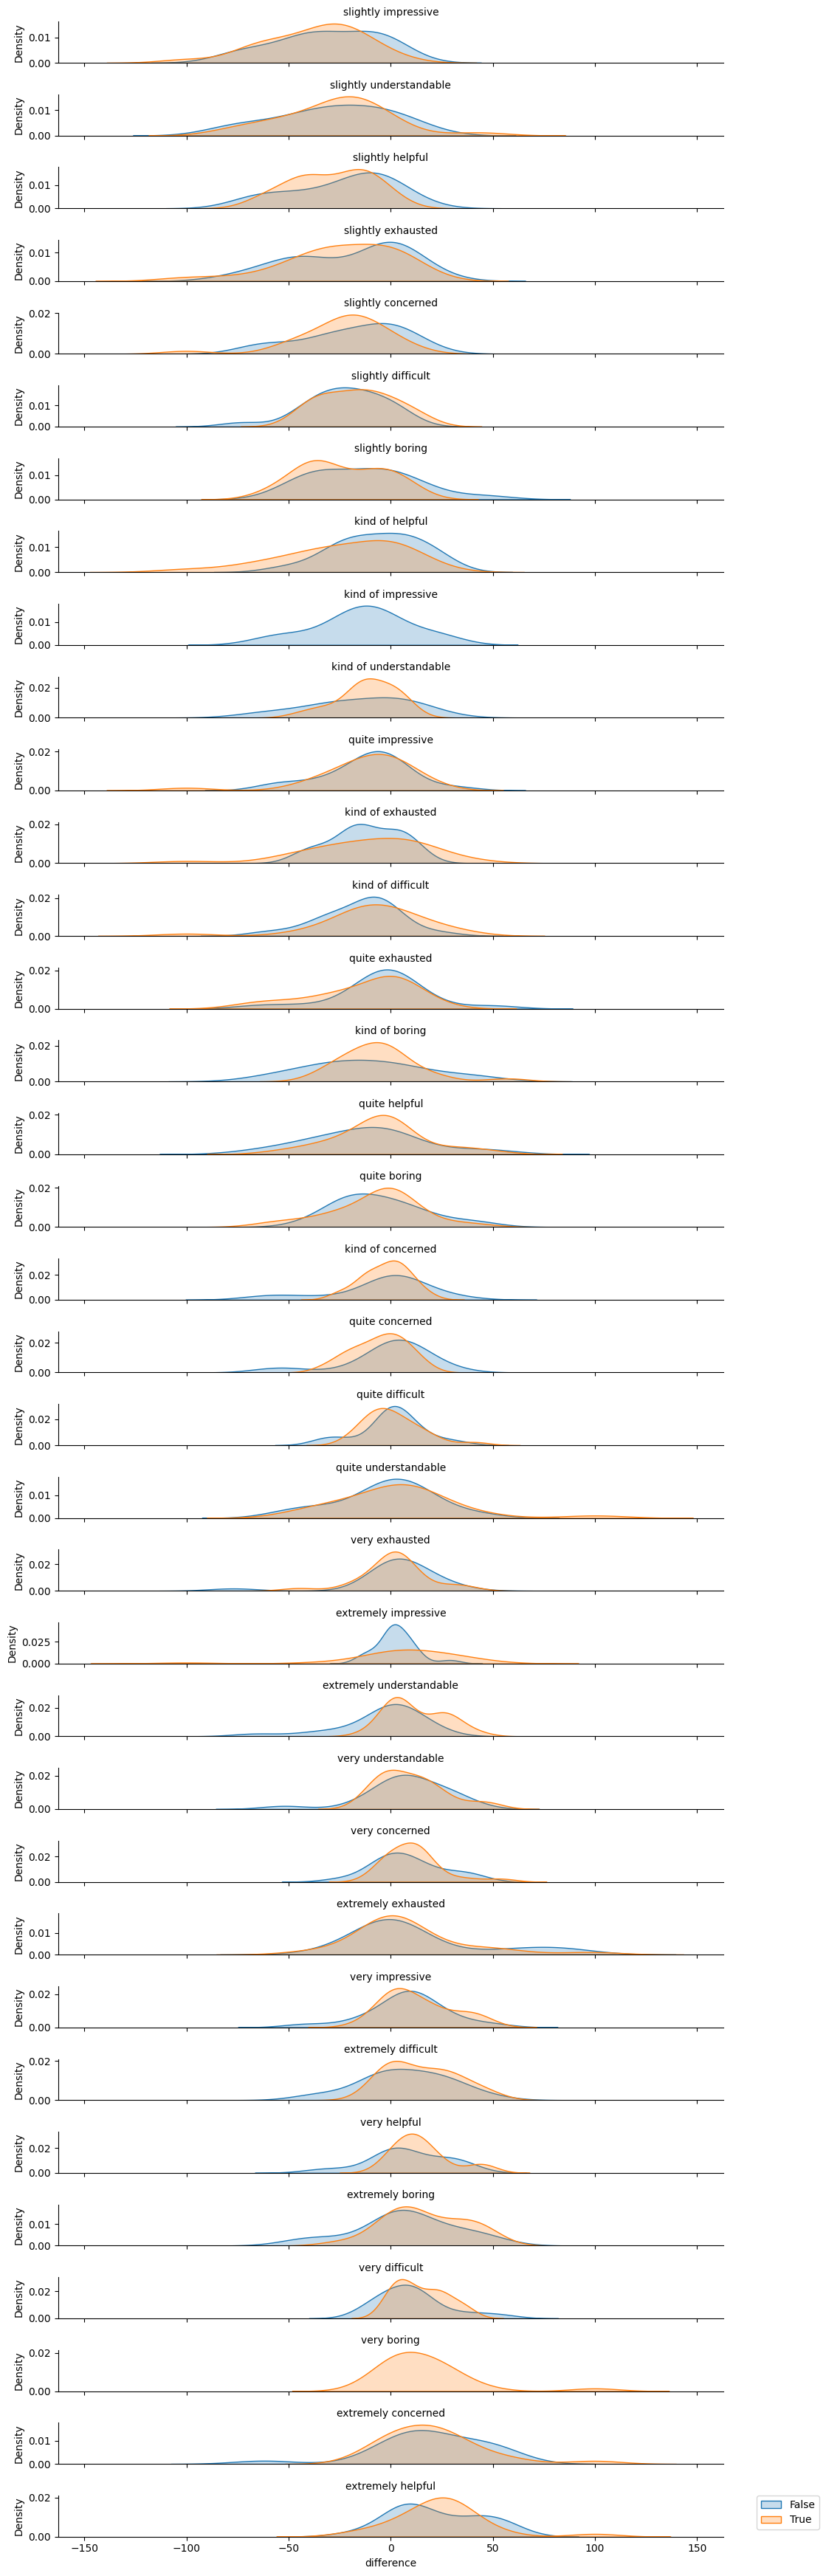

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\1910062542.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intensifier + predicate'] = df['intensifier'] + " " + df['predicate']


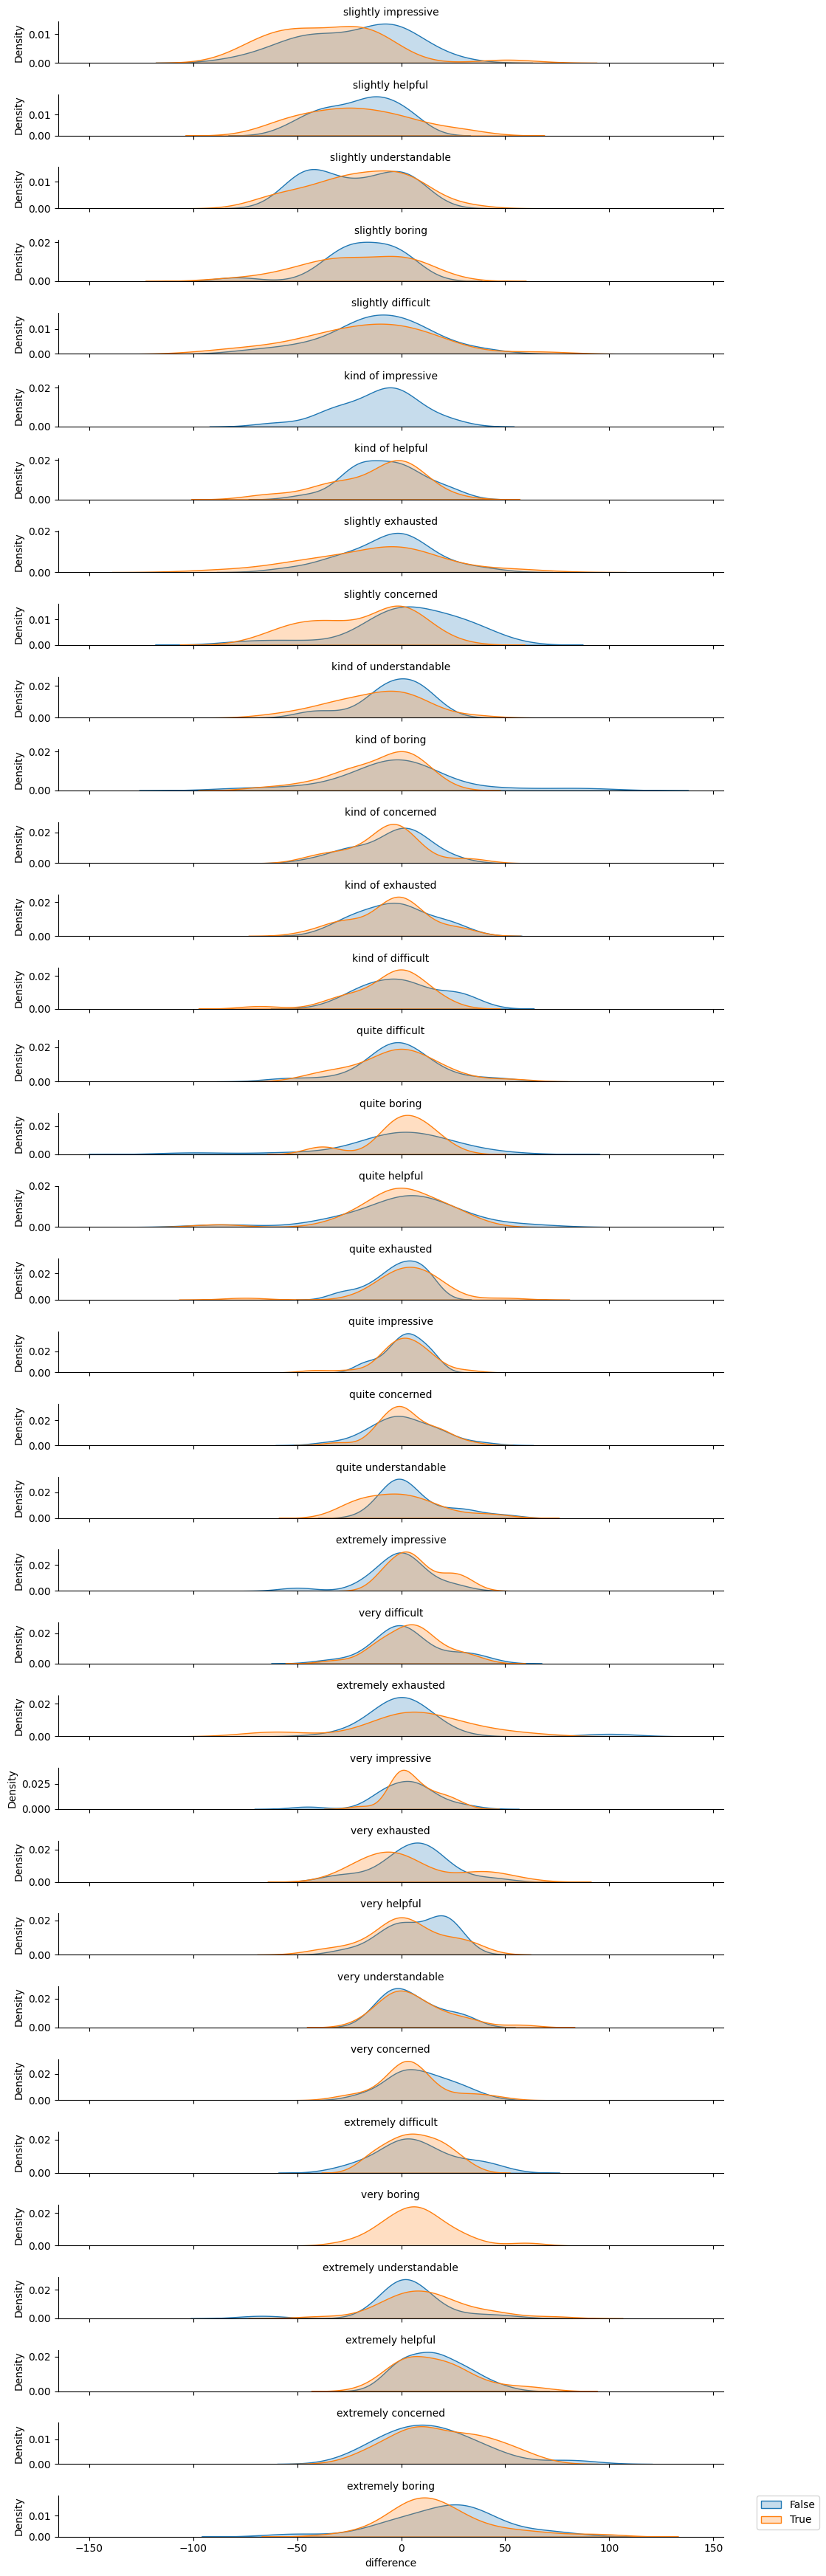

In [ ]:
ridge_plot(pd.concat([UK_df,UK_narrator_df]),x_axis="difference",hue="scenario_type")
ridge_plot(pd.concat([US_df,US_narrator_df]),x_axis="difference",hue="scenario_type")

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\1021909827.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intensifier + predicate'] = df['intensifier'] + " " + df['predicate']


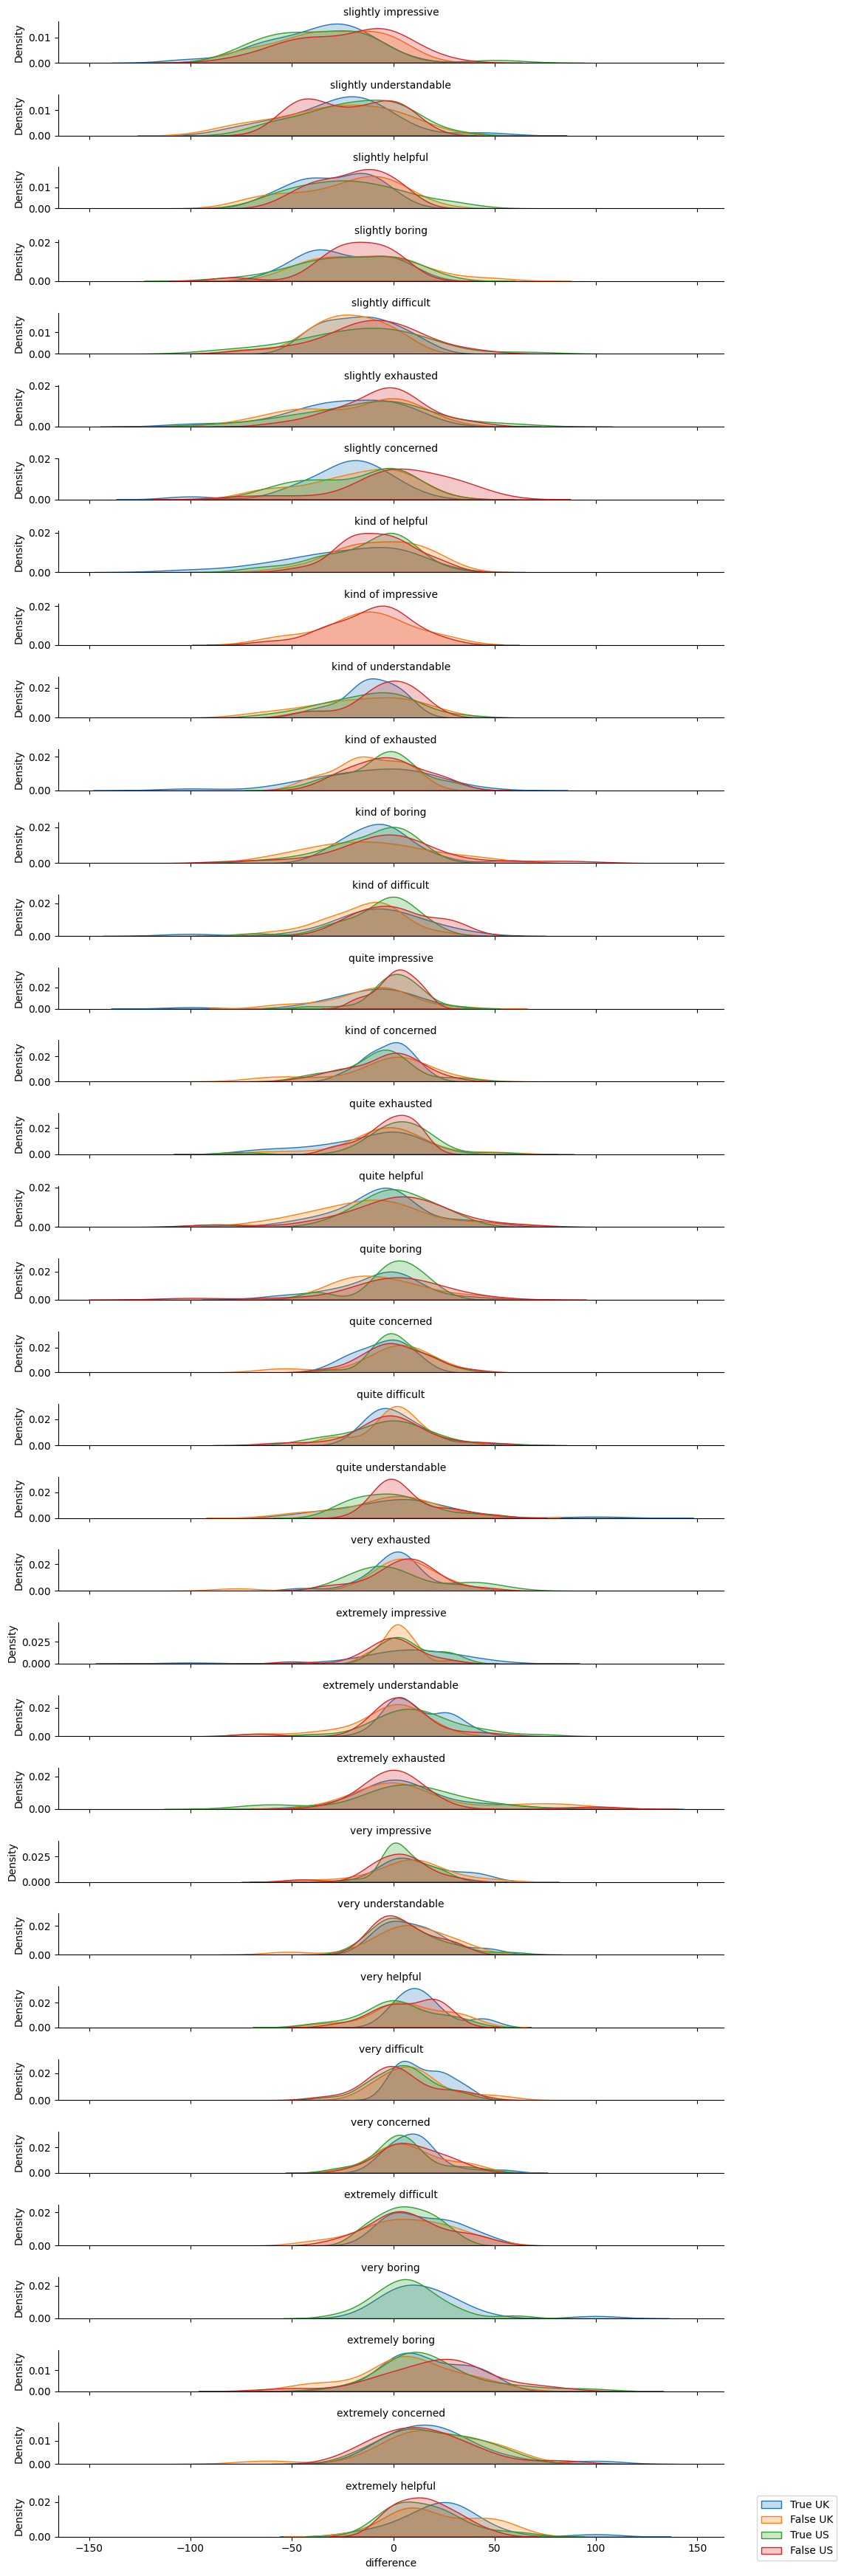

In [ ]:
ridge_plot(pd.concat([UK_df,UK_narrator_df,US_df,US_narrator_df]),hue="is_dialogue_country",x_axis="difference")

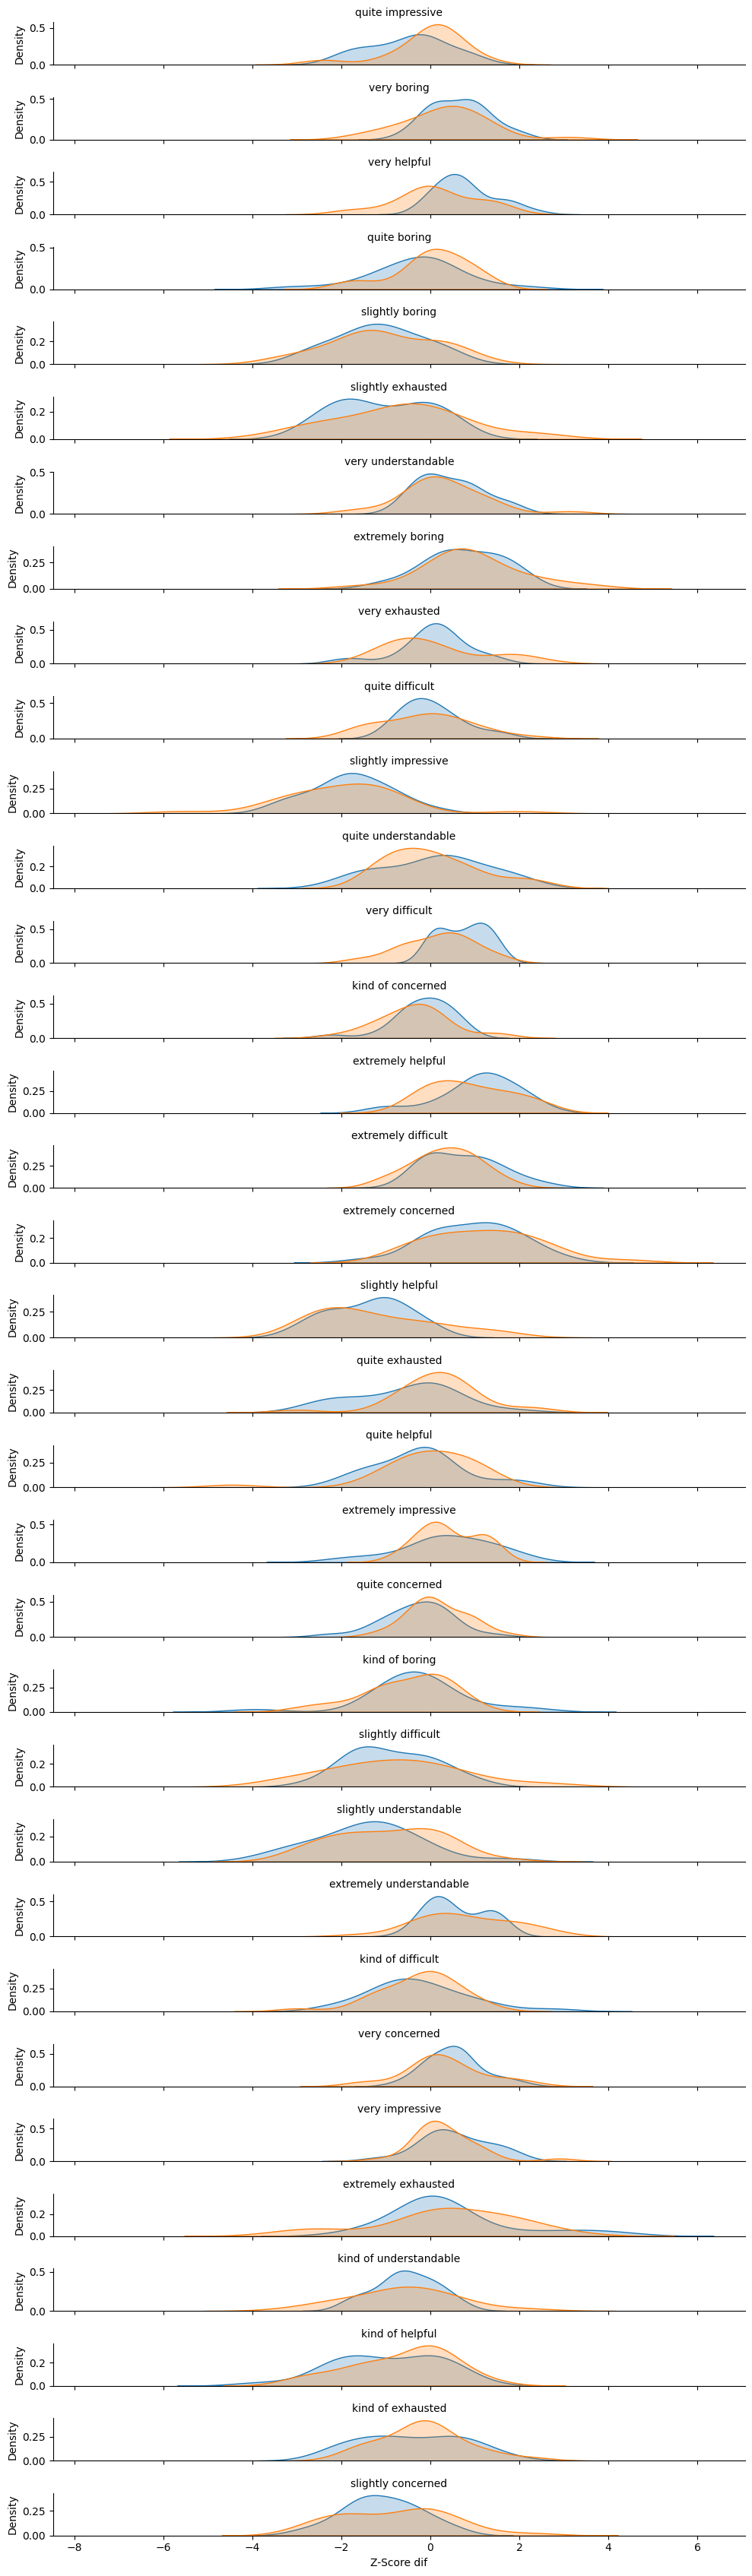

intensifier + predicate
quite impressive           -0.054835
very boring                -0.032514
very helpful               -0.019469
quite boring               -0.019076
slightly boring            -0.012816
slightly exhausted         -0.012586
very understandable        -0.010586
extremely boring           -0.009046
very exhausted             -0.008701
quite difficult            -0.006490
slightly impressive        -0.005474
quite understandable       -0.004326
very difficult             -0.003563
kind of concerned          -0.002569
extremely helpful          -0.001704
extremely difficult         0.003403
extremely concerned         0.011112
slightly helpful            0.012913
quite exhausted             0.013372
quite helpful               0.014520
extremely impressive        0.019971
quite concerned             0.021861
kind of boring              0.025106
slightly difficult          0.025958
slightly understandable     0.027548
extremely understandable    0.030580
kind of diffic

In [6]:
# order the rows by difference in Z-score difference between UK and US
df['Z-Score Difference Difference'] = df.groupby('intensifier + predicate')['Z-Score Difference'].transform(lambda x: x.diff())
mean_diff = df.groupby('intensifier + predicate')['Z-Score Difference Difference'].mean().sort_values()
df = df.set_index('intensifier + predicate').loc[mean_diff.index].reset_index()

g = sns.FacetGrid(df, row="intensifier + predicate", sharex=True, sharey=False, height=1, aspect=10,hue="country")
# Map a ridgeplot onto each facet 
g.map(sns.kdeplot, "Z-Score Difference", fill=True)

# Adjust the layout
g.set_titles("{row_name}") # Optionally customize the title for each facet
g.set_axis_labels("Z-Score dif") # Customize the axis labels

# Show plot
plt.tight_layout()
# plt.title("Sorted by difference in Z-Score Difference between UK and US")
plt.show()
print(mean_diff)

### Miscellenous graphs

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

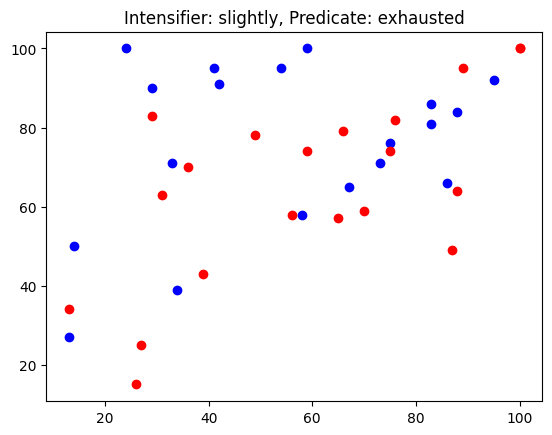

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

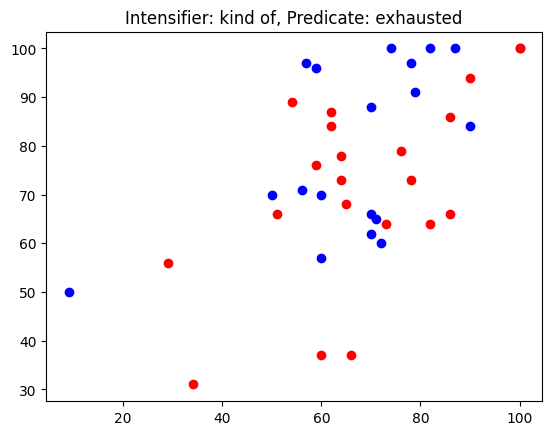

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

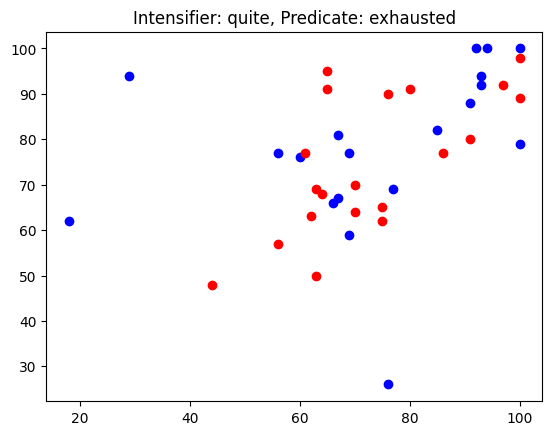

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

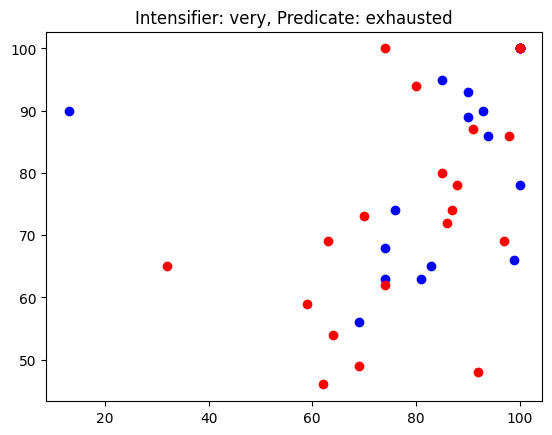

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

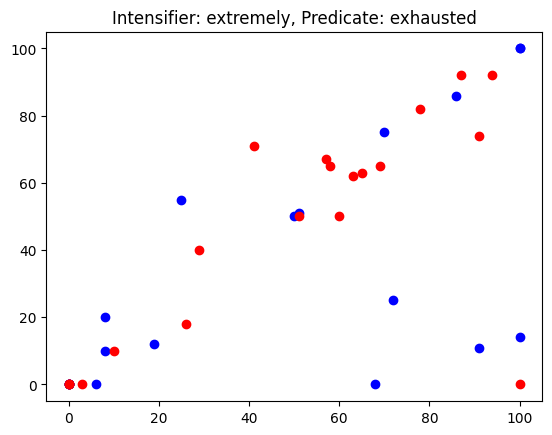

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

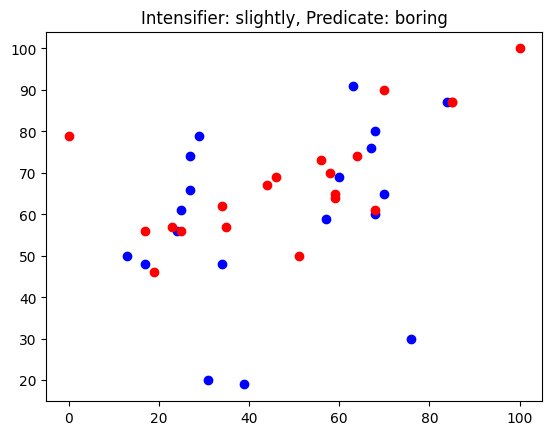

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

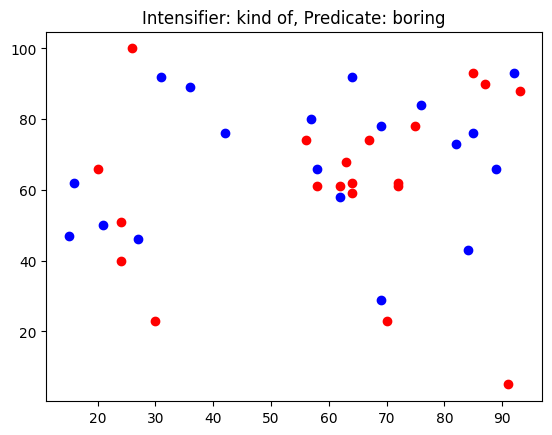

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

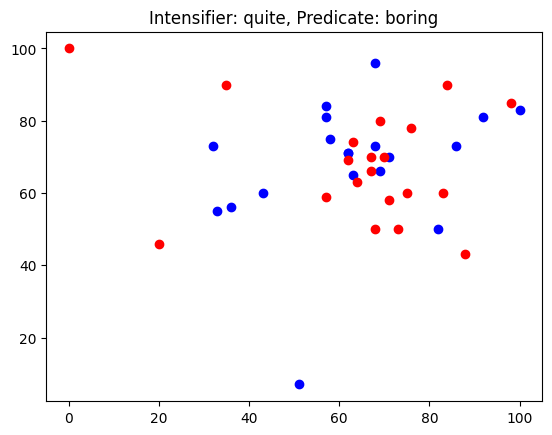

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

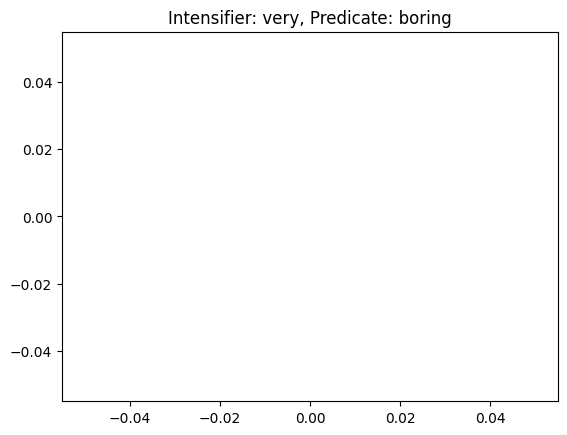

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

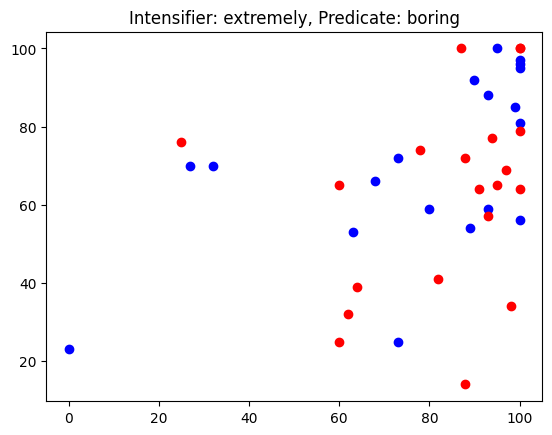

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

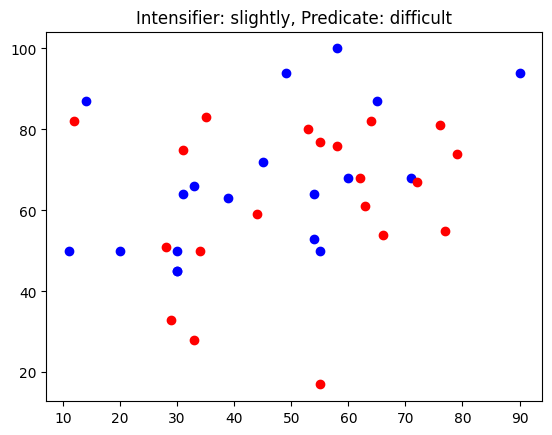

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

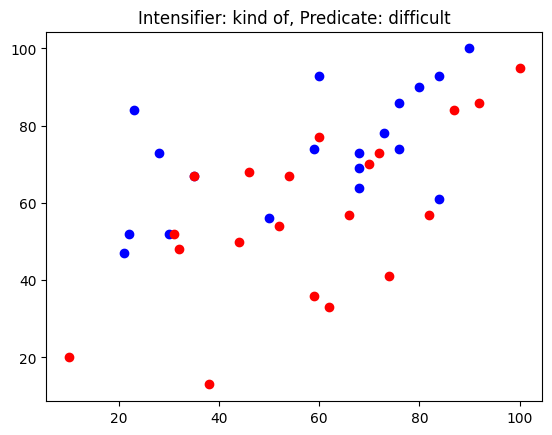

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

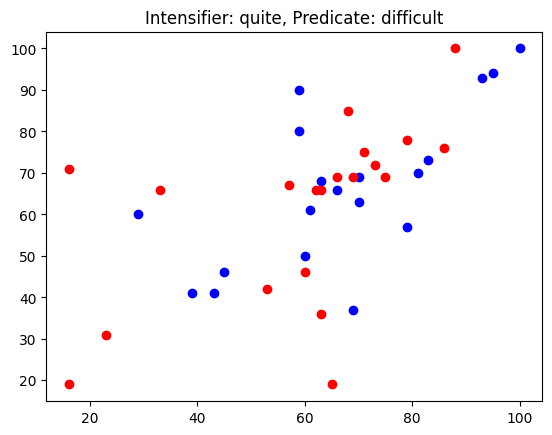

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

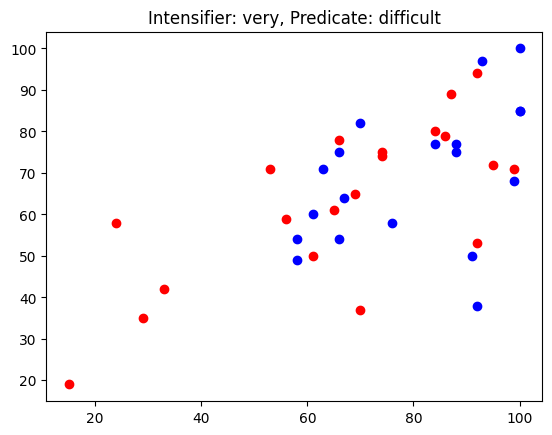

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

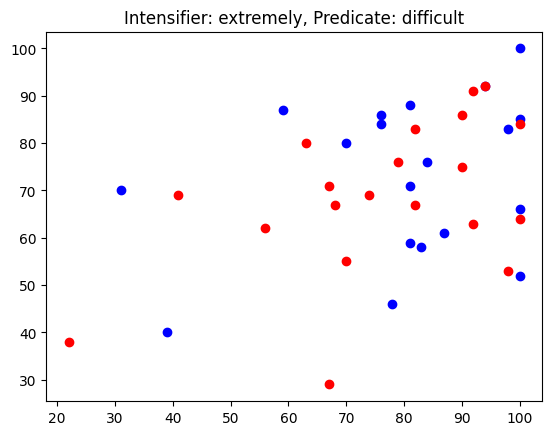

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

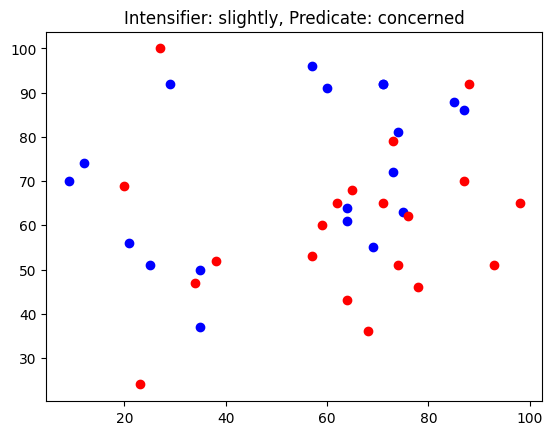

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

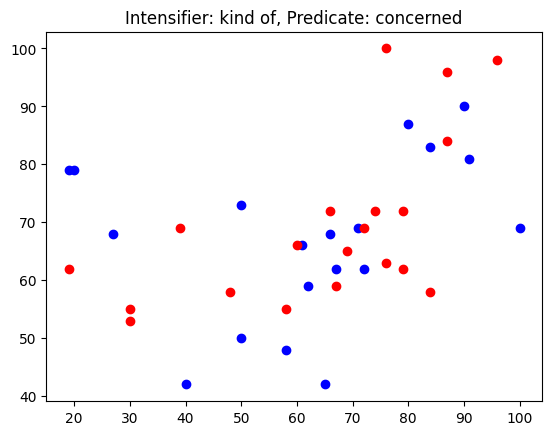

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

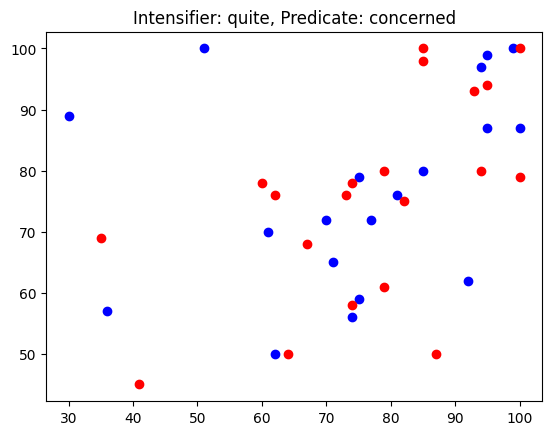

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

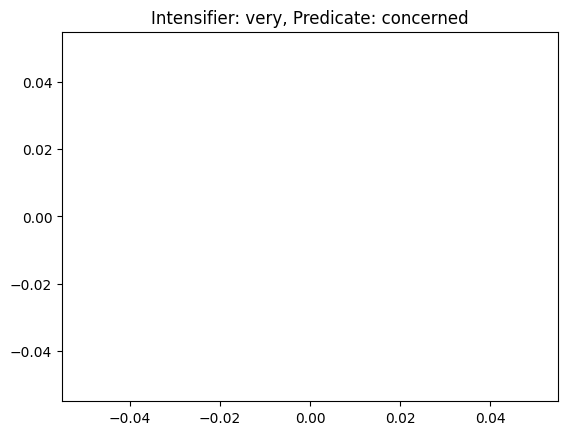

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

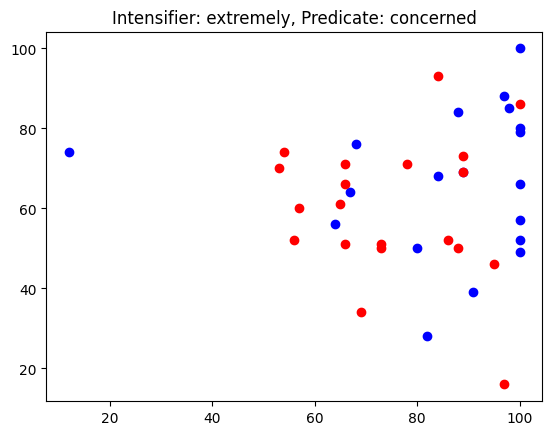

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

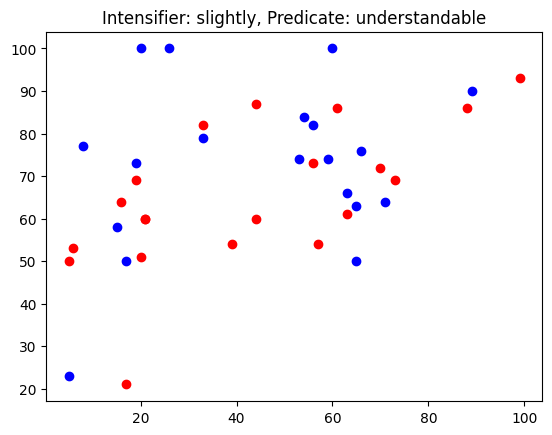

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

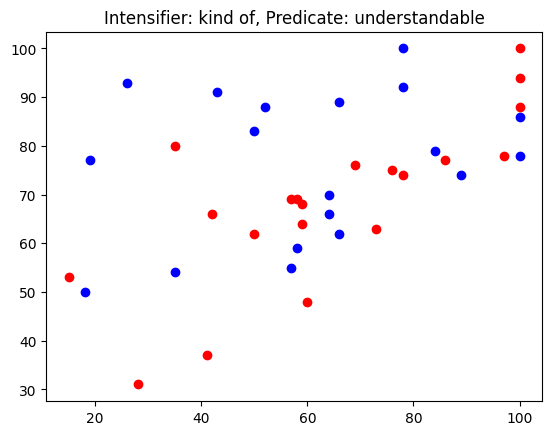

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

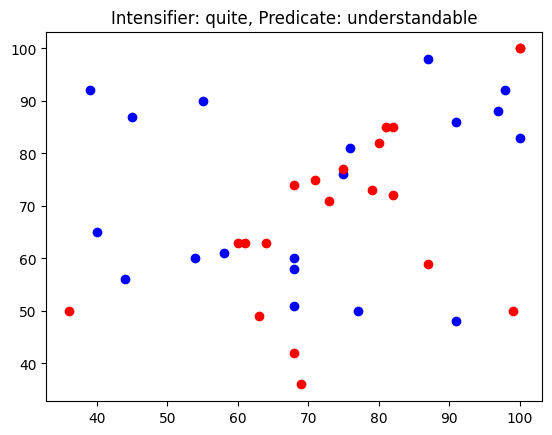

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

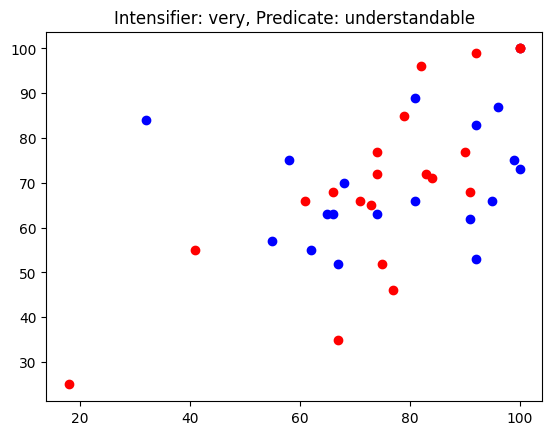

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

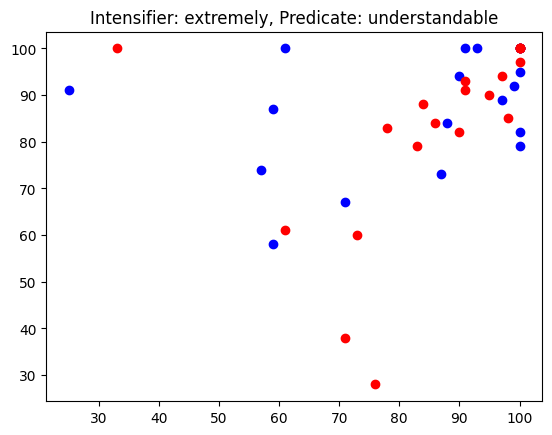

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\App

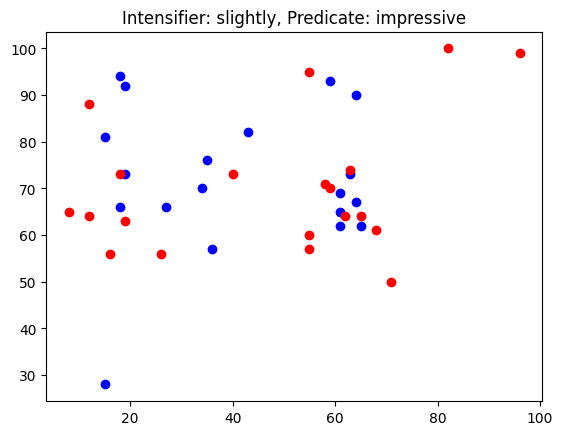

C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
C:\Users\myuhk\AppData\Local\Temp\ipykernel_51664\3513330567.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")


ValueError: x and y must be the same size

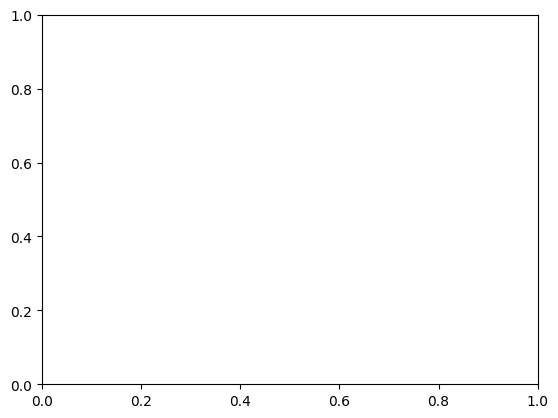

In [87]:
import matplotlib.pyplot as plt
# for pred in predicates:
#     for inten in intensifiers:
#         # make a new graph for each predicate and intensifier
#         plt.figure()
#         plt.scatter(x=UK_df[(UK_df['predicate'] == pred) & (UK_df['intensifier'] == inten)][UK_df["has intensifier?"]=="yes"]["response"], y=UK_df[(UK_df['predicate'] == pred) & (UK_df['intensifier'] == inten)][UK_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
#         plt.scatter(x=US_df[(US_df['predicate'] == pred) & (US_df['intensifier'] == inten)][US_df["has intensifier?"]=="yes"]["response"], y=US_df[(US_df['predicate'] == pred) & (US_df['intensifier'] == inten)][US_df["has intensifier?"]=="no"]["response"],color="red",label="US")
#         plt.title(f"Intensifier: {inten}, Predicate: {pred}")
#         # print plot
#         plt.show()
        # # plot graph
# do the same for UK_narrator_df and US_narrator_df
for pred in predicates:
    for inten in intensifiers:
        # make a new graph for each predicate and intensifier
        plt.figure()
        plt.scatter(x=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="yes"]["response"], y=UK_narrator_df[(UK_narrator_df['predicate'] == pred) & (UK_narrator_df['intensifier'] == inten)][UK_narrator_df["has intensifier?"]=="no"]["response"],color="blue",label="UK")
        plt.scatter(x=US_narrator_df[(US_narrator_df['predicate'] == pred) & (US_narrator_df['intensifier'] == inten)][US_narrator_df["has intensifier?"]=="yes"]["response"], y=US_narrator_df[(US_narrator_df['predicate'] == pred) & (US_narrator_df['intensifier'] == inten)][US_narrator_df["has intensifier?"]=="no"]["response"],color="red",label="US")
        plt.title(f"Intensifier: {inten}, Predicate: {pred}")
        # print plot
        plt.show()

    


Reformatting CSV data

In [3]:
# read pilot1_UK_data\subject_5ea343dd9b066613c3804f6e.json
import json
import os

predicates = [""]
# # read pilot1_UK_data\subject_5ea343dd9b066613c3804f6e.json
# with open('pilot1_UK_data\subject_5ea343dd9b066613c3804f6e.json') as f:
#     data = json.load(f)
# print(data)

# read all json files in pilot1_UK_data
for file in os.listdir('pilot1_UK_data'):
    if file.endswith('.json'):

        with open('pilot1_UK_data\\' + file) as f:
            data = json.load(f)
            # print(data[-1])
            # print(file)
            # print(len(data))
        print(file)
print(scenarios)



subject_59e3af7aae9f950001d83ff8.json
subject_59e7eb5d62637600014a7db2.json
subject_5ea343dd9b066613c3804f6e.json
subject_5ea45bd39325e1407911cd3d.json
subject_60a21528ac7f8739abc0dca0.json
subject_60bf6b630a701464d43e6d3d.json
subject_614ae8dbcd4d31f05be56645.json
subject_63d414c282f56cf32de6588d.json
subject_66644f7feb0727f0260cb37e.json
subject_dv47n8d02m.json
['', 'Chris\'s friend Emma asks Chris if he wants to join her on a weekend trip.<br>Emma: "We\'re planning a spontaneous road trip this weekend. Want to join?"<br>Chris: "That sounds awesome, but I\'m a bit exhausted from traveling all week. I think I need some downtime instead."', 'Chris\'s friend Emma asks Chris if he wants to join her on a weekend trip.<br>Emma: "We\'re planning a spontaneous road trip this weekend. Want to join?"<br>Chris: "That sounds awesome, but I\'m  exhausted from traveling all week. I think I need some downtime instead."', 'Sarah is interning at a company, and her boss, Mr. Thompson asks her if she c

In [4]:
# open C:\Users\myuhk\OneDrive\ドキュメント\MIT\Fall2024\jspsych_tutorial_960\data2.js, and get the data variable
import json
UK_data_array = []
# load scenarios.json using json.load
scenarios = ['']
inten_pred = ['']
with open('scenarios.json') as f:
    scenario_data  = json.load(f)
    for scenario in scenario_data :
        scenarios.append(scenario['scenario context'])
        inten_pred.append(scenario['intensifier']+"+"+scenario['predicate'])
        inten_pred.append(scenario['predicate'])
        scenarios.append(scenario['scenario context'].replace(scenario['intensifier'], ''))
    UK_data_array.append(scenarios)
    UK_data_array.append(inten_pred)
scenarios.append("average reaction time")
inten_pred.append("average reaction time")
UK_pandas_data = [] # person_id, country, intensifier, predicate, response w/ intensifier, response w/o intensifier, difference
for file in os.listdir('pilot1_UK_data'):
    if file.endswith('.json'):
        with open("pilot1_UK_data\\"+file) as g:
            responses = [file]
            reaction_time = []
            data = json.load(g)
            for scenario in scenarios[1:-1]:
                response = None
                for slide in data:
                    if slide['trial_type'] == 'html-slider-response':
                        if slide['stimulus'].find(scenario) != -1:
                            response = slide['response']
                            reaction_time.append(slide['rt'])
                            break
                responses.append(response)
            responses.append(int(sum(reaction_time)/len(reaction_time)))
            UK_data_array.append(responses)
# with open('C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\jspsych_tutorial_960\\data2.js') as f:
#     data = f.read()
#     print(data)
# save data_array as a csv
import csv
with open('dataUK.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(UK_data_array)

In [5]:
# open C:\Users\myuhk\OneDrive\ドキュメント\MIT\Fall2024\jspsych_tutorial_960\data2.js, and get the data variable
import json
US_data_array = []
# load scenarios.json using json.load
scenarios = ['']
inten_pred = ['']
with open('scenarios.json') as f:
    scenario_data  = json.load(f)
    for scenario in scenario_data :
        scenarios.append(scenario['scenario context'])
        inten_pred.append(scenario['intensifier']+"+"+scenario['predicate'])
        inten_pred.append(scenario['predicate'])
        scenarios.append(scenario['scenario context'].replace(scenario['intensifier'], ''))
    US_data_array.append(scenarios)
    US_data_array.append(inten_pred)
scenarios.append("average reaction time")
inten_pred.append("average reaction time")
for file in os.listdir('pilot1_US_data'):
    if file.endswith('.json'):
        with open("pilot1_US_data\\"+file) as g:
            responses = [file]
            reaction_time = []
            data = json.load(g)
            for scenario in scenarios[1:-1]:
                response = None
                for slide in data:
                    if slide['trial_type'] == 'html-slider-response':
                        if slide['stimulus'].find(scenario) != -1:
                            response = slide['response']
                            reaction_time.append(slide['rt'])
                            break
                responses.append(response)
            responses.append(int(sum(reaction_time)/len(reaction_time)))
            US_data_array.append(responses)
print(type(US_data_array[1][1]))

# with open('C:\\Users\\myuhk\\OneDrive\\ドキュメント\\MIT\\Fall2024\\jspsych_tutorial_960\\data2.js') as f:
#     data = f.read()
#     print(data)
# save data_array as a csv
import csv
with open('dataUS.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(US_data_array)

<class 'str'>


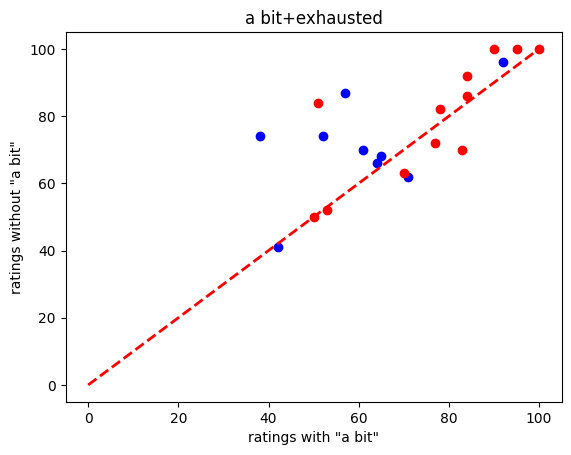

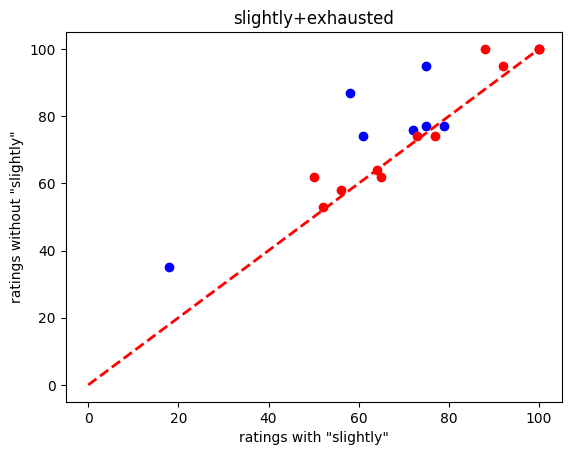

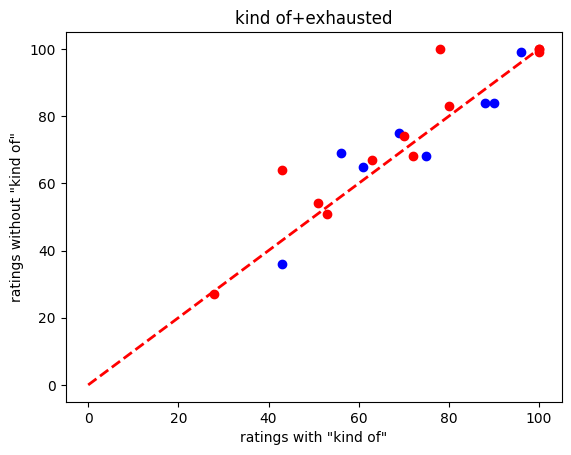

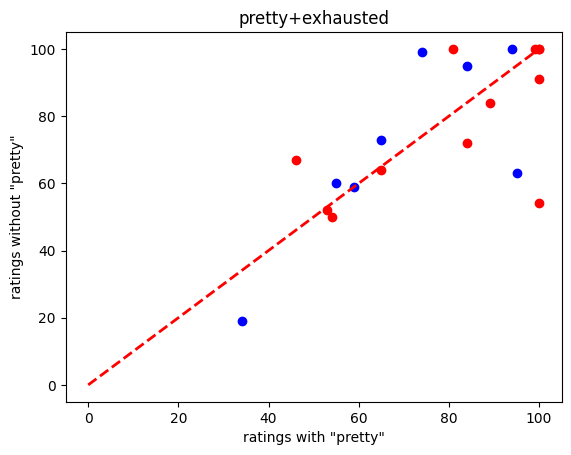

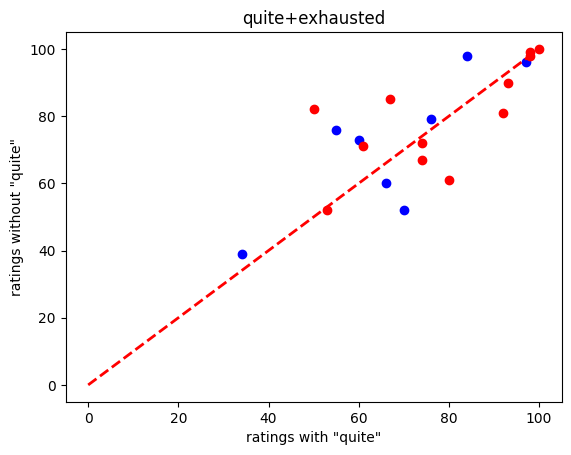

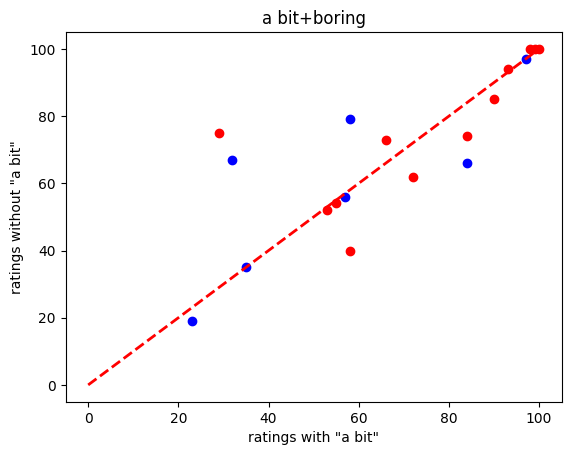

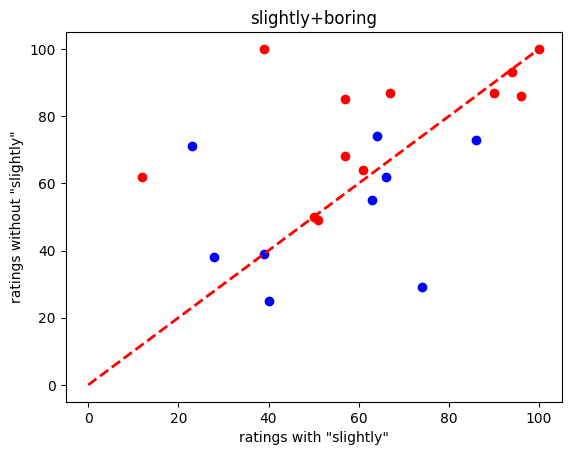

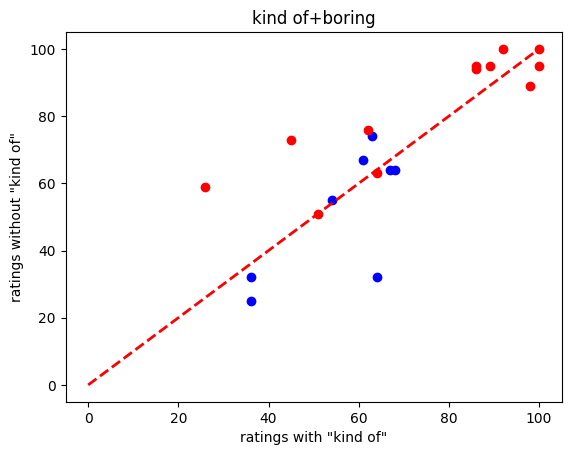

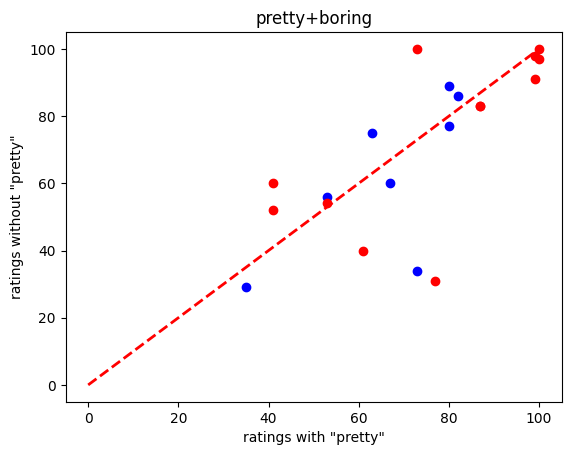

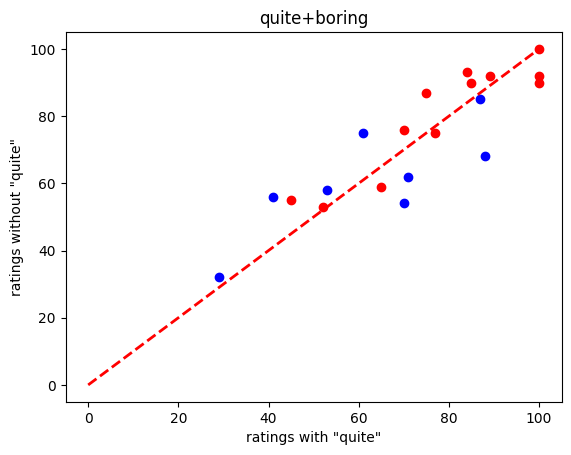

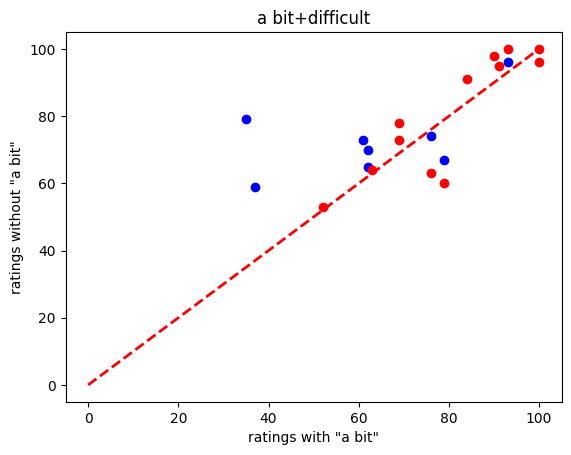

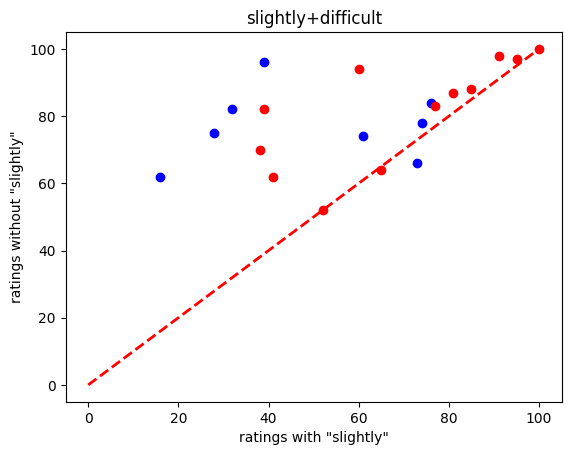

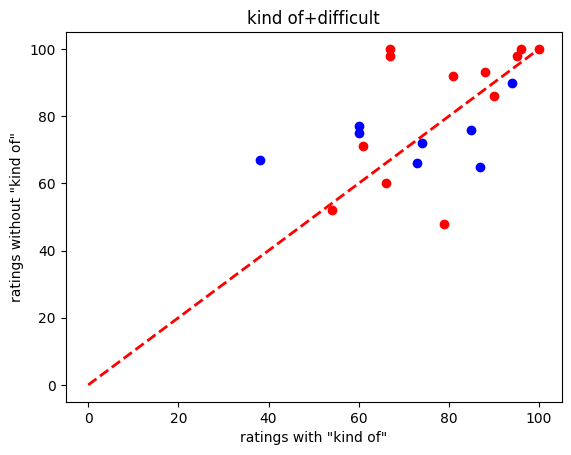

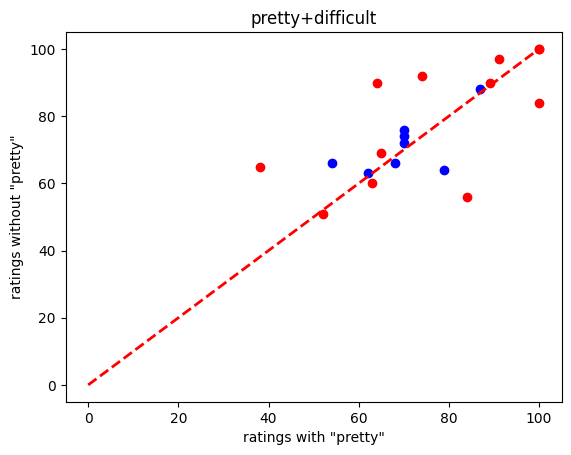

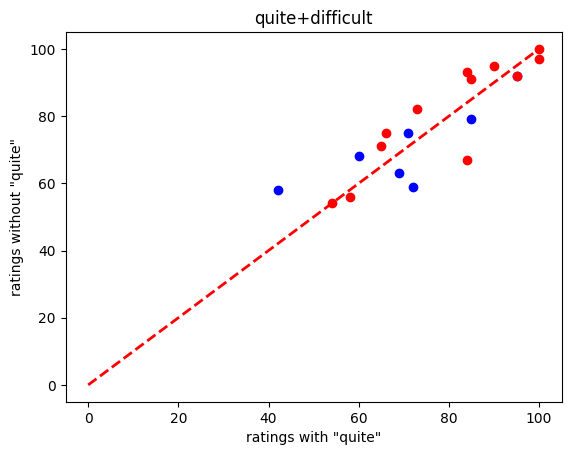

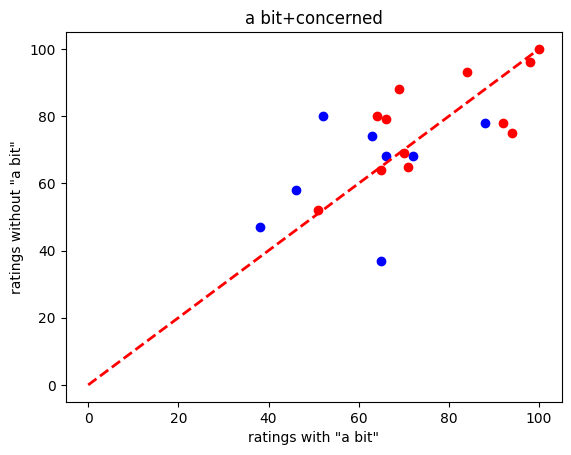

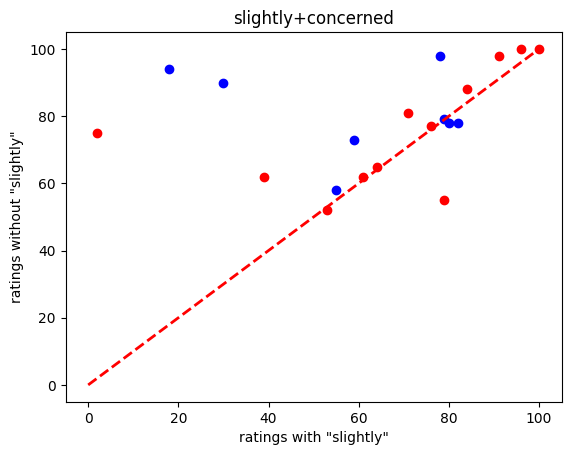

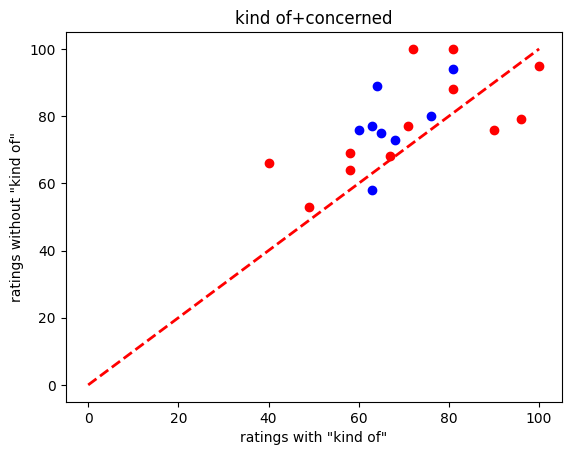

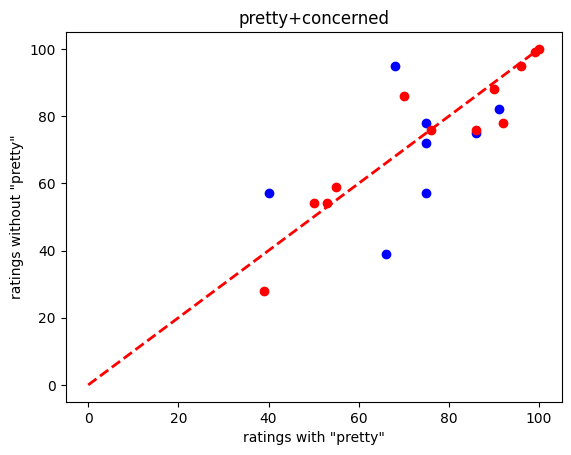

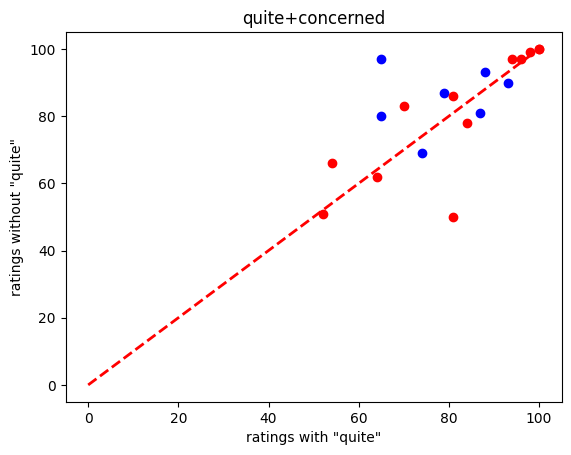

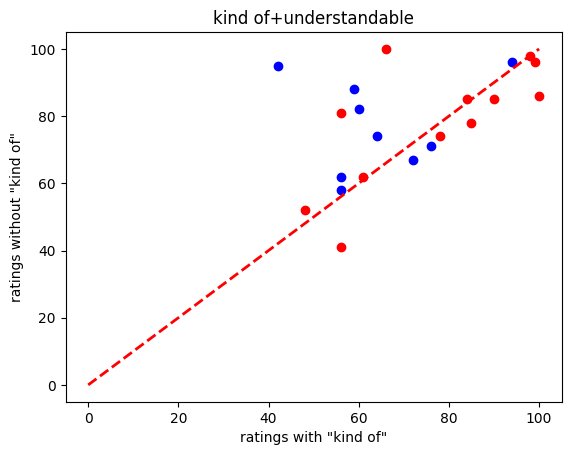

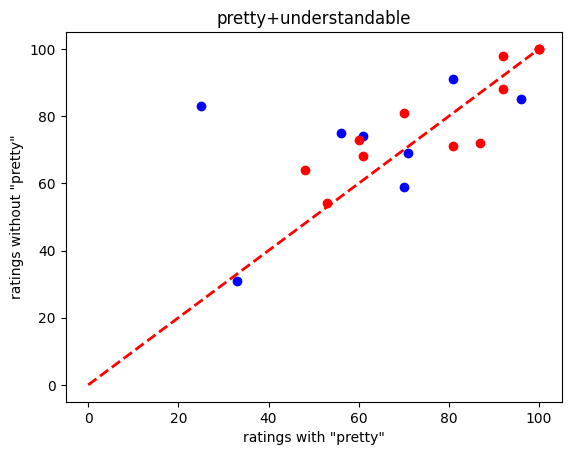

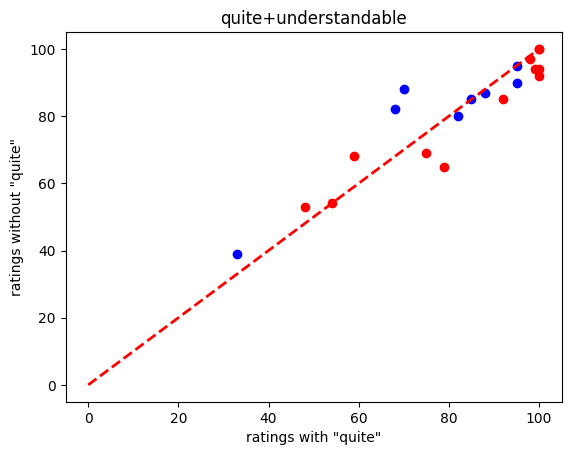

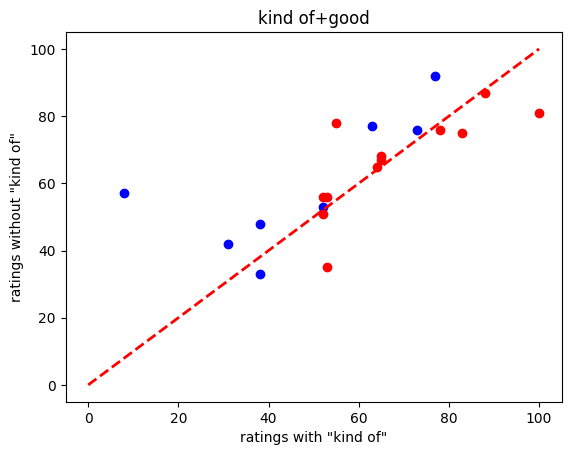

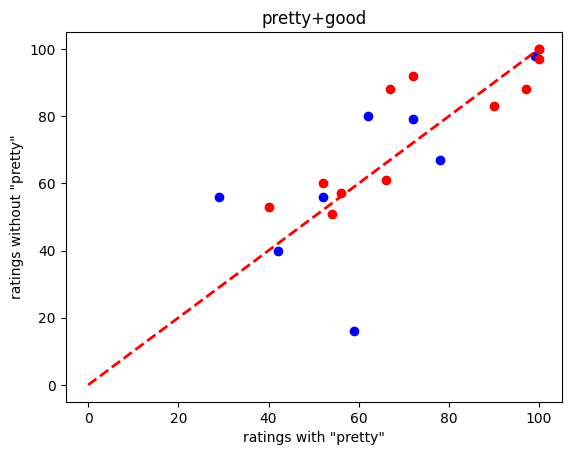

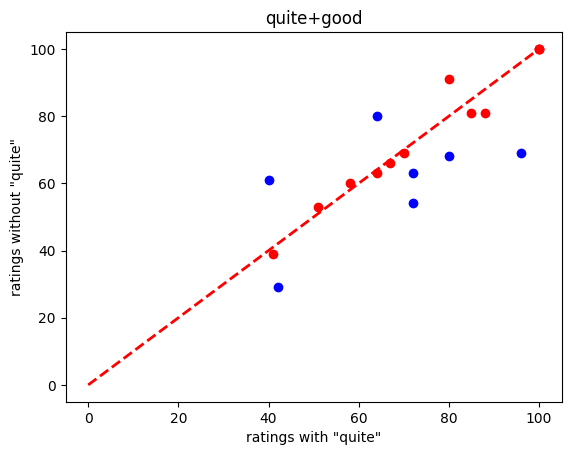

In [6]:
# plot graphs for each pair of columns where the x axis is the odd columns and the y axis is the even columns
# read data from dataUK.csv
import matplotlib.pyplot as plt
import numpy as np
# US_data_array = np.array(US_data_array)
for i in range(1, len(UK_data_array[0])-1, 2):
    # plot UK data as blue, US data as red on same graph
    plt.scatter([row[i] for row in UK_data_array[2:]], [row[i+1] for row in UK_data_array[2:]],color='blue')
    plt.scatter([row[i] for row in US_data_array[2:]], [row[i+1] for row in US_data_array[2:]],color='red')
    index = int(i/2)
    plt.xlabel(f"ratings with \"{scenario_data[index]['intensifier']}\"")
    plt.ylabel(f"ratings without \"{scenario_data[index]['intensifier']}\"")
    # draw x=y line
    plt.title(scenario_data[index]['intensifier'] + "+" +scenario_data[index]['predicate'])
    plt.plot([0, 100], [0, 100], color='red', linestyle='dashed', linewidth=2)
    plt.show()

In [189]:
arr = list(range(10))
print(arr[::2])

[0, 2, 4, 6, 8]


In [21]:
# collect data for each intensifier
intensifiers = ['a bit', 'slightly', 'kind of', 'pretty', 'quite']
predicates = ["exhausted","boring","difficult","concerned","understandable","good"]

# [row[]]
# change UK_data_array to pandas
import pandas as pd
UK_data_df = pd.DataFrame(UK_data_array[2:], columns=UK_data_array[1])
US_data_df = pd.DataFrame(US_data_array[2:], columns=US_data_array[1])
# take columns where the column name contains 'a bit'
def dif_per_intensifier(data_df,data_array):
    difference_with_intensifier = []
    for intensifier in intensifiers:
        indexes = [i for i, s in enumerate(data_df.columns) if intensifier in s]
        intensifier_dif = []
        for row in data_array[2:]:
            for index in indexes:
                if row[index] != None and row[index+1] != None:
                    intensifier_dif.append(row[index]-row[index+1])
            # print(intensifier_dif[-4:],len(intensifier_dif))
        difference_with_intensifier.append([intensifier]+intensifier_dif)
    return difference_with_intensifier
UK_difference_with_intensifier= dif_per_intensifier(UK_data_df,UK_data_array)
US_difference_with_intensifier= dif_per_intensifier(US_data_df,US_data_array)

def dif_per_predicate(data_df,data_array):
    difference_with_predicate = []
    for predicate in predicates:
        indexes = [i for i, s in enumerate(data_df.columns) if predicate in s]
        predicate_dif = []
        # get array with every other entry of indexes
        for row in data_array[2:]:
            for index in indexes[::2]:
                if row[index] != None and row[index+1] != None:
                    predicate_dif.append(row[index]-row[index+1])
        difference_with_predicate.append([predicate]+predicate_dif)
    return difference_with_predicate
UK_difference_with_predicate = dif_per_predicate(UK_data_df,UK_data_array)
US_difference_with_predicate = dif_per_predicate(US_data_df,US_data_array)


exhausted, boring, difficult, concerned, understandable, good


In [20]:
print(UK_difference_with_predicate)

[['exhausted', -9, -13, -6, -8, -13, -22, -29, 4, -25, -21, -3, -2, 6, -11, -14, -30, -4, -4, 32, -3, 9, 2, 7, 0, 6, -4, -20, -3, -6, 1, -2, -13, -5, 18, -36, 1, -17, 7, 15, -5], ['boring', -21, -10, -11, -12, -14, 4, 15, 11, 6, 16, 1, 8, -1, -3, -5, 0, 13, 3, 3, 20, 18, -48, 4, -4, 2, -35, -10, 32, -9, -15, 4, -6, 7, 9, 45, 0, 0, 4, 39, -3], ['difficult', -12, -13, -17, -4, -44, -47, 22, -6, -8, -8, -8, 2, 15, -4, -3, -57, 4, -2, 3, 12, -4, 7, 2, 13, -22, -46, -29, -12, -16, -3, 7, -15, -1, 6, 2, -50, 9, -1, 6], ['concerned', -11, -14, -10, 3, -15, -28, -60, -14, -27, -32, -12, -3, 5, -3, 6, 28, -20, -13, 27, -5, 4, 0, -5, -17, -8, -9, -76, -16, 18, 5, 10, 2, -25, 9, 3, -2, 4, -4, 11], ['understandable', -22, -13, -14, -29, -19, 2, -2, 11, 5, -53, -10, 0, -10, 2, 0, -2, -58, -18, 5, 11, 1, -6, 5, 2, -6], ['good', -14, -18, -16, -49, -27, -21, -1, -4, 18, -15, 1, 27, -10, -7, 5, 43, 9, -3, 11, 12, -11, 2, 13]]


In [192]:
pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
     -------------- ----------------------- 112.6/294.9 kB 1.7 MB/s eta 0:00:01
     -------------------------- ----------- 204.8/294.9 kB 1.8 MB/s eta 0:00:01
     ----------------------------------- -- 276.5/294.9 kB 1.9 MB/s eta 0:00:01
     ----------------------------------- -- 276.5/294.9 kB 1.9 MB/s eta 0:00:01
     ------------------------------------ - 286.7/294.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\myuhk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Show aggregated graph which show difference per intensifier, or difference per predicate

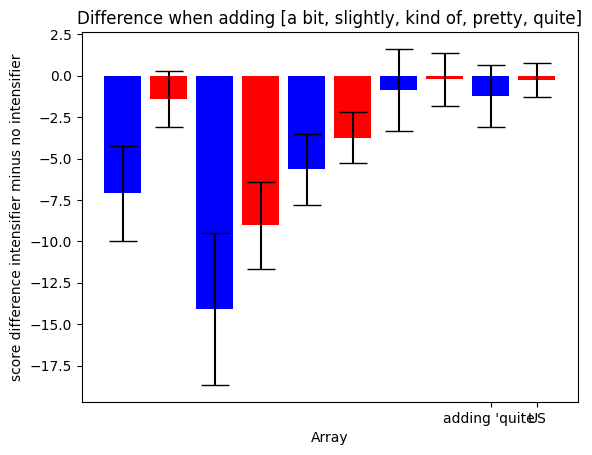

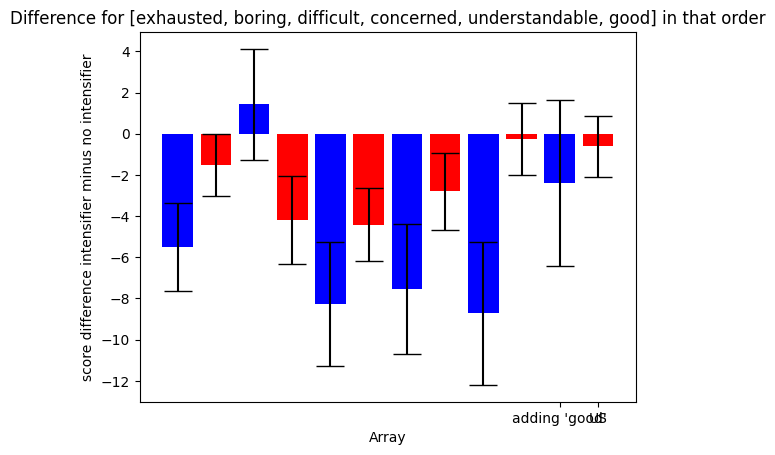

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
for i in range(len(UK_difference_with_intensifier)):
    # Example data
    arr1 = np.array(UK_difference_with_intensifier[i][1:])
    arr2 = np.array(US_difference_with_intensifier[i][1:])

    # Calculate averages
    avg1 = np.mean(arr1)
    avg2 = np.mean(arr2)

    # Calculate standard deviations
    std1 = stats.sem(arr1)
    # standard error mean
    std2 = stats.sem(arr2)

    # Data for the bar plot
    averages = [avg1, avg2]
    deviations = [std1, std2]

    # Bar positions
    positions = [2*i, 2*i+1]

    # Plotting the bars with error bars
    plt.bar(positions, averages, yerr=deviations, capsize=10, color=['blue', 'red'], tick_label=[f'adding \'{UK_difference_with_intensifier[i][0]}\'', 'US'])

    # Adding labels and title
    plt.xlabel('Array')
    plt.ylabel('score difference intensifier minus no intensifier')
    plt.title('Difference when adding [a bit, slightly, kind of, pretty, quite]')

    # Show the plot
plt.show()


# do the same for predicates
for i in range(len(UK_difference_with_predicate)):
    # Example data
    arr1 = np.array(UK_difference_with_predicate[i][1:])
    arr2 = np.array(US_difference_with_predicate[i][1:])

    # Calculate averages
    avg1 = np.mean(arr1)
    avg2 = np.mean(arr2)

    # Calculate standard deviations
    std1 = stats.sem(arr1)
    # standard error mean
    std2 = stats.sem(arr2)

    # Data for the bar plot
    averages = [avg1, avg2]
    deviations = [std1, std2]

    # Bar positions
    positions = [2*i, 2*i+1]

    # Plotting the bars with error bars
    plt.bar(positions, averages, yerr=deviations, capsize=10, color=['blue', 'red'], tick_label=[f'adding \'{UK_difference_with_predicate[i][0]}\'', 'US'])

    # Adding labels and title
    plt.xlabel('Array')
    plt.ylabel('score difference intensifier minus no intensifier')
    plt.title('Difference for [exhausted, boring, difficult, concerned, understandable, good] in that order')

    # Show the plot

In [13]:
# plot barplot where each row in UK_difference_with_intensifier is a bar
# x axis is the intensifier, y axis is the difference
import matplotlib.pyplot as plt

plt.bar(UK_difference_with_intensifier[0][1:])


TypeError: bar() missing 1 required positional argument: 'height'

In [19]:
# plot graphs for each pair of columns where the x axis is the odd columns and the y axis is the even columns
import matplotlib.pyplot as plt
import numpy as np
data_array = np.array(data_array)
for i in range(1, len(data_array[0])-1, 2):
    plt.scatter(data_array[1:,i], data_array[1:,i+1])
    index = int(i/2)
    string_index = data_array[0][i].rfind('<br>')
    plt.xlabel(f"ratings with \"{scenario_data[index]['intensifier']}\"")
    plt.ylabel(f"ratings without \"{scenario_data[index]['intensifier']}\"")
    # draw x=y line
    plt.title(scenario_data[index]['intensifier'] + " " +scenario_data[index]['predicate'])
    plt.plot([0, 100], [0, 100], color='red', linestyle='dashed', linewidth=2)
plt.show()

NameError: name 'data_array' is not defined

In [11]:
import numpy as np
intensified = [0,1,1,0,0]
def dif_intensifier(a):
    output = []
    for i in range(5):
        output.append(a[2*i+intensified[i]]-a[2*i+1-intensified[i]])
    return np.array(output)

UK dif truth
[[ 2  1  1 -2  1]
 [ 1  1  0  0  3]
 [ 0  2 -1  0 -2]
 [ 2 -1  0  0  0]
 [ 2 -2  6  3 -1]]
[[1 1 1 0 1]
 [2 1 0 1 1]
 [1 0 1 0 1]]
[[ 1  0  0  0  0]
 [ 4  0  1  0 -4]
 [ 1  0  0  1  1]
 [ 1  0  1  0  1]
 [ 4 -4  3  2  3]]


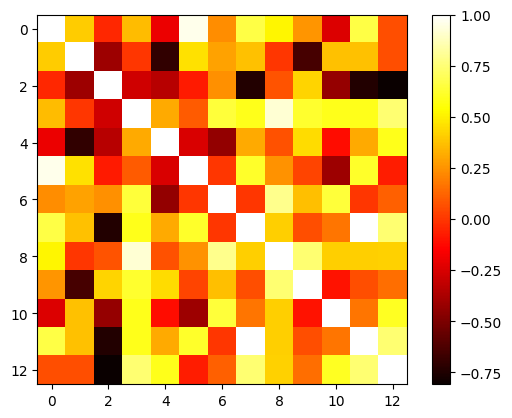

In [ ]:
# Faith, Victoria, Daniel
US_truth_array = np.array([[4,3,3,3,4,5,5,4,3,3],[5,5,2,2,4,5,5,5,3,3],[4,5,3,4,3,4,5,3,3,2]])
US_dif_truth = np.array([dif_intensifier(arr) for arr in US_truth_array])
US_polite_array = np.array([[3,2,2,3,2,3,4,4,2,1],[4,2,5,6,5,5,4,3,3,2],[4,3,4,4,4,5,3,3,3,2]])
US_dif_polite = np.array([dif_intensifier(arr) for arr in US_polite_array])
# Ben, Sam, Polly, Alice, Freya
UK_truth_array = np.array([[3,4,2,3,5,4,6,4,2,4],[4,6,3,3,5,6,5,5,3,4],[4,5,3,6,5,4,5,5,3,5],[5,4,3,5,6,6,5,5,5,6],[3,6,2,1,7,4,3,5,4,3]])
UK_dif_truth = np.array([dif_intensifier(arr) for arr in UK_truth_array])
UK_polite_array = np.array([[3,1,5,6,5,6,4,6,6,5],[3,2,4,5,4,4,3,3,4,1],[5,5,3,5,5,4,5,5,3,5],[3,1,4,3,2,2,1,1,1,1],[5,3,4,2,1,7,5,2,6,7]])
UK_dif_polite = np.array([dif_intensifier(arr) for arr in UK_polite_array])
# Yi Chen, Vlada, Mohit, Hana, Linh
OTH_truth_array = np.array([[1,3,3,3,5,6,5,5,5,6],[5,5,2,2,4,4,6,6,4,3],[5,6,4,5,4,5,3,5,3,3],[6,7,3,4,4,5,5,4,3,4],[6,6,3,6,5,4,5,6,4,6]])
OTH_dif_truth = np.array([dif_intensifier(arr) for arr in OTH_truth_array])
OTH_polite_array = np.array([[2,1,3,3,4,4,6,6,1,1],[5,1,6,6,5,6,2,2,1,5],[5,4,4,4,5,5,6,5,4,3],[2,1,6,6,5,6,6,6,6,5],[7,3,6,2,3,6,5,3,6,3]])
OTH_dif_polite = np.array([dif_intensifier(arr) for arr in OTH_polite_array])
# print UK dif truth
print("UK dif truth")
print(UK_dif_polite)
print(US_dif_polite)
print(OTH_dif_polite)
arr = np.concatenate((UK_dif_polite, US_dif_polite, OTH_dif_polite), axis=0)
import matplotlib.pyplot as plt
plt.imshow(np.corrcoef(arr), cmap='hot', interpolation='nearest')
# show color scheme
plt.colorbar()


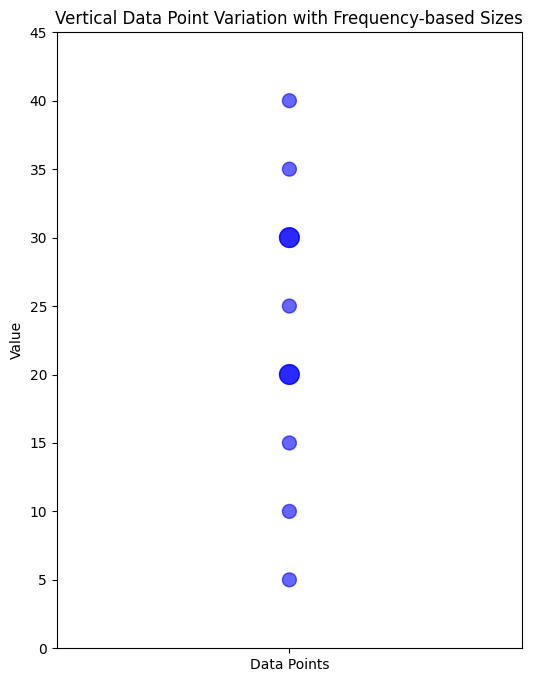

In [48]:
import matplotlib.pyplot as plt
from collections import Counter

# Example data
data = [10, 20, 15, 30, 25, 5, 40, 35, 20, 30]

# Count the frequency of each value
frequency = Counter(data)

# Prepare sizes for each point based on the frequency
sizes = [frequency[value] * 100 for value in data]  # Scale size for visibility

# Create a vertical scatter plot
plt.figure(figsize=(6, 8))
plt.scatter([1]*len(data), data, s=sizes, color='blue', alpha=0.6)

# Customizing the plot
plt.title('Vertical Data Point Variation with Frequency-based Sizes')
plt.ylabel('Value')
plt.xticks([1], ['Data Points'])  # Label for x-axis
plt.ylim(0, max(data) + 5)        # Adjust y-axis limits

# Show the plot
plt.show()


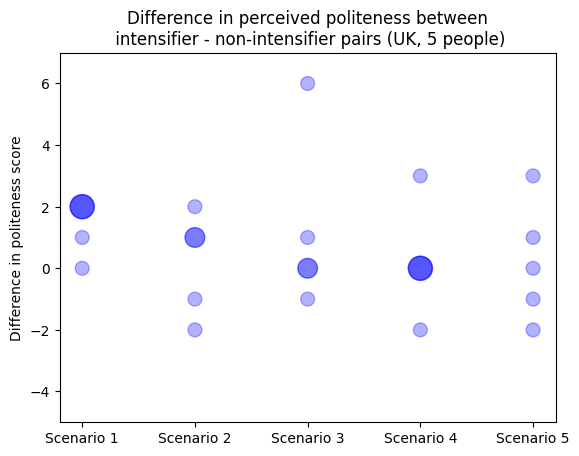

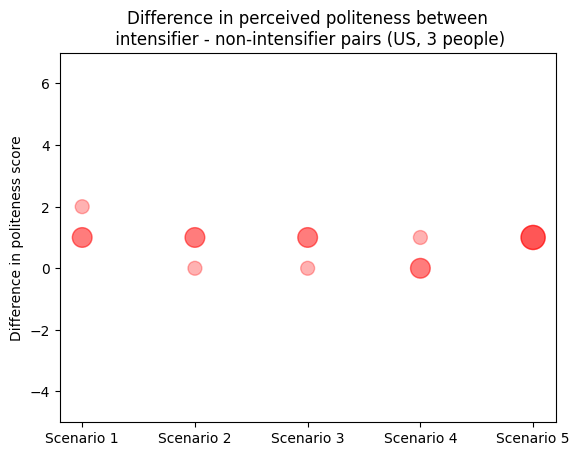

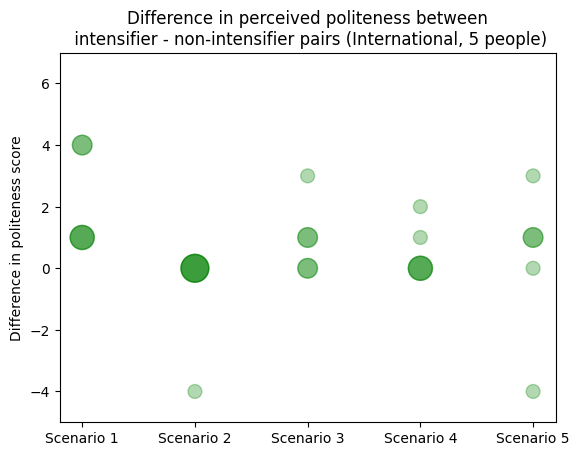

In [78]:
import matplotlib.pyplot as plt

# Example data
data = UK_dif_polite[:,1]

# Create a vertical scatter plot
from collections import Counter


for i in range(5):
    frequency = Counter(UK_dif_polite[:,i])
    sizes = [frequency[value] * 100 for value in UK_dif_polite[:,i]]  # Scale size for visibility
    plt.scatter([i+1]*len(UK_dif_polite), UK_dif_polite[:,i],s=sizes,alpha=0.3, color='blue')
plt.title('Difference in perceived politeness between\n intensifier - non-intensifier pairs (UK, 5 people)')
plt.ylabel('Difference in politeness score')
plt.xticks([1,2,3,4,5], ['Scenario 1','Scenario 2','Scenario 3','Scenario 4','Scenario 5'])  # Label for x-axis
plt.ylim(-5, 7)        # Adjust y-axis limits
# show red is US, blue is UK, green is OTH

# Show the plot
plt.show()
for i in range(5):
    frequency = Counter(US_dif_polite[:,i])
    sizes = [frequency[value] * 100 for value in US_dif_polite[:,i]]  # Scale size for visibility
    plt.scatter([i+1]*len(US_dif_polite), US_dif_polite[:,i],s=sizes,alpha=0.3, color='red')
plt.title('Difference in perceived politeness between\n intensifier - non-intensifier pairs (US, 3 people)')
plt.ylabel('Difference in politeness score')
plt.xticks([1,2,3,4,5], ['Scenario 1','Scenario 2','Scenario 3','Scenario 4','Scenario 5'])  # Label for x-axis
plt.ylim(-5, 7)        # Adjust y-axis limits
# show red is US, blue is UK, green is OTH

# Show the plot
plt.show()
for i in range(5):
    frequency = Counter(OTH_dif_polite[:,i])
    sizes = [frequency[value] * 100 for value in OTH_dif_polite[:,i]]  # Scale size for visibility
    plt.scatter([i+1]*len(OTH_dif_polite), OTH_dif_polite[:,i],s=sizes,alpha=0.3, color='green')
plt.title('Difference in perceived politeness between\n intensifier - non-intensifier pairs (International, 5 people)')
plt.ylabel('Difference in politeness score')
plt.xticks([1,2,3,4,5], ['Scenario 1','Scenario 2','Scenario 3','Scenario 4','Scenario 5'])  # Label for x-axis
plt.ylim(-5, 7)        # Adjust y-axis limits
# show red is US, blue is UK, green is OTH

# Show the plot
plt.show()



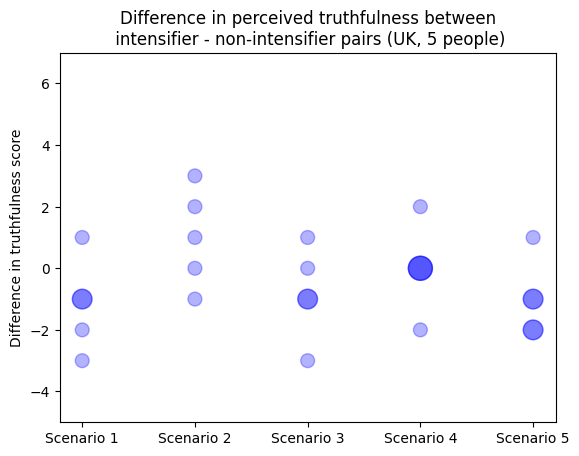

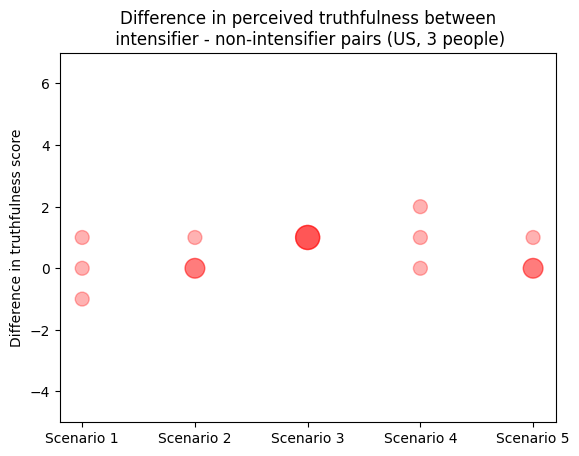

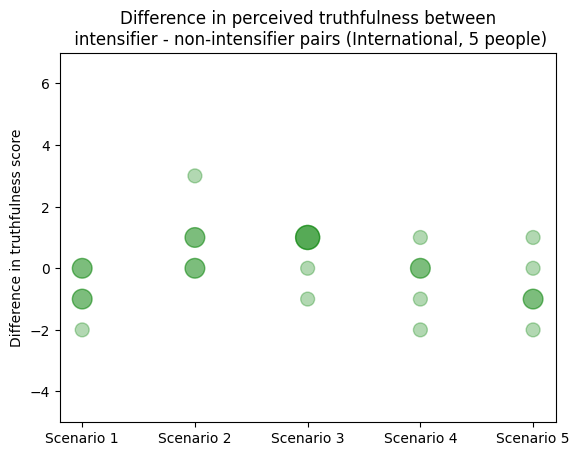

In [77]:
# plot same graph for truth
for i in range(5):
    frequency = Counter(UK_dif_truth[:,i])
    sizes = [frequency[value] * 100 for value in UK_dif_truth[:,i]]  # Scale size for visibility
    plt.scatter([i+1]*len(UK_dif_truth), UK_dif_truth[:,i],s=sizes,alpha=0.3, color='blue')
plt.title('Difference in perceived truthfulness between\n intensifier - non-intensifier pairs (UK, 5 people)')
plt.ylabel('Difference in truthfulness score')
plt.xticks([1,2,3,4,5], ['Scenario 1','Scenario 2','Scenario 3','Scenario 4','Scenario 5'])  # Label for x-axis
plt.ylim(-5, 7)        # Adjust y-axis limits
plt.show()     # Adjust y-axis limits
# plot same fraph for US
for i in range(5):
    frequency = Counter(US_dif_truth[:,i])
    sizes = [frequency[value] * 100 for value in US_dif_truth[:,i]]  # Scale size for visibility
    plt.scatter([i+1]*len(US_dif_truth), US_dif_truth[:,i],s=sizes,alpha=0.3, color='red')
plt.title('Difference in perceived truthfulness between\n intensifier - non-intensifier pairs (US, 3 people)')
plt.ylabel('Difference in truthfulness score')
plt.xticks([1,2,3,4,5], ['Scenario 1','Scenario 2','Scenario 3','Scenario 4','Scenario 5'])  # Label for x-axis
plt.ylim(-5, 7)   
plt.show()     # Adjust y-axis limits
# plot same fraph for OTH
for i in range(5):
    frequency = Counter(OTH_dif_truth[:,i])
    sizes = [frequency[value] * 100 for value in OTH_dif_truth[:,i]]  # Scale size for visibility
    plt.scatter([i+1]*len(OTH_dif_truth), OTH_dif_truth[:,i],s=sizes,alpha=0.3, color='green')
plt.title('Difference in perceived truthfulness between\n intensifier - non-intensifier pairs (International, 5 people)')
plt.ylabel('Difference in truthfulness score')
plt.xticks([1,2,3,4,5], ['Scenario 1','Scenario 2','Scenario 3','Scenario 4','Scenario 5'])  # Label for x-axis
plt.ylim(-5, 7)        # Adjust y-axis limits
# Show the plot
plt.show()

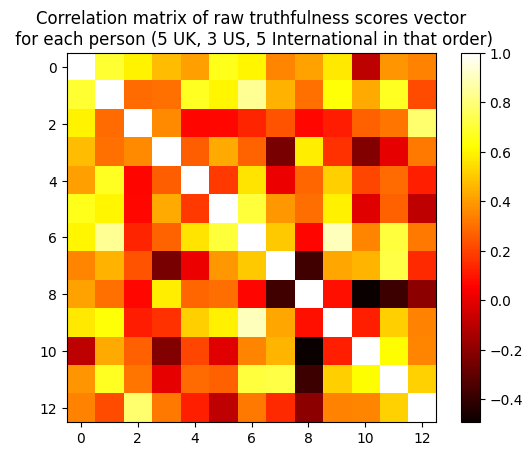

In [85]:
# make correlation matrix of rows in US_truth_array
# concat US_truth_array and UK_polite_arra
arr = np.concatenate((UK_truth_array, US_truth_array,OTH_truth_array), axis=0)
arr = np.corrcoef(arr)
# visualize the correlation matrix by color gradient and show color scheme
import matplotlib.pyplot as plt
plt.imshow(arr, cmap='hot', interpolation='nearest')
#title is correlation matrix of raw politeness scores vector for each person
plt.title('Correlation matrix of raw truthfulness scores vector\n for each person (5 UK, 3 US, 5 International in that order)')
# show color scheme
plt.colorbar()

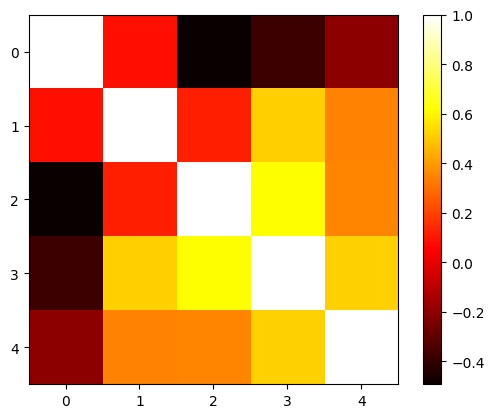

In [37]:
# make correlation matrix of rows in US_truth_array
arr = np.corrcoef(OTH_truth_array)
# visualize the correlation matrix by color gradient and show color scheme
import matplotlib.pyplot as plt
plt.imshow(arr, cmap='hot', interpolation='nearest')
# show color scheme
plt.colorbar()

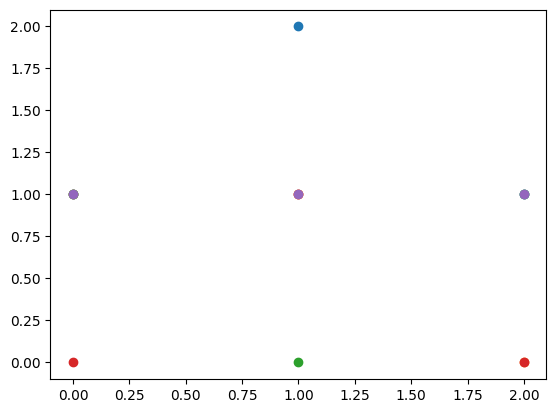

In [36]:
# plot each column of US_dif_polite as distribution of dots
# each column is a different question
# each row is a different person
for i in range(5):
    plt.scatter()